<center><br> <img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 300px;"></center><br><br>

<img src="https://upload.wikimedia.org/wikipedia/en/archive/c/cc/20180621135549%21Vodafone_2017_logo.svg" style="width: 200px;margin-top:90px;margin-bottom:100px;" align="left">
   <div style= "font-size: 28px;font-weight:bold;margin-top:20px;margin-bottom:20px;margin-left:360px;margin-right:150px; line-height: 1.1;color:#F91701;"><center>Análise de Sentimentos & Tópicos nas Redes Sociais | Vodafone</center></div>
   <div style= "font-size: 17px;font-weight:bold;"><center>Projeto Final Aplicado em Ciência de Dados</center></div>
   <div><center><b>Orientador:</b> Nuno Santos (ISCTE-IUL) </center></div>
   <div><center><b>Cliente:</b> Carlos Santos (Vodafone) </center></div>
 <br>
    <div><center>André Silvestre Nº104532 </center></div>
    <div><center>Eliane Gabriel Nº103303 <b>|</b> Maria João Lourenço Nº104716 </center></div>
    <div><center>Margarida Pereira Nº105877 <b>|</b> Umeima Mahomed Nº99239</center></div>
    <br>
    <div><center><b>CDC1</b> & <b>CDC2</b></center></div>
 <br>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

# Índice


<ol style="list-style-type: upper-roman;font-weight: bold;">
  <li><span style = "font-weight: normal;"><a href="#1">Business Understanding</a></span></li>
  <li>
      <span style = "font-weight: normal;">
          <a href="#1">Data Understanding</a>
      </span>
      <ol style="list-style-type:decimal;">
          <li><span style="font-weight: normal;"><a href="#1.2">Pré-Processamento dos Dados</a></span></li>
          <li><span style="font-weight: normal;"><a href="#1.3">AED | Análise Exploratória de Dados</a></span></li>
    </ol>
  </li>
  <li>
    <span style="font-weight: normal;">
      <a href="#2">Data Preparation</a>
    </span> 
    <ol style="list-style-type:decimal;">
      <li><span style="font-weight: normal;"><a href="#4.2">Users | Local de Residência + Género</a></span></li>
    </ol>
  </li>
  <!--
  <li>
    <span style = "font-weight: normal;">
        <a href="#3">Modeling</a>
    </span>
    
    <ol style="list-style-type:decimal;">
      <li><span style="font-weight: normal;"><a href="#M_1Obje">AAAAA</a></span></li>
      <li><span style="font-weight: normal;"><a href="#M_2Obje">AAAAA</a></span></li>
    </ol>
  </li>-->
    
  <!--<li><span style = "font-weight: normal;"><a href="#4">Evaluation</a></span></li>
  <li><span style = "font-weight: normal;"><a href="#4">Deployment</a></span></li>
    -->
</ol>

<br>
<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>
<br>

In [2]:
from IPython.core.display import HTML
HTML("""<style>ol > li::marker {font-weight: bold;font-size: 15px;}
    .output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

In [3]:
# Fonte: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

## 📚 Import das Bibliotecas

In [5]:
# Bibliotecas que vamos usar no Projeto
import os                    # Operating System
from tqdm import tqdm        # Barra de Progresso

# Para dados
import pandas as pd
import numpy as np
from unidecode import unidecode
pd.set_option('display.max_colwidth', None)  # Visualizar a informação toda
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_colwidth') 

# Para gráficos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
# import folium

# --------------------- Scraping ---------------------
import json
import re
import time
import datetime
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from tqdm import tqdm            # Barra de Progresso

# Estilo dos Gráficos    
plt.style.use('ggplot')
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")

# Semente para reprodutibilidade
import random
random.seed(123)

# <a class='anchor' id='1'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>1 & 2 | Business & Data Understanding</b></h1></center>
</div>

## ⛓️ Webscrape dos Dados relativos aos Comentários e Avaliações

### Facebook 🔵

In [ ]:
# Fonte: https://github.com/harmindersinghnijjar/facebook-post-and-comments-scraper/blob/main/data_directory_facebook.py
# Define Chrome options
options = webdriver.ChromeOptions()
# options.add_argument('--headless')            # Sem interface gráfica visível
options.add_argument('--incognito')
options.add_argument('--no-sandbox')            # Permitir a execução em ambientes controlados 
options.add_argument('--disable-dev-shm-usage') # Desativando o uso do /dev/shm no navegador para evitar problemas relacionados à alocação de memória compartilhada
options.add_argument("--disable-notifications")
options.add_argument("--disable-extensions")
options.add_argument('--disable-application-cache')
driver = webdriver.Chrome('./chromedriver',options=options)

# ======= OU - Para as versões mais recentes do Selenium
# service = Service(executable_path='./chromedriver.exe')
# driver = webdriver.Chrome(service=service, options=options)

# Method to open Facebook in Chrome.
driver.get("https://www.facebook.com")
time.sleep(5)

# Login Facebook
email_elem = driver.find_element(By.ID, "email")    # Locate by ID
password_elem = driver.find_element(By.ID, "pass")  # Locate by ID

email_elem.send_keys('<email>')
password_elem.send_keys('<password>') 

# Submit the login form just sending the Enter/Return Key
password_elem.send_keys(Keys.RETURN)
time.sleep(5)

---

## 📌 Posts

### 📌 Posts 🟥🟦⬛

```Python
%%time
# Open Vodafone/MEO/NOS Page. ----------------------- Descomentar o link atribuido

# driver.get("https://www.facebook.com/vodafonePT?locale=pt_PT")   # Facebook da Vodafone - Margarida
# driver.get("https://www.facebook.com/meo?locale=pt_PT")          # Facebook da MEO      - Maria João
# driver.get("https://www.facebook.com/nosportugal?locale=pt_PT")  # Facebook da NOS      - Umeima

# =============================== Scraper dos Posts dos Operadores [Vodafone|MEO|NOS] ========================================
try:
    # Lista para armazenar os dicionários de posts e um conjunto para adicionar os IDs dos posts
    posts_data = []
    existing_post_ids = set()

    last_height = driver.execute_script("return document.body.scrollHeight")

    # Scroll for 10 seconds
    start_time = time.time()
    end_time = start_time + 100 # 00
    
    while time.time() < end_time:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(3)

        # Extract posts and comments after the page has loaded
        soup = BeautifulSoup(driver.page_source, "html.parser")
        posts = soup.find_all("div", class_="x78zum5 x1n2onr6 xh8yej3")

        for post in posts:

            # Link do Post
            href_link = post.find("a", {"class": "x1i10hfl x1qjc9v5 xjbqb8w xjqpnuy xa49m3k xqeqjp1 x2hbi6w x13fuv20 xu3j5b3 x1q0q8m5 x26u7qi x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 x16tdsg8 x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1o1ewxj x3x9cwd x1e5q0jg x13rtm0m x1q0g3np x87ps6o x1lku1pv x1a2a7pz x1lliihq x1pdlv7q"}, href=True)
            if href_link:
                href_tags = href_link["href"]
                link_post= re.findall(r'(https://www\.facebook\.com/photo/\?fbid=\d+&set=[^\s&]+)', href_tags)        
                id_post = re.findall(r'https://www\.facebook\.com/photo/\?fbid=(\d+)&set=[^\s&]+', href_tags)
                
                if id_post:
                    # Texto do Post
                    post_text = post.find("div", class_="x1iorvi4 x1pi30zi x1l90r2v x1swvt13")

                    # Data do Post
                    post_date = post.find("span", class_="x4k7w5x x1h91t0o x1h9r5lt x1jfb8zj xv2umb2 x1beo9mf xaigb6o x12ejxvf x3igimt xarpa2k xedcshv x1lytzrv x1t2pt76 x7ja8zs x1qrby5j")

                    # Estatísicas do Post
                    n_estatisticas = post.find("div", class_="x6s0dn4 xi81zsa x78zum5 x6prxxf x13a6bvl xvq8zen xdj266r xktsk01 xat24cr x1d52u69 x889kno x4uap5 x1a8lsjc xkhd6sd xdppsyt")    

                    n_reacts = post.find("span", class_="xt0b8zv x1e558r4")
                    n_comments = post.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xi81zsa")
                    n_shares = post.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xi81zsa")
                    if n_shares:
                        n_shares = n_shares.find_next("span")

                    # Lista de Comments - Não faz sentido para nós pq só retira alguns
                    # comments = post.find_all("div", class_="x1y1aw1k xn6708d xwib8y2 x1ye3gou")

                    # Verificar se o post já existe na lista de IDs de postagens existentes
                    if id_post[0] not in existing_post_ids:    
                        # Criar dicionário para o post
                        post_dict = {
                            "id": id_post[0],
                            "text": post_text.text.strip() if post_text else "",
                            "date": post_date.text.strip() if post_date else "",
                            "statistic": n_estatisticas.text.strip() if n_estatisticas else "",
                            "reactions": n_reacts.text.strip() if n_reacts else "",
                            "comments": n_comments.text.strip() if n_comments else "",
                            "shares": n_shares.text.strip() if n_shares else "",
                            "link": link_post[0] if link_post else ""
                        }

                        # Adicionar o ID do post à lista de IDs de postagens existentes
                        existing_post_ids.add(id_post[0])

                        # Adicionar o dicionário à lista de posts
                        posts_data.append(post_dict)    
                
except Exception as e:
    print(f"Error scraping posts: {e}")
    
    
# Escrever a lista de dicionários em um arquivo JSON 
# ----------------------- ALTERAR NOME PARA A OPERADORA QUE TIVER A SER OBTIDA
with open(f'Facebook_Vodafone_posts_{datetime.date.today()}.json', 'w', encoding='utf-8') as json_file:
    json.dump(posts_data, json_file, ensure_ascii=False, indent=4)
    
    # Close the browser
    driver.quit()
```

In [ ]:
# Tempo a por no 'while' 
print("8 horas em '':", 60*60*8)
print("25 000'' em Horas:", round(25000/60/60,4))

----

### 📌 Posts de Notícias 🟨

```Python
%%time

links_noticias = [
    "https://www.facebook.com/profile/100064861681188/search/?q=DIGI%20operador&locale=pt_PT",    # Pplware
    "https://www.facebook.com/profile/100055885456176/search/?q=DIGI%20operador&locale=pt_PT",    # 4gnews
    "https://www.facebook.com/profile/100064388515461/search/?q=DIGI%20operador&locale=pt_PT",    # Público
    "https://www.facebook.com/profile/100066638765808/search/?q=DIGI%20operador&locale=pt_PT",    # Observador
    "https://www.facebook.com/profile/100064621156693/search/?q=DIGI%20operador&locale=pt_PT",    # Jornal de Notícias
    "https://www.facebook.com/profile/100066432781929/search/?q=DIGI%20operador&locale=pt_PT",    # CNN
    # De fora ficaram o SIC Noticias, TVI, RTP Notícias, CMTV, SAPO, Expresso, 
    #                   Visão, Exame, Exame Informática e Jornal de Negócios por não conterem posts e comentários relevantes     
]

# =============================== Scraper dos Posts da [DIGI] ========================================

# Lista para armazenar os dicionários de posts e um conjunto para adicionar os IDs dos posts
posts_data = []
existing_post_ids = set()

for url in links_noticias:
    driver.get(url)
    try:
        last_height = driver.execute_script("return document.body.scrollHeight")
        last_result = None       
        while last_result is None:
            
            # Scroll down to bottom
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # Wait to load page
            time.sleep(3)

            # Extract posts and comments after the page has loaded
            soup = BeautifulSoup(driver.page_source, "html.parser")
            posts = soup.find_all("div", class_="x78zum5 x1n2onr6 xh8yej3")

            for post in posts:

                # Link do Post
                href_link = post.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv xo1l8bm", href=True)
                if href_link:
                    href_tags = href_link["href"]
                    id_post= re.findall(r'/posts/([^/?]+)', href_tags)    
                    link_post = re.findall(r'https://www\.facebook\.com[^?]+', href_tags)
                    
                    if id_post:
                        # Page
                        page = post.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz xt0b8zv xzsf02u x1s688f")
                        
                        # Texto do Post
                        post_text = post.find("div", class_="x1iorvi4 x1pi30zi x1l90r2v x1swvt13")
                        news_text = post.find("span", class_="x1lliihq x6ikm8r x10wlt62 x1n2onr6 x1j85h84")
                        
                        # Data do Post
                        post_date = post.find("span", class_="x4k7w5x x1h91t0o x1h9r5lt x1jfb8zj xv2umb2 x1beo9mf xaigb6o x12ejxvf x3igimt xarpa2k xedcshv x1lytzrv x1t2pt76 x7ja8zs x1qrby5j")

                        # Estatísicas do Post
                        n_estatisticas = post.find("div", class_="x6s0dn4 xi81zsa x78zum5 x6prxxf x13a6bvl xvq8zen xdj266r xktsk01 xat24cr x1d52u69 x889kno x4uap5 x1a8lsjc xkhd6sd xdppsyt")    

                        n_reacts = post.find("span", class_="xt0b8zv x1e558r4")
                        n_comments = post.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xi81zsa")
                        n_shares = post.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xi81zsa")
                        if n_shares:
                            n_shares = n_shares.find_next("span")

                        # Lista de Comments - Não faz sentido para nós pq só retira alguns
                        # comments = post.find_all("div", class_="x1y1aw1k xn6708d xwib8y2 x1ye3gou")

                        # Verificar se o post já existe na lista de IDs de postagens existentes
                        if id_post[0] not in existing_post_ids:    
                            # Criar dicionário para o post
                            post_dict = {
                                "page": page.text.strip(),
                                "id": id_post[0],
                                "post_text": post_text.text.strip() if post_text else "",
                                "news_text": news_text.text.strip() if post_text else "",
                                "date": post_date.text.strip() if post_date else "",
                                "statistic": n_estatisticas.text.strip() if n_estatisticas else "",
                                "reactions": n_reacts.text.strip() if n_reacts else "",
                                "comments": n_comments.text.strip() if n_comments else "",
                                "shares": n_shares.text.strip() if n_shares else "",
                                "link": link_post[0] if link_post else ""
                            }

                            # Adicionar o ID do post à lista de IDs de postagens existentes
                            existing_post_ids.add(id_post[0])

                            # Adicionar o dicionário à lista de posts
                            posts_data.append(post_dict)  
                
                last_result = soup.find("div", class_= "x9f619 x1n2onr6 x1ja2u2z x78zum5 xdt5ytf x2lah0s x193iq5w x1gslohp x12nagc xzboxd6 x14l7nz5")
    
    except Exception as e:
        print(f"Error scraping posts: {e}")  
        
# Escrever a lista de dicionários em um arquivo JSON
with open(f'Facebook_DIGI_news_posts_{datetime.date.today()}.json', 'w', encoding='utf-8') as json_file:
    json.dump(posts_data, json_file, ensure_ascii=False, indent=4)
    
    # Close the browser
    driver.quit()
    
```

---

## 💭 Comentários

### 🧮 Importar as Bases de Dados dos Posts

In [3]:
# Importar os post.json
Vodafone_Posts = pd.read_json('Datasets/Facebook_Vodafone_posts_2024-03-17.json')
MEO_Posts = pd.read_json('Datasets/Facebook_MEO_posts_2024-03-16.json')
NOS_Posts = pd.read_json('Datasets/Facebook_NOS_posts_2024-03-16.json')
DIGI_News_Posts = pd.read_json('Datasets/Facebook_DIGI_news_posts_2024-03-15.json')

#### Infos das Bases de Dados

In [4]:
# Observações Aleatórias da base de dados de modo a ver a sua estrutura
print("\033[1mMEO\033[0m\nNúmero de colunas:", len(MEO_Posts.columns), "\nNúmero de linhas:", len(MEO_Posts), "\n\nObservações Aleatórias:\n")
# MEO_Posts.sample(2)

MEO
Número de colunas: 8 
Número de linhas: 2280 

Observações Aleatórias:



In [5]:
print("\033[1mVodafone\033[0m\nNúmero de colunas:", len(Vodafone_Posts.columns), "\nNúmero de linhas:", len(Vodafone_Posts), "\n\nObservações Aleatórias:\n")
# Vodafone_Posts.sample(1)

Vodafone
Número de colunas: 8 
Número de linhas: 2420 

Observações Aleatórias:



In [6]:
print("\033[1mNOS\033[0m\nNúmero de colunas:", len(NOS_Posts.columns), "\nNúmero de linhas:", len(NOS_Posts), "\n\nObservações Aleatórias:\n")
# NOS_Posts.sample(1)

NOS
Número de colunas: 8 
Número de linhas: 1900 

Observações Aleatórias:



In [7]:
print("\033[1mDIGI [News]\033[0m\nNúmero de colunas:", len(DIGI_News_Posts.columns), "\nNúmero de linhas:", len(DIGI_News_Posts), "\n\nObservações Aleatórias:\n")
# DIGI_News_Posts.sample(1)

DIGI [News]
Número de colunas: 10 
Número de linhas: 30 

Observações Aleatórias:



In [9]:
# Verificar Posts duplicados
print("\033[1mPosts Duplicados da Vodafone:\033[0m", Vodafone_Posts.duplicated(subset='id').sum())
print("\033[1mPosts Duplicados da MEO:\033[0m", MEO_Posts.duplicated(subset='id').sum())
print("\033[1mPosts Duplicados da NOS:\033[0m", NOS_Posts.duplicated(subset='id').sum())
print("\033[1mPosts Duplicados da DIGI_News_Posts:\033[0m", DIGI_News_Posts.duplicated(subset='id').sum())

Posts Duplicados da Vodafone: 0
Posts Duplicados da MEO: 0
Posts Duplicados da NOS: 0
Posts Duplicados da DIGI_News_Posts: 0


---

###  💭 Comentários  🟥🟦⬛

```Python
%%time
# ========================================= Scraper dos Comments ==========================================================
# Fonte: https://github.com/sesamechee/python-facebook-scraper/blob/master/scraper.py [Adaptado]

# Lista para armazenar os dicionários de comentários e um conjunto para adicionar os IDs dos comentários
comments_data = []
existing_comments_ids = set()

# for post_link in tqdm(Vodafone_Posts['link']):
# for post_link in tqdm(MEO_Posts['link'].iloc[X:]):
# for post_link in tqdm(NOS_Posts['link'].iloc[(721 + 203 + 1):1000]):
# for post_link in tqdm(NOS_Posts['link'].iloc[1254:]):
for post_link in tqdm(Operadora_Posts['link']):

    # Open post link
    driver.get(post_link)
    time.sleep(2)

    # ID do Post
    post_id = Operadora_Posts[Operadora_Posts['link'] == post_link]['id'].values[0]           ########################## ------- MUDAR DF
    
    last_height = driver.execute_script("return document.body.scrollHeight")
    next_page_comments = not None
    comment_set_number = 0

    while next_page_comments is not None:
        
        time.sleep(2)
        try:
            # Scroll down to bottom 
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

            # Extract comments
            soup = BeautifulSoup(driver.page_source, "html.parser")
            comments = soup.find_all("div", class_="x78zum5 xdt5ytf")

            for comment in comments:
                try:
                    # Link e Nome do User
                    user = comment.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv")
                    if user:
                        user_name = user.text.strip()
                        user_link = user["href"]

                        # Texto do comentário
                        comment_text = comment.find("div", class_="xdj266r x11i5rnm xat24cr x1mh8g0r x1vvkbs")

                        # Data do comentário
                        comment_date = comment.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz xt0b8zv xi81zsa xo1l8bm")

                        # ID do comentário
                        comment_link = comment_date["href"]
                        comment_id = re.findall(r'comment_id=(\d+)', comment_link)

                        # Número de reações
                        comment_reactions = comment.find("div", class_="x6s0dn4 x1a2cdl4 xnhgr82 x1qt0ttw xgk8upj x78zum5 x1ncwhqj xlup9mm x1nn3v0j xg83lxy x1120s5i x1h0ha7o x9bbmet xqnafso")

                        # Número de respostas
                        comment_responses = comment.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen x1s688f xi81zsa")

                        if comment_text:
                            # Verificar se o post já existe na lista de IDs de postagens existentes
                            if comment_id[0] not in existing_comments_ids: 
                                # Criar dicionário para o comentário
                                comment_dict = {
                                    "post_id": str(post_id),
                                    "comment_id": comment_id[0],
                                    "user_name": user_name if user_name else "",
                                    "user_link": user_link if user_link else "",
                                    "comment_text": comment_text.text.strip() if comment_text else "",
                                    "comment_date": comment_date.text.strip() if comment_date else "",
                                    "comment_reactions": comment_reactions.text.strip() if comment_reactions else "",
                                    "comment_responses": comment_responses.text.strip() if comment_responses else "",
                                    "comment_link": comment_link if comment_link else "",
                                }

                                # Adicionar o dicionário à lista de comentários
                                comments_data.append(comment_dict)

                                # Adicionar o ID do comentário à lista de IDs de comentários existentes
                                existing_comments_ids.add(comment_id[0])

                except Exception as e:
                    print(f"Erro ao processar comentário: {e}")    

            # Próxima página de comentários
            next_page_comments = soup.find_all("span", class_= "x78zum5 x1w0mnb xeuugli")

            if next_page_comments:
                if next_page_comments[-1].text == "Ver mais comentários" and comment_set_number <= 50:
                    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                    element = driver.find_element(By.XPATH, f'/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div[2]/div/div/div/div[1]/div[4]/div[{comment_set_number * 50+8}]/div[1]/div/div[2]')
                    driver.execute_script("arguments[0].scrollIntoView();", element)
                    element.click()

                    time.sleep(1)
                    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                    comment_set_number += 1

                # MÁX = 2500 [comment_set_number <= 50] comentários renderizados numa página porque apenas 
                # 5 dos posts têm mais de 2000 cometários e a temática nada tem a ver com as operadoras
                else:
                    next_page_comments = None
            else:
                next_page_comments = None
        
        except Exception as e:
            print(f"Erro: {e}")
            # Continua para a próxima iteração se não conseguir algum link
            continue
            
            
# Escrever os dados dos comentários em um arquivo JSON                          ########################## ------- MUDAR NOME
with open(f'Facebook_Operadora_comments_{datetime.date.today()}.json', 'w', encoding='utf-8') as json_file:
    json.dump(comments_data, json_file, ensure_ascii=False, indent=4)
    
    # Fechar o navegador Selenium
    driver.quit()
```

---

In [ ]:
# Encontrar o 'id_post' especifico
# MEO_Posts.index[MEO_Posts['id'] == 10157023959859570][0]
# MEO_Posts[MEO_Posts['id'] == 10157023959859570]

In [ ]:
# Vodafone_Posts.index[Vodafone_Posts['id'] == 5566394966712254][0]

In [ ]:
# Vodafone_Posts.index[Vodafone_Posts['id'] == 1289433231075137][0]

In [ ]:
# NOS_Posts.index[NOS_Posts['id'] == 3586234618056991][0] # - 00
# NOS_Posts.index[NOS_Posts['id'] == 2693202527360209][0] # - 5
# NOS_Posts.index[NOS_Posts['id'] == 1933085940038542][0] # - 9

###  💭 Comentários  🟨

```Python
%%time

# ========================================= Scraper dos Comments ==========================================================
# Fonte: https://github.com/sesamechee/python-facebook-scraper/blob/master/scraper.py [Adaptado]

# link_teste = ["https://www.facebook.com/jornalnoticias/posts/pfbid02WPYdh34GuAHAh3rUzRx7GmLrt8r61u8tMtAb1FhRoPa5SEeNYTTaGZKJyrJBYoBol"]

# Lista para armazenar os dicionários de comentários
comments_data = []

for post_link in tqdm(DIGI_News_Posts['link']):
# for post_link in link_teste:

    # Open post link
    driver.get(post_link)
    time.sleep(3)

    # ID do Post
    # post_id = DIGI_News_Posts[DIGI_News_Posts['link'] == post_link]['id'].values[0]
    post_id = post_link

    last_height = driver.execute_script("return document.body.scrollHeight")
    next_page_comments = not None
    comment_set_number = 1

    while next_page_comments is not None:

        # Scroll down to bottom 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(3)

        # Extract comments
        soup = BeautifulSoup(driver.page_source, "html.parser")
        comments = soup.find_all("div", class_="x1n2onr6 x1swvt13 x1iorvi4 x78zum5 x1q0g3np x1a2a7pz")

        for comment in comments:
            try:
                # Link e Nome do User
                user = comment.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv")
                if user:
                    user_name = user.text.strip()
                    user_link = user["href"]

                    # Texto do comentário
                    comment_text = comment.find("div", class_="xdj266r x11i5rnm xat24cr x1mh8g0r x1vvkbs")

                    # Data do comentário
                    comment_date = comment.find("a", class_="x1i10hfl xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x972fbf xcfux6l x1qhh985 xm0m39n x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz xt0b8zv xi81zsa xo1l8bm")

                    # ID do comentário
                    comment_link = comment_date["href"]
                    comment_id = re.findall(r'comment_id=(\d+)', comment_link)

                    # Número de reações
                    comment_reactions = comment.find("div", class_="x6s0dn4 x1a2cdl4 xnhgr82 x1qt0ttw xgk8upj x78zum5 x1ncwhqj xlup9mm x1nn3v0j xg83lxy x1120s5i x1h0ha7o x9bbmet xqnafso")

                    # Número de respostas
                    comment_responses = comment.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen x1s688f xi81zsa")

                    if comment_text:
                        # Criar dicionário para o comentário
                        comment_dict = {
                            "post_id": post_id,
                            "comment_id":comment_id[0] if comment_id else "",
                            "user_name": user_name if user_name else "",
                            "user_link": user_link if user_link else "",
                            "comment_text": comment_text.text.strip() if comment_text else "",
                            "comment_date": comment_date.text.strip() if comment_date else "",
                            "comment_reactions": comment_reactions.text.strip() if comment_reactions else "",
                            "comment_responses": comment_responses.text.strip() if comment_responses else "",
                            "comment_link": comment_link if comment_link else "",
                        }

                        # Adicionar o dicionário à lista de comentários
                        comments_data.append(comment_dict)

            except Exception as e:
                print(f"Erro ao processar comentário: {e}")    

        # Próxima página de comentários
        next_page_comments = soup.find_all("span", class_= "x78zum5 x1w0mnb xeuugli")
        
        if next_page_comments:
            if next_page_comments[-1].text == "Ver mais comentários":
                driver.find_element(By.XPATH, f'/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div/div/div/div/div/div/div/div/div/div/div/div/div[2]/div/div/div[4]/div/div/div[2]/div[3]/div[{comment_set_number * 50+2}]/div[1]/div/div[2]').click()
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                comment_set_number += 1

            else:
                next_page_comments = None
        else:
            next_page_comments = None

        time.sleep(3)

        
        
# Escrever os dados dos comentários em um arquivo JSON
with open(f'Facebook_DIGI_new_comments_{datetime.date.today()}.json', 'w', encoding='utf-8') as json_file:
    json.dump(comments_data, json_file, ensure_ascii=False, indent=4)
    
    # Fechar o navegador Selenium
    driver.quit()
```

---

## 🙎‍♂️🙎‍♀️ Utilizadores

### 🙎‍♂️🙎‍♀️ Utilizadores 🟥🟦⬛🟨

#### 🧮 Importar as Bases de Dados dos Comentários

In [15]:
# Importar base de dados Facebook_Comments.txt
Facebook_Posts = pd.read_csv('Datasets_Vodafone/Facebook_Posts.txt', sep='\t', encoding='utf-8')
Facebook_Comments = pd.read_csv('Datasets_Vodafone/Facebook_Comments.txt', sep='\t', encoding='utf-8')

# Garantir que as colunas 'post_id' e 'page' são do tipo str
Facebook_Comments['post_id'] = Facebook_Comments['post_id'].astype(str)
Facebook_Comments['page'] = Facebook_Comments['page'].astype(str)

Facebook_Posts['post_id'] = Facebook_Posts['post_id'].astype(str)
Facebook_Posts['page'] = Facebook_Posts['page'].astype(str)

# Juntar as tabelas
Facebook_Posts_Comments = pd.merge(Facebook_Comments, Facebook_Posts, how='outer', on=['post_id', 'page'])
Facebook_Posts_Comments.reset_index(drop=True, inplace=True)
# Facebook_Posts_Comments.info()

In [16]:
# --------------------------------------------------------------------------------------------
# Filtrar os users com 'post_year' maior ou igual a 2019
Users = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]
print(f'\033[1mNº de Users [Com Duplicados] a obter dos comentários entre 2019-2024:\033[0m {len(Users)}')

Nº de Users [Com Duplicados] a obter dos comentários entre 2019-2024: 200448


In [17]:
# Filtrar os users com 'user_link' único
Users = Users[~Users.duplicated(subset=['user_link'])][['user_name','user_link']]
Users.reset_index(drop=True, inplace=True)
print(f'\033[1mNº de Users [Únicos] a obter dos comentários entre 2019-2024:\033[0m {len(Users)}')

Nº de Users [Únicos] a obter dos comentários entre 2019-2024: 114198


In [18]:
# Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019][['user_name','user_link']].drop_duplicates()

In [19]:
# Importar as bases de dados dos Users já obtidos
DIGI_News_Users = pd.read_json('Datasets/Users/Facebook_DIGI_News_users_2024-03-21.json')

# Fazer drop da coluna 'genero'
DIGI_News_Users.drop(columns=['genero'], inplace=True)

# Renomear as colunas 'cidade_atual' e 'naturalidade' para 'user_current_city' e 'user_hometown'
DIGI_News_Users.rename(columns={'cidade_atual': 'user_current_city', 'naturalidade': 'user_hometown'}, inplace=True)

Users_1_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_1.json', encoding='utf-8')
Users_2_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_2.json', encoding='utf-8')
Users_3_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_3.json', encoding='utf-8')
Users_4_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_4.json', encoding='utf-8')
Users_5_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_5.json', encoding='utf-8')
Users_6_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_6.json', encoding='utf-8')
Users_7_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_7.json', encoding='utf-8')

Users_8_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_8.json', encoding='utf-8')
Users_9_AS = pd.read_json('Datasets/Users/Facebook_Users_AS_9.json', encoding='utf-8')

Users_1_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_1.json', encoding='utf-8')
Users_2_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_2.json', encoding='utf-8')
Users_3_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_3.json', encoding='utf-8')
Users_4_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_4.json', encoding='utf-8')

Users_5_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_5.json', encoding='utf-8')
Users_6_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_6.json', encoding='utf-8')
Users_7_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_7.json', encoding='utf-8')
Users_8_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_8.json', encoding='utf-8')
Users_9_MJ = pd.read_json('Datasets/Users/Facebook_Users_MJ_9.json', encoding='utf-8')

Users_1_UM = pd.read_json('Datasets/Users/Facebook_Users_U_1.json', encoding='utf-8')
Users_2_UM = pd.read_json('Datasets/Users/Facebook_Users_U_2.json', encoding='utf-8')
Users_3_UM = pd.read_json('Datasets/Users/Facebook_Users_U_3.json', encoding='utf-8')
Users_4_UM = pd.read_json('Datasets/Users/Facebook_Users_U_4.json', encoding='utf-8')
Users_5_UM = pd.read_json('Datasets/Users/Facebook_Users_U_5.json', encoding='utf-8')

Users_6_UM = pd.read_json('Datasets/Users/Facebook_Users_U_6.json', encoding='utf-8')
Users_7_UM = pd.read_json('Datasets/Users/Facebook_Users_U_7.json', encoding='utf-8')
Users_8_UM = pd.read_json('Datasets/Users/Facebook_Users_U_8.json', encoding='utf-8')
Users_9_UM = pd.read_json('Datasets/Users/Facebook_Users_U_9.json', encoding='utf-8')
Users_10_UM = pd.read_json('Datasets/Users/Facebook_Users_U_10.json', encoding='utf-8')
Users_11_UM = pd.read_json('Datasets/Users/Facebook_Users_U_11.json', encoding='utf-8')

Users_1_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_1.json', encoding='utf-8')
Users_2_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_2.json', encoding='utf-8')

Users_3_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_3.json', encoding='utf-8')
Users_4_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_4.json', encoding='utf-8')
Users_5_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_5.json', encoding='utf-8')
Users_6_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_6.json', encoding='utf-8')
Users_7_MM = pd.read_json('Datasets/Users/Facebook_Users_MM_7.json', encoding='utf-8')

# Concatenar os Users obtidos
Users_Obtidos = pd.concat(
    [DIGI_News_Users,
     Users_1_AS, Users_2_AS, Users_3_AS, Users_4_AS, Users_5_AS, Users_6_AS, Users_7_AS, Users_8_AS, Users_9_AS,
     Users_1_MJ, Users_2_MJ, Users_3_MJ, Users_4_MJ, Users_5_MJ, Users_6_MJ, Users_7_MJ, Users_8_MJ, Users_9_MJ,
     Users_1_UM, Users_2_UM, Users_3_UM, Users_4_UM, Users_5_UM, Users_6_UM, Users_7_UM, Users_8_UM, Users_9_UM, Users_10_UM, Users_11_UM,
     Users_1_MM, Users_2_MM, Users_3_MM, Users_4_MM, Users_5_MM, Users_6_MM, Users_7_MM
    ], ignore_index=True)

# Remover duplicados
Users_Obtidos.drop_duplicates(subset=['user_link'], inplace=True, keep='first')
Users_Obtidos.reset_index(drop=True, inplace=True)
print("\033[1mTotal de Users Não Duplicados Obtidos\033[0m", len(Users_Obtidos))

Total de Users Não Duplicados Obtidos 129096


In [22]:
# Merge dos dataframes Users e Users_Obtidos
Users_Por_Obter = Users.merge(Users_Obtidos[['user_link']], how='left', on='user_link', indicator=True)

# Selecionar apenas as linhas que estão apenas no dataframe Users
Users_Por_Obter = Users_Por_Obter[Users_Por_Obter['_merge'] == 'left_only']

# Remover a coluna de indicação de merge
Users_Por_Obter.drop(columns=['_merge'], inplace=True)
Users_Por_Obter.reset_index(drop=True, inplace=True)
print("\033[1mTotal de Users Por Recolher\033[0m", len(Users_Por_Obter.dropna()), '\n')
Users_Por_Obter.dropna(inplace=True)
Users_Por_Obter

Total de Users Por Recolher 0 



,user_name,user_link


> Concluído o *scraping* dos *users* a **10/04/2024**!

```Python
################## LISTA [4] ##################
# André    - 0      : 10 000  -----------------
# MM       - 10 000 : 24 000  -----------------
# MJ       - 24 000 : 38 000  -----------------
# Umeima   - 38 000 : 51 865  -----------------

%%time
# ========================================= Scraper dos Comments ==========================================================
# Fonte: https://github.com/sesamechee/python-facebook-scraper/blob/master/scraper.py [Adaptado]
# user_link_fb = ['about_places', 'about_contact_and_basic_info'] 

# Lista para armazenar os dicionários de users
users_data = []
links_por_fazer = []

for user_link in tqdm(Users_Por_Obter['user_link']):  ##.iloc[8815:10000]):        ######## MUDAR NÚMERO

    # Link e Nome do User
    user_name = Users[Users['user_link'] == user_link]['user_name'].values[0]
    
    try:
        # for link in user_link_fb: 
        # [Optámos por só obter a informação crucial (Local de Residência do User) devido ao elevado número de utilizadores]
        cidade_atual = ''
        naturalidade = ''
            
        if 'profile.php?' in user_link:
            # Open about-user links
            driver.get(f'{user_link}&sk=about_places') 
            # Para se adaptar aos outros urls para obter mais informação seria
            # driver.get(f'{user_link}&sk={link}') 
        else:
            # Open about-user links
            driver.get(f'{user_link}/about_places')
            # driver.get(f'{user_link}/{link}')

        time.sleep(3)

        # Extract users
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # 'Local de Residência' do User
        # if link == "about_places":
        locais = soup.find_all("div", class_="x9f619 x1n2onr6 x1ja2u2z x78zum5 xdt5ytf x193iq5w xeuugli x1r8uery x1iyjqo2 xs83m0k xamitd3 xsyo7zv x16hj40l x10b6aqq x1yrsyyn")

        # Informações dos 'Locais'
        if locais:
            for local in locais:
                if local:
                    if "Cidade atual" in local.text:
                        cidade_atual = local.text  # re.sub(r'Cidade atual.*', ''," -> Para a Limpeza

                    elif "Naturalidade" in local.text:
                        naturalidade = local.text # re.sub(r'Naturalidade.*', '',
                        
                    else:
                        continue
                        
        else:
            cidade_atual = ''
            naturalidade = ''

        # # 'Género' do User [Caso fizessemos pelo webscraping]
        # if link == "about_contact_and_basic_info":
        #     time.sleep(2)
        #     genero_div = soup.find("span", class_="x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x3x7a5m x6prxxf xvq8zen xo1l8bm xzsf02u x1yc453h")
        #     if genero_div:
        #        genero = genero_div.text
        #    else:
        #        genero = ''
        
        # Caso a conta seja bloqueada
        bloq = soup.find("div", class_="x6s0dn4 x78zum5 xdt5ytf xl56j7k x1p5oq8j xxbr6pl xwxc41k xbbxn1n")
        if bloq:
            if "Estás temporariamente bloquead" in bloq.text:
                # Faz print do 'user_link' e 'index' e guarda numa lista
                print(f"Conta bloqueada temporariamente no: {user_link} | Index: {Users_Por_Obter.index[Users_Por_Obter['user_link'] == user_link].tolist()[0]}")
                links_por_fazer.append(user_link)
                
                tqdm._instances.clear()
                
                # Continua para a próxima iteração sem guardar dados
                continue            

        # Criar dicionário para o utilizador
        user_dict = {
            "user_link": user_link,
            "user_name": user_name,
            "user_current_city": cidade_atual,
            "user_hometown": naturalidade
            # "user_gender": genero.strip()
        }

        # Adicionar o dicionário à lista de utilizadores
        users_data.append(user_dict)
    
    except Exception as e:
        print(f"Erro: {e}")
        # Continua para a próxima iteração se não conseguir algum link
        continue


# df_links_por_fazer = pd.DataFrame(links_por_fazer, columns=["user_link"])
# df_links_por_fazer.to_csv('Links_por_fazer_AS_5.csv', index=False) ## ALTERAR SIGLA DO VOSSO NOME E ALTERAR NUMERO 

# Escrever os dados dos utilizadores num arquivo JSON
with open(f'Facebook_Users_AS_9.json', 'w', encoding='utf-8') as json_file:  
    json.dump(users_data, json_file, ensure_ascii=False, indent=4) ## ALTERAR SIGLA DO VOSSO NOME E ALTERAR NUMERO 
    
    # Fechar o navegador Selenium
    driver.quit()
```

---

In [23]:
# Verificar os duplicados da concatenação
print("\033[1mUsers Duplicados:\033[0m", len(Users_Obtidos) - 
      len(Users_Obtidos.drop_duplicates(subset=['user_link'], keep='first')))

Users Duplicados: 0


In [24]:
# Total de Users Extraidos [Total = 129 096] - 114 198
print('\033[1mTotal\033[0m:', len(Users_Obtidos))

Total: 129096


In [25]:
# Guardar os dados RAW dos Users em .JSON compilado
# with open('Datasets_Vodafone/Facebook_Users.json', 'w', encoding='utf-8') as file:
#     Users_Obtidos.to_json(file, orient='records', force_ascii=False, indent=4)

with open('Datasets/Facebook_Users.json', 'w', encoding='utf-8') as file:
     Users_Obtidos.to_json(file, orient='records', force_ascii=False, indent=4)

---

# <a class='anchor' id='1.2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Pré-Processamento de Dados</b></h2></center>
</div>

## 🧮 Importar as Bases de Dados dos Posts, Comentários e Users

```Python
# Importar os post.json
Vodafone_Posts = pd.read_json('Datasets/Facebook_Vodafone_posts_2024-03-17.json')
MEO_Posts = pd.read_json('Datasets/Facebook_MEO_posts_2024-03-16.json')
NOS_Posts = pd.read_json('Datasets/Facebook_NOS_posts_2024-03-16.json')
DIGI_News_Posts = pd.read_json('Datasets/Facebook_DIGI_news_posts_2024-03-15.json')
```

```Python
# Verificar duplicados
print("\033[1mPosts duplicados\033[0m")
print("Vodafone:", len(Vodafone_Posts) - len(Vodafone_Posts.drop_duplicates(subset=['id'], keep='first')))
print("MEO:", len(MEO_Posts) - len(MEO_Posts.drop_duplicates(subset=['id'], keep='first')))
print("NOS:", len(NOS_Posts) - len(NOS_Posts.drop_duplicates(subset=['id'], keep='first')))
print("DIGI News:", len(DIGI_News_Posts) - len(DIGI_News_Posts.drop_duplicates(subset=['id'], keep='first')))
```

```Python
# Remover duplicados dos posts, se existirem e verificar o Nº Total de Posts por operadora
Vodafone_Posts.drop_duplicates(subset=['id'], inplace=True, keep='first')
MEO_Posts.drop_duplicates(subset=['id'], inplace=True, keep='first')
NOS_Posts.drop_duplicates(subset=['id'], inplace=True, keep='first')
DIGI_News_Posts.drop_duplicates(subset=['id'], inplace=True, keep='first')

print("\033[1mTotal de Posts Não Duplicados\033[0m")
print("Vodafone:", len(Vodafone_Posts))
print("MEO:", len(MEO_Posts))
print("NOS:", len(NOS_Posts))
print("DIGI News:", len(DIGI_News_Posts))
```

---

### 🔗Concatenar as Bases de Dados dos Comentários

```Python
# Importar os comments.json
Vodafone_Comments_000 = pd.read_json('Datasets/Facebook_Vodafone_comments_000_2024-03-23.json')
Vodafone_Comments_00 = pd.read_json('Datasets/Facebook_Vodafone_comments_00_2024-03-23.json')
Vodafone_Comments_0 = pd.read_json('Datasets/Facebook_Vodafone_comments_0_2024-03-20.json')
Vodafone_Comments_1 = pd.read_json('Datasets/Facebook_Vodafone_comments_1_2024-03-21.json')
Vodafone_Comments_2 = pd.read_json('Datasets/Facebook_Vodafone_comments_2_2024-03-22.json')

MEO_Comments_0 = pd.read_json('Datasets/Facebook_MEO_comments_0_2024-03-21.json')
MEO_Comments_1 = pd.read_json('Datasets/Facebook_MEO_comments_1_2024-03-21.json')
MEO_Comments_2 = pd.read_json('Datasets/Facebook_MEO_comments_2_2024-03-22.json')
MEO_Comments_3 = pd.read_json('Datasets/Facebook_MEO_comments_3_2024-03-23.json')

NOS_Comments_00 = pd.read_json('Datasets/Facebook_NOS_comments_00_2024-03-24.json')
NOS_Comments_0 = pd.read_json('Datasets/Facebook_NOS_comments_0_2024-03-20.json')
NOS_Comments_1 = pd.read_json('Datasets/Facebook_NOS_comments_1_2024-03-21.json')
NOS_Comments_2 = pd.read_json('Datasets/Facebook_NOS_comments_2_2024-03-22.json')
NOS_Comments_3 = pd.read_json('Datasets/Facebook_NOS_comments_3_2024-03-22.json')
NOS_Comments_4 = pd.read_json('Datasets/Facebook_NOS_comments_4_2024-03-23.json')
NOS_Comments_5 = pd.read_json('Datasets/Facebook_NOS_comments_5_2024-03-24.json')
NOS_Comments_6 = pd.read_json('Datasets/Facebook_NOS_comments_6_2024-03-24.json')
NOS_Comments_7 = pd.read_json('Datasets/Facebook_NOS_comments_7_2024-03-24.json')
NOS_Comments_8 = pd.read_json('Datasets/Facebook_NOS_comments_8_2024-03-24.json')
NOS_Comments_9 = pd.read_json('Datasets/Facebook_NOS_comments_9_2024-03-24.json')
NOS_Comments_10 = pd.read_json('Datasets/Facebook_NOS_comments_10_2024-03-25.json')

DIGI_News_Comments = pd.read_json('Datasets/Facebook_DIGI_new_comments_2024-03-17.json')
```

```Python
# ==================== Limpeza extra para o DIGI_News_Comments ===========================
# A base de dados da DIGI teve estas limpezas extra dado ter sido a primeira a ser obtida
# tendo-se feito ajustes no código posteriores para as restantes não terem de ser limpas com estas informações 

# Aplique a expressão regular em cada observação da coluna 'post_id' para ficar apenas o ID
DIGI_News_Comments['post_id'] = DIGI_News_Comments['post_id'].apply(lambda x: re.findall(r'/posts/([^/?]+)', x)[0] if re.findall(r'/posts/([^/?]+)', x) else None)

# Converter a coluna 'comment_id' para inteiro
DIGI_News_Comments['comment_id'] = DIGI_News_Comments['comment_id'].apply(lambda x: int(x[0]))

# Simplificar a coluna 'user_link'
DIGI_News_Comments['user_link'] = DIGI_News_Comments['user_link'].apply(lambda x: re.sub(r'\?comment_id=.*$', '', x))
DIGI_News_Comments['user_link'] = DIGI_News_Comments['user_link'].apply(lambda x: re.sub(r'&comment_id=.*$', '', x))
```

```Python
print("\n\033[1mComentários duplicados\033[0m")

print("Vodafone 000:", len(Vodafone_Comments_000) - len(Vodafone_Comments_000.drop_duplicates(keep='first')))
print("Vodafone 00:", len(Vodafone_Comments_00) - len(Vodafone_Comments_00.drop_duplicates(keep='first')))
print("Vodafone 0:", len(Vodafone_Comments_0) - len(Vodafone_Comments_0.drop_duplicates(keep='first')))
print("Vodafone 1:", len(Vodafone_Comments_1) - len(Vodafone_Comments_1.drop_duplicates(keep='first')))
print("Vodafone 2:", len(Vodafone_Comments_2) - len(Vodafone_Comments_2.drop_duplicates(keep='first')), '\n')

print("MEO 0:", len(MEO_Comments_0) - len(MEO_Comments_0.drop_duplicates(keep='first')))
print("MEO 1:", len(MEO_Comments_1) - len(MEO_Comments_1.drop_duplicates(keep='first')))
print("MEO 2:", len(MEO_Comments_2) - len(MEO_Comments_2.drop_duplicates(keep='first')))
print("MEO 3:", len(MEO_Comments_3) - len(MEO_Comments_3.drop_duplicates(keep='first')), '\n')

print("NOS 00:", len(NOS_Comments_00) - len(NOS_Comments_00.drop_duplicates(keep='first')))
print("NOS 0:", len(NOS_Comments_0) - len(NOS_Comments_0.drop_duplicates(keep='first')))
print("NOS 1:", len(NOS_Comments_1) - len(NOS_Comments_1.drop_duplicates(keep='first')))
print("NOS 2:", len(NOS_Comments_2) - len(NOS_Comments_2.drop_duplicates(keep='first')))
print("NOS 3:", len(NOS_Comments_3) - len(NOS_Comments_3.drop_duplicates(keep='first')))
print("NOS 4:", len(NOS_Comments_4) - len(NOS_Comments_4.drop_duplicates(keep='first')))
print("NOS 5:", len(NOS_Comments_5) - len(NOS_Comments_5.drop_duplicates(keep='first')))
print("NOS 6:", len(NOS_Comments_6) - len(NOS_Comments_6.drop_duplicates(keep='first')))
print("NOS 7:", len(NOS_Comments_7) - len(NOS_Comments_7.drop_duplicates(keep='first')))
print("NOS 8:", len(NOS_Comments_8) - len(NOS_Comments_8.drop_duplicates(keep='first')))
print("NOS 9:", len(NOS_Comments_9) - len(NOS_Comments_9.drop_duplicates(keep='first')))
print("NOS 10:", len(NOS_Comments_10) - len(NOS_Comments_10.drop_duplicates(keep='first')), '\n')

print("DIGI News:", len(DIGI_News_Comments) - len(DIGI_News_Comments.drop_duplicates(keep='first')))
```

```Python
# Remover duplicados dos comments
Vodafone_Comments_000.drop_duplicates(inplace=True, keep='first')
Vodafone_Comments_00.drop_duplicates(inplace=True, keep='first')
Vodafone_Comments_0.drop_duplicates(inplace=True, keep='first')
Vodafone_Comments_1.drop_duplicates(inplace=True, keep='first')
Vodafone_Comments_2.drop_duplicates(inplace=True, keep='first')

MEO_Comments_0.drop_duplicates(inplace=True, keep='first')
MEO_Comments_1.drop_duplicates(inplace=True, keep='first')
MEO_Comments_2.drop_duplicates(inplace=True, keep='first')
MEO_Comments_3.drop_duplicates(inplace=True, keep='first')

NOS_Comments_00.drop_duplicates(inplace=True, keep='first')
NOS_Comments_0.drop_duplicates(inplace=True, keep='first')
NOS_Comments_1.drop_duplicates(inplace=True, keep='first')
NOS_Comments_2.drop_duplicates(inplace=True, keep='first')
NOS_Comments_3.drop_duplicates(inplace=True, keep='first')
NOS_Comments_4.drop_duplicates(inplace=True, keep='first')
NOS_Comments_5.drop_duplicates(inplace=True, keep='first')
NOS_Comments_6.drop_duplicates(inplace=True, keep='first')
NOS_Comments_7.drop_duplicates(inplace=True, keep='first')
NOS_Comments_8.drop_duplicates(inplace=True, keep='first')
NOS_Comments_9.drop_duplicates(inplace=True, keep='first')
NOS_Comments_10.drop_duplicates(inplace=True, keep='first')

DIGI_News_Comments.drop_duplicates(inplace=True)

# Valores dos Dataframes Finais (s/ duplicados)
print(len(Vodafone_Comments_000),len(Vodafone_Comments_00),len(Vodafone_Comments_0),
      len(Vodafone_Comments_1), len(Vodafone_Comments_2))

print(len(MEO_Comments_0), len(MEO_Comments_1), len(MEO_Comments_2), len(MEO_Comments_3))

print(len(NOS_Comments_00), len(NOS_Comments_0), len(NOS_Comments_1), len(NOS_Comments_2), len(NOS_Comments_3), 
      len(NOS_Comments_4), len(NOS_Comments_5), len(NOS_Comments_6), len(NOS_Comments_7), len(NOS_Comments_8), 
      len(NOS_Comments_9), len(NOS_Comments_10))

print(len(DIGI_News_Comments))
```

```Python
# Concatenar os DataFrames de cada operadora
Vodafone_Comments = pd.concat([Vodafone_Comments_000,Vodafone_Comments_00,Vodafone_Comments_0, 
                                      Vodafone_Comments_1, Vodafone_Comments_2], ignore_index=True)

MEO_Comments = pd.concat([MEO_Comments_0, MEO_Comments_1, MEO_Comments_2, MEO_Comments_3], ignore_index=True)

NOS_Comments = pd.concat([NOS_Comments_00, NOS_Comments_0, NOS_Comments_1, NOS_Comments_2,
                          NOS_Comments_3, NOS_Comments_4, NOS_Comments_5, NOS_Comments_6, 
                          NOS_Comments_7, NOS_Comments_8, NOS_Comments_9, NOS_Comments_10], ignore_index=True)

# Verificar os duplicados da concatenação
print("\033[1mVodafone Duplicados:\033[0m", len(Vodafone_Comments) - len(Vodafone_Comments.drop_duplicates(subset=['comment_id'], keep='first')))
print("\033[1mMEO Duplicados:\033[0m", len(MEO_Comments) - len(MEO_Comments.drop_duplicates(subset=['comment_id'], keep='first')))
print("\033[1mNOS Duplicados:\033[0m", len(NOS_Comments) - len(NOS_Comments.drop_duplicates(subset=['comment_id'], keep='first')))

# Remover duplicatas dos DataFrames concatenados
Vodafone_Comments.drop_duplicates(subset=['comment_id'], inplace=True, keep='first')
MEO_Comments.drop_duplicates(subset=['comment_id'], inplace=True, keep='first')
NOS_Comments.drop_duplicates(subset=['comment_id'], inplace=True, keep='first')
```

```Python
# Contar o número de observações com 'comment_id' =
print("\n\033[1mVodafone Comentários duplicados\033[0m:", len(Vodafone_Comments[Vodafone_Comments.duplicated(subset='comment_id', keep=False)]))
print("\033[1mMEO Comentários duplicados\033[0m:", len(MEO_Comments[MEO_Comments.duplicated(subset='comment_id', keep=False)]))
print("\033[1mNOS Comentários duplicados\033[0m:", len(NOS_Comments[NOS_Comments.duplicated(subset='comment_id', keep=False)]))
print("\033[1mDIGI News Comentários duplicados\033[0m:", len(DIGI_News_Comments[DIGI_News_Comments.duplicated(subset='comment_id', keep=False)]))
```

```Python
# Nº de Observações finais sem duplicados
print("\n\033[1mVodafone Comentários\033[0m:", len(Vodafone_Comments))
print("\033[1mMEO Comentários\033[0m:", len(MEO_Comments))
print("\033[1mNOS Comentários\033[0m:", len(NOS_Comments))
print("\033[1mDIGI News Comentários\033[0m:", len(DIGI_News_Comments))

# Total de Comentários Extraidos [Total = 435 074]
print('\033[1mTotal\033[0m:', len(Vodafone_Comments) + len(MEO_Comments) + len(NOS_Comments) + len(DIGI_News_Comments))
```

```Python
# Guardar as bases de dados finais compiladas
with open('Datasets/Facebook_Vodafone_comments.json', 'w', encoding='utf-8') as file:
    Vodafone_Comments.to_json(file, orient='records', force_ascii=False, indent=4)
    
with open('Datasets/Facebook_MEO_comments.json', 'w', encoding='utf-8') as file:
    MEO_Comments.to_json(file, orient='records', force_ascii=False, indent=4)

with open('Datasets/Facebook_NOS_comments.json', 'w', encoding='utf-8') as file:
    NOS_Comments.to_json(file, orient='records', force_ascii=False, indent=4)

with open('Datasets/Facebook_DIGI_News_comments.json', 'w', encoding='utf-8') as file:
    DIGI_News_Comments.to_json(file, orient='records', force_ascii=False, indent=4)
```

---

## 🧹 Limpeza dos Dados

In [9]:
# Importar as Bases de Dados Completas e s/duplicados
# Importar os post.json
Vodafone_Posts = pd.read_json('Datasets_Vodafone/Facebook_Vodafone_posts_2024-03-17.json')
MEO_Posts = pd.read_json('Datasets_Vodafone/Facebook_MEO_posts_2024-03-16.json')
NOS_Posts = pd.read_json('Datasets_Vodafone/Facebook_NOS_posts_2024-03-16.json')
DIGI_News_Posts = pd.read_json('Datasets_Vodafone/Facebook_DIGI_news_posts_2024-03-15.json')

In [10]:
# Importar os comments.json
Vodafone_Comments = pd.read_json('Datasets_Vodafone/Facebook_Vodafone_comments.json')
MEO_Comments = pd.read_json('Datasets_Vodafone/Facebook_MEO_comments.json')
NOS_Comments = pd.read_json('Datasets_Vodafone/Facebook_NOS_comments.json')
DIGI_News_Comments = pd.read_json('Datasets_Vodafone/Facebook_DIGI_News_comments.json')

In [11]:
Vodafone_Posts[:2]

,id,text,date,statistic,reactions,comments,shares,link
0,799667412193743,A curiosa história de um regime que começa a desmoronar-se. Já podem acompanhar The Regime na HBO Max Portugal com a Vodafone Tv.,4 d,Todas as reações:555 55597,555,9,7,https://www.facebook.com/photo/?fbid=799667412193743&set=a.640439184783234
1,799898368837314,A segunda mão dos oitavos de final da Liga dos Campeões joga-se na Eleven! O melhor do futebol na Tv da Vodafone.,5 d,Todas as reações:805 8054514,805,45,14,https://www.facebook.com/photo/?fbid=799898368837314&set=a.640439184783234


In [12]:
Vodafone_Comments.sample(2)

,post_id,comment_id,user_name,user_link,comment_text,comment_date,comment_reactions,comment_responses,comment_link
3622,6516901494994925,195754369585984,Ana Piloto,https://www.facebook.com/ana.piloto.313?comment_id=Y29tbWVudDo2NTE2OTAxNTU4MzI4MjUyXzE5NTc1NDM2OTU4NTk4NA%3D%3D&__tn__=R*F,Benficaaa mereceee o maior de Portugal,44 sem,8,,https://www.facebook.com/vodafonePT/posts/pfbid02M6GfkcaB1Qdm5wb41zoJG1bquvyXpSHXtBJpEiUe8oukMAs326gpZCe1YSuZACgGl?comment_id=195754369585984&__tn__=R*F
13421,5132303766788045,246207434240411,Ana Catarina Ribeiro,https://www.facebook.com/ana.c.ribeiro.98?comment_id=Y29tbWVudDo1MTMyMzA1NDEwMTIxMjE0XzI0NjIwNzQzNDI0MDQxMQ%3D%3D&__tn__=R*F,Quero ver agora os descontos aos clientes pelos danos causados.,2 ano(s),,,https://www.facebook.com/vodafonePT/posts/pfbid0sp9HdL63srA1kWEprgUt5RAezCovPt3B1Cg7rPi9FuzVVRFCFJSVxv589oV8Jnwwl?comment_id=246207434240411&__tn__=R*F


In [14]:
# Users.sample(2)

In [16]:
print('\033[1mTotal de Posts:\033[0m', len(Vodafone_Posts) + len(MEO_Posts) + len(NOS_Posts) + len(DIGI_News_Posts))
print('\033[1mTotal de Comments:\033[0m', 
      len(Vodafone_Comments) + len(MEO_Comments) + len(NOS_Comments) + len(DIGI_News_Comments))
# print('\033[1mTotal de Users:\033[0m', len(Users))

Total de Posts: 6630
Total de Comments: 435074


### 📌 Posts

#### `Data`

In [17]:
# Valores possíveis da variável 'post_date'
print('\033[1mVodafone\033[0m\n', Vodafone_Posts['date'].unique())
print('\033[1mMEO\033[0m\n', MEO_Posts['date'].unique())
print('\033[1mNOS\033[0m\n', NOS_Posts['date'].unique())
print('\033[1mDIGI News\033[0m\n', DIGI_News_Posts['date'].unique()[:5])

Vodafone
 ['4 d' '5 d' '10 de março às 08:00' ... '14 de junho de 2014'
 '13 de junho de 2014' '12 de junho de 2014']
MEO
 ['23 h' '5 d' '7 de março às 09:43' ... '19 de fevereiro de 2017'
 '18 de fevereiro de 2017' '17 de fevereiro de 2017']
NOS
 ['6 d' '8 de março às 09:32' '29 de fevereiro às 11:20' ...
 '20 de março de 2015' '19 de março de 2015' '18 de março de 2015']
DIGI News
 ['16 de maio de 2023' '17 de dezembro de 2023' '28 de janeiro'
 '17 de fevereiro às 21:14' '19 de maio de 2023']


In [18]:
# Limpar as datas que têm "X d"
# Data de referência (2024-03-16) --------------- COLOCAR A DATA DO DOCUMENTO
# Dicionário com os 7 dias antes do dia de referência

# Substituir a data apenas nos casos que correspondem ao padrão 'X h'
MEO_Posts.loc[MEO_Posts['date'].str.contains(r'\d+ h'), 'date'] = '15 de março de 2024'

mapeamento_datas = {
    '1 d': '15 de março de 2024', '1d': '15 de março de 2024',
    '2 d': '14 de março de 2024', '2d': '14 de março de 2024',
    '3 d': '13 de março de 2024', '3d': '13 de março de 2024',
    '4 d': '12 de março de 2024', '4d': '12 de março de 2024',
    '5 d': '11 de março de 2024', '5d': '11 de março de 2024',
    '6 d': '10 de março de 2024', '6d': '10 de março de 2024',
    '7 d': '9 de março de 2024', '7d': '9 de março de 2024'
}

meses_portugues_para_numero = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

In [19]:
# Substituir as datas na coluna "date" com base no dicionário mapeamento_datas, mantendo os valores sem correspondência
Vodafone_Posts['date'] = Vodafone_Posts['date'].map(lambda x: mapeamento_datas.get(x, x), na_action='ignore').str.strip()
MEO_Posts['date'] = MEO_Posts['date'].map(lambda x: mapeamento_datas.get(x, x), na_action='ignore').str.strip()
NOS_Posts['date'] = NOS_Posts['date'].map(lambda x: mapeamento_datas.get(x, x), na_action='ignore').str.strip()
DIGI_News_Posts['date'] = DIGI_News_Posts['date'].map(lambda x: mapeamento_datas.get(x, x), na_action='ignore').str.strip()

# Limpeza da coluna "date"
Vodafone_Posts[['day', 'month', 'year', 'hour']]= Vodafone_Posts['date'].str.extract(r'(?:(\d+) de )?(\w+)?(?: de (\d+))?(?: às (\d+:\d+))?')
MEO_Posts[['day', 'month', 'year', 'hour']]= MEO_Posts['date'].str.extract(r'(?:(\d+) de )?(\w+)?(?: de (\d+))?(?: às (\d+:\d+))?')
NOS_Posts[['day', 'month', 'year', 'hour']]= NOS_Posts['date'].str.extract(r'(?:(\d+) de )?(\w+)?(?: de (\d+))?(?: às (\d+:\d+))?')
DIGI_News_Posts[['day', 'month', 'year', 'hour']]= DIGI_News_Posts['date'].str.extract(r'(?:(\d+) de )?(\w+)?(?: de (\d+))?(?: às (\d+:\d+))?')

Vodafone_Posts['month'] = Vodafone_Posts['month'].map(lambda x: meses_portugues_para_numero.get(x, x), na_action='ignore')
MEO_Posts['month'] = MEO_Posts['month'].map(lambda x: meses_portugues_para_numero.get(x, x), na_action='ignore')
NOS_Posts['month'] = NOS_Posts['month'].map(lambda x: meses_portugues_para_numero.get(x, x), na_action='ignore')
DIGI_News_Posts['month'] = DIGI_News_Posts['month'].map(lambda x: meses_portugues_para_numero.get(x, x), na_action='ignore')

In [20]:
# Verificar os posts sem data
print('\033[1mMeses Vodafone:\033[0m', Vodafone_Posts['month'].unique())
print('\033[1mMeses MEO:\033[0m', MEO_Posts['month'].unique())
print('\033[1mMeses NOS:\033[0m', NOS_Posts['month'].unique())
print('\033[1mMeses DIGI [News]:\033[0m', DIGI_News_Posts['month'].unique())

Meses Vodafone: [ 3.  2.  1. 12. 11. 10.  9.  8.  7.  6.  5.  4. nan]
Meses MEO: [ 3.  2.  1. 12. 11. 10.  9.  8.  7.  6.  5.  4. nan]
Meses NOS: [ 3.  2.  1. 12. 11. 10.  8.  7.  6.  5.  4.  9. nan]
Meses DIGI [News]: [ 5 12  1  2  6  3 11  4  9  8 10]


In [21]:
print("\033[1mVodafone | Nº de Posts sem dia:\033[0m", len(Vodafone_Posts[Vodafone_Posts['day'].isna()]))
print("\033[1mVodafone | Nº de Posts sem mês:\033[0m", len(Vodafone_Posts[Vodafone_Posts['month'].isna()]))
print("\033[1mVodafone | Nº de Posts sem ano:\033[0m", len(Vodafone_Posts[Vodafone_Posts['year'].isna()]))
print("\033[1mVodafone | Nº de Posts sem hora:\033[0m", len(Vodafone_Posts[Vodafone_Posts['hour'].isna()]))
print("\033[1mVodafone | Nº de Posts sem data:\033[0m", len(Vodafone_Posts[Vodafone_Posts['date'] == ""]))

# Averiguar a razão 
# Vodafone_Posts[Vodafone_Posts['mes'].isna()].sample(1) # Sem razão aparente
# Os posts sem ano são os deste ano

Vodafone | Nº de Posts sem dia: 2
Vodafone | Nº de Posts sem mês: 2
Vodafone | Nº de Posts sem ano: 31
Vodafone | Nº de Posts sem hora: 2410
Vodafone | Nº de Posts sem data: 2


In [22]:
print("\033[1mMEO | Nº de Posts sem dia:\033[0m", len(MEO_Posts[MEO_Posts['day'].isna()]))
print("\033[1mMEO | Nº de Posts sem mês:\033[0m", len(MEO_Posts[MEO_Posts['month'].isna()]))
print("\033[1mMEO | Nº de Posts sem ano:\033[0m", len(MEO_Posts[MEO_Posts['year'].isna()]))
print("\033[1mMEO | Nº de Posts sem hora:\033[0m", len(MEO_Posts[MEO_Posts['hour'].isna()]))
print("\033[1mMEO | Nº de Posts sem data:\033[0m", len(MEO_Posts[MEO_Posts['date'] == ""]))

# Averiguar a razão 
# MEO_Posts[MEO_Posts['mes'].isna()].sample(1) # Sem razão aparente
# Os posts sem ano são os deste ano

MEO | Nº de Posts sem dia: 3
MEO | Nº de Posts sem mês: 3
MEO | Nº de Posts sem ano: 61
MEO | Nº de Posts sem hora: 2259
MEO | Nº de Posts sem data: 3


In [23]:
print("\033[1mNOS | Nº de Posts sem dia:\033[0m", len(NOS_Posts[NOS_Posts['day'].isna()]))
print("\033[1mNOS | Nº de Posts sem mês:\033[0m", len(NOS_Posts[NOS_Posts['month'].isna()]))
print("\033[1mNOS | Nº de Posts sem ano:\033[0m", len(NOS_Posts[NOS_Posts['year'].isna()]))
print("\033[1mNOS | Nº de Posts sem hora:\033[0m", len(NOS_Posts[NOS_Posts['hour'].isna()]))
print("\033[1mNOS | Nº de Posts sem data:\033[0m", len(NOS_Posts[NOS_Posts['date'] == ""]))

# Averiguar a razão 
# NOS_Posts[NOS_Posts['mes'].isna()].sample(1) # Sem razão aparente
# Os posts sem ano são os deste ano

NOS | Nº de Posts sem dia: 57
NOS | Nº de Posts sem mês: 57
NOS | Nº de Posts sem ano: 66
NOS | Nº de Posts sem hora: 1898
NOS | Nº de Posts sem data: 57


In [24]:
print("\033[1mDIGI[News] | Nº de Posts sem dia:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['day'].isna()]))
print("\033[1mDIGI[News] | Nº de Posts sem mês:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['month'].isna()]))
print("\033[1mDIGI[News] | Nº de Posts sem ano:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['year'].isna()]))
print("\033[1mDIGI[News] | Nº de Posts sem hora:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['hour'].isna()]))
print("\033[1mDIGI[News] | Nº de Posts sem data:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['date'] == ""]))

# Averiguar a razão 
# DIGI_News_Posts[DIGI_News_Posts['mes'].isna()].sample(1) # Sem razão aparente
# Os posts sem ano são os deste ano

DIGI[News] | Nº de Posts sem dia: 0
DIGI[News] | Nº de Posts sem mês: 0
DIGI[News] | Nº de Posts sem ano: 6
DIGI[News] | Nº de Posts sem hora: 29
DIGI[News] | Nº de Posts sem data: 0


In [25]:
# Substitui valores em branco por NaN na coluna 'date'
Vodafone_Posts['date'] = Vodafone_Posts['date'].replace('', np.nan)
MEO_Posts['date'] = MEO_Posts['date'].replace('', np.nan)
NOS_Posts['date'] = NOS_Posts['date'].replace('', np.nan)
DIGI_News_Posts['date'] = DIGI_News_Posts['date'].replace('', np.nan)

# Nº de Posts Eliminados por não terem data
print("\033[1mNº de Posts sem data e a respetiva %:\033[0m")
print("\033[1mVodafone:\033[0m", len(Vodafone_Posts[Vodafone_Posts['date'].isna()]), 
      f"({(len(Vodafone_Posts[Vodafone_Posts['date'].isna()]) / len(Vodafone_Posts)) * 100:.2f}%)")
print("\033[1mMEO:\033[0m", len(MEO_Posts[MEO_Posts['date'].isna()]), 
      f"({(len(MEO_Posts[MEO_Posts['date'].isna()]) / len(MEO_Posts)) * 100:.2f}%)")
print("\033[1mNOS:\033[0m", len(NOS_Posts[NOS_Posts['date'].isna()]), 
      f"({(len(NOS_Posts[NOS_Posts['date'].isna()]) / len(NOS_Posts)) * 100:.2f}%)")
print("\033[1mDIGI [News]:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['date'].isna()]), 
      f"({(len(DIGI_News_Posts[DIGI_News_Posts['date'].isna()]) / len(DIGI_News_Posts)) * 100:.2f}%)")

Nº de Posts sem data e a respetiva %:
Vodafone: 2 (0.08%)
MEO: 3 (0.13%)
NOS: 57 (3.00%)
DIGI [News]: 0 (0.00%)


> Dado a data ser relevante na análise dos ***posts***, e serem poucos os que não têm data associada, introduzir-se-à manualmente as que faltam

In [26]:
# Verficar os posts sem data
Vodafone_Posts.loc[Vodafone_Posts['date'].isna()][['id', 'date', 'statistic', 'reactions', 'comments', 'shares',
                                                   'link', 'day', 'month', 'year', 'hour']]
# id=4803895769628848 -> 10 de novembro de 2021 
# id=816220098396455 -> 4 de agosto de 2014  

,id,date,statistic,reactions,comments,shares,link,day,month,year,hour
448,4803895769628848,NaN,"Todas as reações:1,2 mil 1,2 mil1616","1,2 mil",16,16,https://www.facebook.com/photo/?fbid=4803895769628848&set=a.127733093911829,NaN,NaN,NaN,NaN
2349,816220098396455,NaN,Todas as reações:37 3758,37,5,8,https://www.facebook.com/photo/?fbid=816220098396455&set=a.127733093911829,NaN,NaN,NaN,NaN


In [27]:
# Preencher os valores ausentes para os posts específicos
Vodafone_Posts.loc[Vodafone_Posts['id'] == 4803895769628848, ['date','day', 'month', 'year']] = ['10 de novembro de 2021', 10, 11, 2021]
Vodafone_Posts.loc[Vodafone_Posts['id'] == 816220098396455, ['date', 'day', 'month', 'year']] = ['4 de agosto de 2014', 4, 8, 2014]
Vodafone_Posts.loc[Vodafone_Posts['date'].isna()]

,id,text,date,statistic,reactions,comments,shares,link,day,month,year,hour


In [28]:
# Verficar os posts sem data
MEO_Posts.loc[MEO_Posts['date'].isna()][['id', 'date', 'statistic', 'reactions', 'comments', 'shares',
                                         'link', 'day', 'month', 'year', 'hour']]

# id=10159699593554570 -> 17 de fevereiro de 2022  
# id=10158462942399570 -> 3 de julho de 2020
# id=10157587366084570 -> 27 de setembro de 2019

,id,date,statistic,reactions,comments,shares,link,day,month,year,hour
635,10159699593554570,NaN,Todas as reações:33 33142,33,14,2,https://www.facebook.com/photo/?fbid=10159699593554570&set=a.76909624569,NaN,NaN,NaN,NaN
1050,10158462942399570,NaN,Todas as reações:1 11,1,Álbum 2ª Etapa Liga MEO Surf 2020,,https://www.facebook.com/photo/?fbid=10158462942399570&set=a.10158462939954570,NaN,NaN,NaN,NaN
1267,10157587366084570,NaN,Todas as reações:842 8425529,842,55,29,https://www.facebook.com/photo/?fbid=10157587366084570&set=a.76909624569,NaN,NaN,NaN,NaN


In [29]:
MEO_Posts.loc[MEO_Posts['id'] == 10159699593554570, ['date', 'day', 'month', 'year']] = ['17 de fevereiro de 2022', 17, 2, 2022]
MEO_Posts.loc[MEO_Posts['id'] == 10158462942399570, ['date', 'day', 'month', 'year']] = ['3 de julho de 2020', 3, 7, 2020]
MEO_Posts.loc[MEO_Posts['id'] == 10157587366084570, ['date', 'day', 'month', 'year']] = ['27 de setembro de 2019', 27, 9, 2019]

MEO_Posts.loc[MEO_Posts['date'].isna()]

,id,text,date,statistic,reactions,comments,shares,link,day,month,year,hour


In [30]:
# Verficar os posts sem data
NOS_Posts.loc[NOS_Posts['date'].isna()][['id', 'date', 'statistic', 'reactions', 'comments', 'shares',
                                         'link', 'day', 'month', 'year', 'hour']].head(2)

# id=4065429463470835 -> 11 de março de 2020   
# id=4046227842057664 -> 5 de março de 2020 
# id=3899087906771659 -> 22 de janeiro de 2020  
# id=3809573049056479 -> 26 de dezembro de 2019    
# id=3761930650487386 -> 12 de dezembro de 2019  
# id=3657561994257586 -> 14 de novembro de 2019 
# id=3655654907781628 -> 13 de novembro de 2019   
# id=3637105972969855 -> 7 de novembro de 2019  
# id=3637235422956910 -> 7 de novembro de 2019
# id=3637483906265395 -> 6 de novembro de 2019   
# id=3565227623491024 -> 16 de outubro de 2019 
# id=3481141765232944 -> 19 de setembro de 2019 
# id=3478912185455902 -> 18 de setembro de 2019  
# id=3360182660662189 -> 7 de agosto de 2019 
# id=3339248812755574 -> 1 de agosto de 2019 
# id=3339418216071967 -> 1 de agosto de 2019 
# id=3334213879925734 -> 30 de julho de 2019   
# id=3334226749924447 -> 23 de julho de 2019 
# id=3261012333912556 -> 4 de julho de 2019   
# id=3260235300656926 -> 3 de julho de 2019  
# id=2870867862927007 -> 30 de janeiro de 2019 
# id=2328100363870429 -> 6 de maio de 2018
# id=2257507547596378 -> 20 de março de 2018
# id=2220974227916377 -> 25 de fevereiro de 2018
# id=2216293261717807 -> 22 de fevereiro de 2018  
# id=2195420687138398 -> 8 de fevereiro de 2018
# id=2182424318438035 -> 30 de janeiro de 2018
# id=2112488385431629 -> 14 de dezembro de 2017
# id=2114231681923966 -> 14 de dezembro de 2017
# id=2071184759561992 -> 16 de novembro de 2017
# id=1988800464467089 -> 14 de setembro de 2017 
# id=1987497767930692 -> 14 de setembro de 2017 
# id=1952915148055621 -> 18 de agosto de 2017 
# id=1886694318011038 -> 3 de julho de 2017
# id=1770035123010292 -> 19 de abril de 2017
# id=1758176494196155 -> 7 de abril de 2017
# id=1680323778648094 -> 12 de fevereiro de 2017
# id=1369232023090606 -> 17 de junho de 2016
# id=10154156638114936 -> 22 de abril de 2016 
# id=1308687155811760 -> 4 de abril de 2016
# id=1185082574838886 -> 14 de outubro de 2015 
# id=1185622034784940 -> 12 de outubro de 2015 
# id=1179538832059927 -> 4 de outubro de 2015 
# id=1176678262345984 -> 30 de setembro de 2015
# id=1175475505799593 -> 27 de setembro de 2015 
# id=1174869942526816 -> 24 de setembro de 2015  
# id=1172121419468335 -> 22 de setembro de 2015 
# id=1166175000062977 -> 12 de setembro de 2015 
# id=1174868475860296 -> 16 de setembro de 2015 
# id=1146375825376228 -> 18 de agosto de 2015 
# id=1146410702039407 -> 18 de agosto de 2015
# id=1092711547409323 -> 3 de junho de 2015
# id=1085959991417812 -> 22 de maio de 2015
# id=1084226478257830 -> 21 de maio de 2015
# id=1082889498391528 -> 16 de maio de 2015 

# NO TOTAL SÃO 57 OBSERVAÇÕES SEM DATA

,id,date,statistic,reactions,comments,shares,link,day,month,year,hour
194,4065429463470835,NaN,Todas as reações:141 141324,141,32,4,https://www.facebook.com/photo/?fbid=4065429463470835&set=a.848513721829108,NaN,NaN,NaN,NaN
200,4046227842057664,NaN,Todas as reações:18 18,18,,,https://www.facebook.com/photo/?fbid=4046227842057664&set=a.848513721829108,NaN,NaN,NaN,NaN


In [31]:
# Preencher os valores ausentes para os posts específicos
NOS_Posts.loc[NOS_Posts['id'] == 4065429463470835, ['date', 'day', 'month', 'year']] = ['11 de março de 2020', 11, 3, 2020]
NOS_Posts.loc[NOS_Posts['id'] == 4046227842057664, ['date', 'day', 'month', 'year']] = ['5 de março de 2020', 5, 3, 2020]
NOS_Posts.loc[NOS_Posts['id'] == 3899087906771659, ['date', 'day', 'month', 'year']] = ['22 de janeiro de 2020', 22, 1, 2020]
NOS_Posts.loc[NOS_Posts['id'] == 3809573049056479, ['date', 'day', 'month', 'year']] = ['26 de dezembro de 2019', 26, 12, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3761930650487386, ['date', 'day', 'month', 'year']] = ['12 de dezembro de 2019', 12, 12, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3657561994257586, ['date', 'day', 'month', 'year']] = ['14 de novembro de 2019', 14, 11, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3655654907781628, ['date', 'day', 'month', 'year']] = ['13 de novembro de 2019', 13, 11, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3637105972969855, ['date', 'day', 'month', 'year']] = ['7 de novembro de 2019', 7, 11, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3637235422956910, ['date', 'day', 'month', 'year']] = ['7 de novembro de 2019', 7, 11, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3637483906265395, ['date', 'day', 'month', 'year']] = ['6 de novembro de 2019', 6, 11, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3565227623491024, ['date', 'day', 'month', 'year']] = ['16 de outubro de 2019', 16, 10, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3481141765232944, ['date', 'day', 'month', 'year']] = ['19 de setembro de 2019', 19, 9, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3478912185455902, ['date', 'day', 'month', 'year']] = ['18 de setembro de 2019', 18, 9, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3360182660662189, ['date', 'day', 'month', 'year']] = ['7 de agosto de 2019', 7, 8, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3339248812755574, ['date', 'day', 'month', 'year']] = ['1 de agosto de 2019', 1, 8, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3339418216071967, ['date', 'day', 'month', 'year']] = ['1 de agosto de 2019', 1, 8, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3334213879925734, ['date', 'day', 'month', 'year']] = ['30 de julho de 2019', 30, 7, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3334226749924447, ['date', 'day', 'month', 'year']] = ['23 de julho de 2019', 23, 7, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3261012333912556, ['date', 'day', 'month', 'year']] = ['4 de julho de 2019', 4, 7, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 3260235300656926, ['date', 'day', 'month', 'year']] = ['3 de julho de 2019', 3, 7, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 2870867862927007, ['date', 'day', 'month', 'year']] = ['30 de janeiro de 2019', 30, 1, 2019]
NOS_Posts.loc[NOS_Posts['id'] == 2328100363870429, ['date', 'day', 'month', 'year']] = ['6 de maio de 2018', 6, 5, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2257507547596378, ['date', 'day', 'month', 'year']] = ['20 de março de 2018', 20, 3, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2220974227916377, ['date', 'day', 'month', 'year']] = ['25 de fevereiro de 2018', 25, 2, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2216293261717807, ['date', 'day', 'month', 'year']] = ['22 de fevereiro de 2018', 22, 2, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2195420687138398, ['date', 'day', 'month', 'year']] = ['8 de fevereiro de 2018', 8, 2, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2182424318438035, ['date', 'day', 'month', 'year']] = ['30 de janeiro de 2018', 30, 1, 2018]
NOS_Posts.loc[NOS_Posts['id'] == 2112488385431629, ['date', 'day', 'month', 'year']] = ['14 de dezembro de 2017', 14, 12, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 2114231681923966, ['date', 'day', 'month', 'year']] = ['14 de dezembro de 2017', 14, 12, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 2071184759561992, ['date', 'day', 'month', 'year']] = ['16 de novembro de 2017', 16, 11, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1987499774597158, ['date', 'day', 'month', 'year']] = ['14 de setembro de 2017', 14, 9, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1988800464467089, ['date', 'day', 'month', 'year']] = ['14 de setembro de 2017', 14, 9, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1987497767930692, ['date', 'day', 'month', 'year']] = ['14 de setembro de 2017', 14, 9, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1961601103853692, ['date', 'day', 'month', 'year']] = ['14 de setembro de 2017', 14, 9, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1952915148055621, ['date', 'day', 'month', 'year']] = ['18 de agosto de 2017', 18, 8, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1886694318011038, ['date', 'day', 'month', 'year']] = ['3 de julho de 2017', 3, 7, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1770035123010292, ['date', 'day', 'month', 'year']] = ['19 de abril de 2017', 19, 4, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1758176494196155, ['date', 'day', 'month', 'year']] = ['7 de abril de 2017', 7, 4, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1680323778648094, ['date', 'day', 'month', 'year']] = ['12 de fevereiro de 2017', 12, 2, 2017]
NOS_Posts.loc[NOS_Posts['id'] == 1369232023090606, ['date', 'day', 'month', 'year']] = ['17 de junho de 2016', 17, 6, 2016]
NOS_Posts.loc[NOS_Posts['id'] == 10154156638114936,['date', 'day', 'month', 'year']] = ['22 de abril de 2016', 22, 4, 2016]
NOS_Posts.loc[NOS_Posts['id'] == 1308687155811760, ['date', 'day', 'month', 'year']] = ['4 de abril de 2016', 4, 4, 2016]
NOS_Posts.loc[NOS_Posts['id'] == 1185082574838886, ['date', 'day', 'month', 'year']] = ['14 de outubro de 2015', 14, 10, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1185622034784940, ['date', 'day', 'month', 'year']] = ['12 de outubro de 2015', 12, 10, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1179538832059927, ['date', 'day', 'month', 'year']] = ['4 de outubro de 2015', 4, 10, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1176678262345984, ['date', 'day', 'month', 'year']] = ['30 de setembro de 2015', 30, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1175475505799593, ['date', 'day', 'month', 'year']] = ['27 de setembro de 2015', 27, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1174869942526816, ['date', 'day', 'month', 'year']] = ['24 de setembro de 2015', 24, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1172121419468335, ['date', 'day', 'month', 'year']] = ['22 de setembro de 2015', 22, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1166175000062977, ['date', 'day', 'month', 'year']] = ['12 de setembro de 2015', 12, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1174868475860296, ['date', 'day', 'month', 'year']] = ['16 de setembro de 2015', 16, 9, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1146375825376228, ['date', 'day', 'month', 'year']] = ['18 de agosto de 2015', 18, 8, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1146410702039407, ['date', 'day', 'month', 'year']] = ['18 de agosto de 2015', 18, 8, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1092711547409323, ['date', 'day', 'month', 'year']] = ['3 de junho de 2015', 3, 6, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1085959991417812, ['date', 'day', 'month', 'year']] = ['22 de maio de 2015', 22, 5, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1084226478257830, ['date', 'day', 'month', 'year']] = ['21 de maio de 2015', 21, 5, 2015]
NOS_Posts.loc[NOS_Posts['id'] == 1082889498391528, ['date', 'day', 'month', 'year']] = ['16 de maio de 2015', 16, 5, 2015]
                                                                                        
                                                                                        
NOS_Posts.loc[NOS_Posts['date'].isna()]

,id,text,date,statistic,reactions,comments,shares,link,day,month,year,hour


In [32]:
# Elimina as observaões de posts sem data - Não será nenhuma pq foi preenchida antes
print("\033[1mVodafone\033[0m:")
print("Antes:", len(Vodafone_Posts))
Vodafone_Posts = Vodafone_Posts.dropna(subset=['date'])
print("Depois:", len(Vodafone_Posts))

print("\n\033[1mMEO\033[0m:")
print("Antes:", len(MEO_Posts))
MEO_Posts = MEO_Posts.dropna(subset=['date'])
print("Depois:", len(MEO_Posts))

print("\n\033[1mNOS\033[0m:")
print("Antes:", len(NOS_Posts))
NOS_Posts = NOS_Posts.dropna(subset=['date'])
print("Depois:", len(NOS_Posts))

print("\n\033[1mDIGI News\033[0m:")
print("Antes:", len(DIGI_News_Posts))
DIGI_News_Posts = DIGI_News_Posts.dropna(subset=['date'])
print("Depois:", len(DIGI_News_Posts))

Vodafone:
Antes: 2420
Depois: 2420

MEO:
Antes: 2280
Depois: 2280

NOS:
Antes: 1900
Depois: 1900

DIGI News:
Antes: 30
Depois: 30


In [33]:
# Substituir o ano corrente que está em "NaN" para 2024
print("\033[1mNº de Posts [Vodafone] sem ano == Posts de 2024:\033[0m", len(Vodafone_Posts[Vodafone_Posts['year'].isna()]))
Vodafone_Posts['year'] = Vodafone_Posts['year'].fillna(2024)
print("Nº de Posts [Vodafone] sem ano:", len(Vodafone_Posts[Vodafone_Posts['year'].isna()]), '\n')

print("\033[1mNº de Posts [MEO] sem ano == Posts de 2024:\033[0m", len(MEO_Posts[MEO_Posts['year'].isna()]))
MEO_Posts['year'] = MEO_Posts['year'].fillna(2024)
print("Nº de Posts [MEO] sem ano:", len(MEO_Posts[MEO_Posts['year'].isna()]), '\n')

print("\033[1mNº de Posts [NOS] sem ano == Posts de 2024:\033[0m", len(NOS_Posts[NOS_Posts['year'].isna()]))
NOS_Posts['year'] = NOS_Posts['year'].fillna(2024)
print("Nº de Posts [NOS] sem ano:", len(NOS_Posts[NOS_Posts['year'].isna()]), '\n')

print("\033[1mNº de Posts [DIGI_News] sem ano == Posts de 2024:\033[0m", len(DIGI_News_Posts[DIGI_News_Posts['year'].isna()]))
DIGI_News_Posts['year'] = DIGI_News_Posts['year'].fillna(2024)
print("Nº de Posts [DIGI_News] sem ano:", len(DIGI_News_Posts[DIGI_News_Posts['year'].isna()]))

Nº de Posts [Vodafone] sem ano == Posts de 2024: 29
Nº de Posts [Vodafone] sem ano: 0 

Nº de Posts [MEO] sem ano == Posts de 2024: 58
Nº de Posts [MEO] sem ano: 0 

Nº de Posts [NOS] sem ano == Posts de 2024: 9
Nº de Posts [NOS] sem ano: 0 

Nº de Posts [DIGI_News] sem ano == Posts de 2024: 6
Nº de Posts [DIGI_News] sem ano: 0


In [34]:
# Unindo as colunas 'day', 'month' e 'year' em uma única coluna 'data'
Vodafone_Posts['day'] = Vodafone_Posts['day'].astype('int')
Vodafone_Posts['month'] = Vodafone_Posts['month'].astype('int')
Vodafone_Posts['year'] = Vodafone_Posts['year'].astype('int')
Vodafone_Posts['date_clean'] = pd.to_datetime(Vodafone_Posts['year'].astype(str) + '-' + Vodafone_Posts['month'].astype(str) + '-' + Vodafone_Posts['day'].astype(str), 
                                   format='%Y-%m-%d',
                                   errors='coerce')

MEO_Posts['day'] = MEO_Posts['day'].astype('int')
MEO_Posts['month'] = MEO_Posts['month'].astype('int')
MEO_Posts['year'] = MEO_Posts['year'].astype('int')
MEO_Posts['date_clean'] = pd.to_datetime(MEO_Posts['year'].astype(str) + '-' + MEO_Posts['month'].astype(str) + '-' + MEO_Posts['day'].astype(str), 
                                   format='%Y-%m-%d',
                                   errors='coerce')

NOS_Posts['day'] = NOS_Posts['day'].astype('int')
NOS_Posts['month'] = NOS_Posts['month'].astype('int')
NOS_Posts['year'] = NOS_Posts['year'].astype('int')
NOS_Posts['date_clean'] = pd.to_datetime(NOS_Posts['year'].astype(str) + '-' + NOS_Posts['month'].astype(str) + '-' + NOS_Posts['day'].astype(str), 
                                   format='%Y-%m-%d',
                                   errors='coerce')

DIGI_News_Posts['day'] = DIGI_News_Posts['day'].astype('int')
DIGI_News_Posts['month'] = DIGI_News_Posts['month'].astype('int')
DIGI_News_Posts['year'] = DIGI_News_Posts['year'].astype('int')
DIGI_News_Posts['date_clean'] = pd.to_datetime(DIGI_News_Posts['year'].astype(str) + '-' + DIGI_News_Posts['month'].astype(str) + '-' + DIGI_News_Posts['day'].astype(str), 
                                   format='%Y-%m-%d',
                                   errors='coerce')

In [35]:
# Verificar a correta limpeza da variável 'date'
pd.DataFrame(Vodafone_Posts[['date', 'day', 'month', 'year','hour','date_clean']].sample(5))

,date,day,month,year,hour,date_clean
1236,8 de março de 2019,8,3,2019,NaN,2019-03-08
771,29 de novembro de 2020,29,11,2020,NaN,2020-11-29
1569,7 de outubro de 2016,7,10,2016,NaN,2016-10-07
2067,31 de março de 2015,31,3,2015,NaN,2015-03-31
1841,26 de setembro de 2015,26,9,2015,NaN,2015-09-26


In [36]:
# Verificar valores omissos
NAs = pd.DataFrame({
    'n Omissos':pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])[['day', 'month', 'year', 'hour', 'date_clean']].isna().sum(),
    '% Omissos':round(((pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])[['day', 'month', 'year', 'hour', 'date_clean']].isna().sum()
                 / len(pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts]))) * 100),2)})

# Print dos resultados
NAs

,n Omissos,% Omissos
day,0,0.00
month,0,0.00
year,0,0.00
hour,6596,99.49
date_clean,0,0.00


In [37]:
# Verificar o intervalo de tempo dos posts obtidos
print("\033[1mIntervalo de Tempo dos Posts da [Vodafone]:\033[0m", 
      Vodafone_Posts['date_clean'].min().strftime('%d/%m/%Y'), "até", Vodafone_Posts['date_clean'].max().strftime('%d/%m/%Y')) 
print("\033[1mIntervalo de Tempo dos Posts da [MEO]:\033[0m", 
      MEO_Posts['date_clean'].min().strftime('%d/%m/%Y'), "até", MEO_Posts['date_clean'].max().strftime('%d/%m/%Y')) 
print("\033[1mIntervalo de Tempo dos Posts da [NOS]:\033[0m", 
      NOS_Posts['date_clean'].min().strftime('%d/%m/%Y'), "até", NOS_Posts['date_clean'].max().strftime('%d/%m/%Y')) 
print("\033[1mIntervalo de Tempo dos Posts da [DIGI News]:\033[0m", 
      DIGI_News_Posts['date_clean'].min().strftime('%d/%m/%Y'), "até", DIGI_News_Posts['date_clean'].max().strftime('%d/%m/%Y')) 

Intervalo de Tempo dos Posts da [Vodafone]: 12/06/2014 até 12/03/2024
Intervalo de Tempo dos Posts da [MEO]: 17/02/2017 até 15/03/2024
Intervalo de Tempo dos Posts da [NOS]: 18/03/2015 até 10/03/2024
Intervalo de Tempo dos Posts da [DIGI News]: 13/05/2019 até 17/02/2024


In [38]:
# Verificar 'outliers' - Contar o Nº de posts por data e classificar em ordem decrescente
pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])['date_clean'].value_counts()\
    .reset_index('date_clean').set_index('date_clean').head(10)

,count
date_clean,
2018-06-15,17
2017-08-05,17
2021-07-08,16
2019-07-12,13
2020-07-29,12
2018-12-14,11
2018-07-13,11
2019-03-29,11
2018-10-19,10


> Não aparenta ter valores anormais

---

#### `Nº de Reações, Comentários e Partilhas`

In [39]:
# Valores possíveis da variável 'reactions', 'comments' e 'shares'
for operadora, nome_operadora in zip([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts], ['Vodafone', 'MEO', 'NOS', 'DIGI']):
    print(f'\033[1m{nome_operadora} Reações\033[0m    ', operadora['reactions'].unique()[:7])
    print(f'\033[1m{nome_operadora} Comentários\033[0m', operadora['comments'].unique()[:(3 if operadora is DIGI_News_Posts else 7)])
    print(f'\033[1m{nome_operadora} Partilhas\033[0m  ', operadora['shares'].unique()[:(3 if operadora is DIGI_News_Posts else 7)], '\n')

Vodafone Reações     ['555' '805' '766' '275' '20' '584' '971']
Vodafone Comentários ['9' '45' '36' '32' '7' '16' '56']
Vodafone Partilhas   ['7' '14' '15' '10' '6' '8' '26'] 

MEO Reações     ['48' '124' '3\xa0mil' '4\xa0mil' '127' '6,2\xa0mil' '1,7\xa0mil']
MEO Comentários ['10' '11' '35' '87' '43' '121' '21']
MEO Partilhas   ['4' '11' '80' '63' '6' '126' '26'] 

NOS Reações     ['2,3\xa0mil' '146' '646' '598' '1,7\xa0mil' '1,2\xa0mil' '1,3\xa0mil']
NOS Comentários ['233' '20' '780' '72' '445' '286' '509']
NOS Partilhas   ['44' '7' '29' '13' '61' '34' '32'] 

DIGI Reações     ['213' '29' '146' '214' '120' 'mil' '192']
DIGI Comentários ['81\xa0comentários' '8\xa0comentários' '47\xa0comentários']
DIGI Partilhas   ['39\xa0partilhas' '4\xa0partilhas' '12\xa0partilhas'] 



In [40]:
# Encontrar observações com "," ou "mil" nas colunas 'comments' e 'shares'
print("\033[1mVodafone_Posts:\033[0m\n")
print("Observações com ',' ou 'mil' na coluna 'comments':",
     len(Vodafone_Posts[Vodafone_Posts['shares'].str.contains(',') | Vodafone_Posts['shares'].str.contains('mil')]))
# Vodafone_Posts[Vodafone_Posts['comments'].str.contains(',') | Vodafone_Posts['comments'].str.contains('mil')]

Vodafone_Posts:

Observações com ',' ou 'mil' na coluna 'comments': 8


In [41]:
print("\nObservações com ',' ou 'mil' na coluna 'shares':",
     len(Vodafone_Posts[Vodafone_Posts['shares'].str.contains(',') | Vodafone_Posts['shares'].str.contains('mil')]))
# Vodafone_Posts[Vodafone_Posts['shares'].str.contains(',') | Vodafone_Posts['shares'].str.contains('mil')]


Observações com ',' ou 'mil' na coluna 'shares': 8


In [42]:
print("\n\033[1mMEO_Posts:\033[0m\n")
print("Observações com ',' ou 'mil' na coluna 'comments':",
     len(MEO_Posts[MEO_Posts['comments'].str.contains(',') | MEO_Posts['comments'].str.contains('mil')]))
# MEO_Posts[MEO_Posts['comments'].str.contains(',') | MEO_Posts['comments'].str.contains('mil')].sample(2)


MEO_Posts:

Observações com ',' ou 'mil' na coluna 'comments': 38


In [43]:
print("\nObservações com ',' ou 'mil' na coluna 'shares':", len(MEO_Posts[MEO_Posts['shares'].str.contains(',') | MEO_Posts['shares'].str.contains('mil')]))
# MEO_Posts[MEO_Posts['shares'].str.contains(',') | MEO_Posts['shares'].str.contains('mil')].sample(2)


Observações com ',' ou 'mil' na coluna 'shares': 56


In [44]:
print("\n\033[1mNOS_Posts:\033[0m\n")
print("Observações com ',' ou 'mil' na coluna 'comments':", 
      len(NOS_Posts[NOS_Posts['comments'].str.contains(',') | NOS_Posts['comments'].str.contains('mil')]))
# NOS_Posts[NOS_Posts['comments'].str.contains(',') | NOS_Posts['comments'].str.contains('mil')].sample(2)


NOS_Posts:

Observações com ',' ou 'mil' na coluna 'comments': 47


In [45]:
print("\nObservações com ',' ou 'mil' na coluna 'shares':", 
      len(NOS_Posts[NOS_Posts['shares'].str.contains(',') | NOS_Posts['shares'].str.contains('mil')]))
# NOS_Posts[NOS_Posts['shares'].str.contains(',') | NOS_Posts['shares'].str.contains('mil')].sample(2)


Observações com ',' ou 'mil' na coluna 'shares': 17


In [46]:
# Para o código seguinte funcionar, retira-se os casos especiais
# Vodafone_Posts.loc[Vodafone_Posts['comments'].str.contains('Álbum'), 'comments'] = np.NaN
# MEO_Posts.loc[MEO_Posts['comments'].str.contains('Álbum'), 'comments'] = np.NaN
# NOS_Posts.loc[NOS_Posts['comments'].str.contains('Álbum'), 'comments'] = np.NaN

In [47]:
# Função para limpar os números
def limpar_mils(texto):
    # Limpar as palavras "comentários", "partilhas"
    if 'comentário' in str(texto) or 'partilha' in str(texto):
        texto = texto.replace('comentários', '')
        texto = texto.replace('comentário', '')
        texto = texto.replace('partilhas', '')
        texto = texto.replace('partilha', '')
        
    # Substitui o caractere de espaço não quebrável por um espaço em branco
    if isinstance(texto, str):
        texto = texto.replace('\xa0', '')
        
    # Verifica se 'Álbum' está presente no texto - Casos Particular
    if 'Álbum' in str(texto):
        return np.NaN
        
    # Verifica se 'mil' está presente no texto
    if 'mil' == texto:
        return 1000
    
    if 'mil' in str(texto):
        # Remove vírgulas e 'mil'
        numeros = texto.replace('mil', '')

        # Verifica se o texto contém uma vírgula
        if ',' in numeros:
            # Divide o texto nas partes antes e depois da vírgula
            partes = numeros.split(',')

            # Se houver duas partes (parte inteira e parte decimal), multiplica apenas a parte inteira por mil [Exemplo: '3,4 mil']
            if len(partes) == 2:
                numeros = partes[0] + partes[1].ljust(3, '0')
            else:
                # Caso contrário, apenas remove a vírgula e acrescenta três zeros [Exemplo: '12, mil' ]
                numeros = numeros.replace(',', '') + '000'
        else:
            # Caso seja sem ',' [Exemplo: '12 mil']
            numeros = numeros + '000'
        # Converte para inteiro
        return int(numeros) if numeros else 0
    
    # Se for apenas um espaço ' '
    if str(texto).isspace():
        return np.NaN
    
    if texto is np.NaN:
        return np.NaN
    
    # Se 'mil' não estiver presente, apenas remove vírgulas e converte para inteiro
    else:
        return int(texto) if texto else 0

# Aplicar a função à coluna de 'reactions'
Vodafone_Posts['reactions_clean'] = Vodafone_Posts['reactions'].apply(limpar_mils)
MEO_Posts['reactions_clean'] = MEO_Posts['reactions'].apply(limpar_mils) 
NOS_Posts['reactions_clean'] = NOS_Posts['reactions'].apply(limpar_mils)
DIGI_News_Posts['reactions_clean'] = DIGI_News_Posts['reactions'].apply(limpar_mils)

# Aplicar a função à coluna de 'comments'
Vodafone_Posts['comments_clean'] = Vodafone_Posts['comments'].apply(limpar_mils)
MEO_Posts['comments_clean'] = MEO_Posts['comments'].apply(limpar_mils)
NOS_Posts['comments_clean'] = NOS_Posts['comments'].apply(limpar_mils)
DIGI_News_Posts['comments_clean'] = DIGI_News_Posts['comments'].apply(limpar_mils)

# Aplicar a função à coluna de 'shares'
Vodafone_Posts['shares_clean'] = Vodafone_Posts['shares'].apply(limpar_mils)
MEO_Posts['shares_clean'] = MEO_Posts['shares'].apply(limpar_mils)
NOS_Posts['shares_clean'] = NOS_Posts['shares'].apply(limpar_mils)
DIGI_News_Posts['shares_clean'] = DIGI_News_Posts['shares'].apply(limpar_mils)

In [48]:
# Confimar se fez bem a conversão dos 'mil'
# Vodafone_Posts[Vodafone_Posts['statistic'].str.contains('mil')]

In [49]:
# Ver casos extra com o contém
# Vodafone_Posts[Vodafone_Posts['reactions'] == '11\xa00']
# Vodafone_Posts[Vodafone_Posts['comments'].str.contains('2s')]

In [50]:
# Verificar a correta limpeza da variável 'reactions', 'comments' e 'shares'
pd.DataFrame(NOS_Posts[['reactions','reactions_clean', 'comments','comments_clean', 'shares', 'shares_clean']].sample(5))

,reactions,reactions_clean,comments,comments_clean,shares,shares_clean
1409,39,39,17,17.0,6,6
992,"7,4 mil",7400,460,460.0,204,204
912,880,880,4,4.0,11,11
366,194,194,77,77.0,7,7
620,"4,4 mil",4400,382,382.0,164,164


In [51]:
# Resumo das Estatísticas dos Posts por operadora
def print_formatted_info(posts, name):
    print("\033[1m{}\033[0m\n".format(name).replace(',', '.'))
    print("Total de Posts:", "{:,}".format(len(posts)).replace(',', '.'))
    print("Total de Reações:", "{:,}".format(int(posts['reactions_clean'].sum())).replace(',', '.'))
    print("Total de Comentários:", "{:,}".format(int(posts['comments_clean'].sum())).replace(',', '.'))
    print("Total de Compartilhamentos:", "{:,}".format(int(posts['shares_clean'].sum())).replace(',', '.'), "\n")

print_formatted_info(Vodafone_Posts, "Vodafone")
print_formatted_info(MEO_Posts, "MEO")
print_formatted_info(NOS_Posts, "NOS")
print_formatted_info(DIGI_News_Posts, "DIGI [News]")

Vodafone

Total de Posts: 2.420
Total de Reações: 2.479.973
Total de Comentários: 101.126
Total de Compartilhamentos: 88.432 

MEO

Total de Posts: 2.280
Total de Reações: 5.806.005
Total de Comentários: 299.301
Total de Compartilhamentos: 281.558 

NOS

Total de Posts: 1.900
Total de Reações: 6.409.732
Total de Comentários: 332.228
Total de Compartilhamentos: 222.756 

DIGI [News]

Total de Posts: 30
Total de Reações: 6.228
Total de Comentários: 2.546
Total de Compartilhamentos: 1.491 



In [52]:
# Verificar valores omissos
NAs = pd.DataFrame({
    'n Omissos':pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])[['reactions_clean','comments_clean','shares_clean']].isna().sum(),
    '% Omissos':round(((pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])[['reactions_clean','comments_clean','shares_clean']].isna().sum()
                 / len(pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts]))) * 100),2)})

# Print dos resultados
NAs

,n Omissos,% Omissos
reactions_clean,0,0.00
comments_clean,428,6.46
shares_clean,0,0.00


In [53]:
# Verificar os valores omissos da variável 'comments_clean'
pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts]) \
    [pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts])['comments_clean'].isna()].head(3)

,id,text,date,statistic,reactions,comments,shares,link,day,month,year,hour,date_clean,reactions_clean,comments_clean,shares_clean,page,post_text,news_text
1218,2337327536285696,,25 de março de 2019,Todas as reações:3 3,3,Álbum Descobre a tua personagem d'A Guerra dos Tronos | Norte Shopping,,https://www.facebook.com/photo/?fbid=2337327536285696&set=a.2337327026285747,25,3,2019,NaN,2019-03-25,3,NaN,0,NaN,NaN,NaN
1674,1100888533262942,Um Power Bank para ti e um Power Bank para a tua cara metade. Power aos Namorados.,15 de fevereiro de 2016,Todas as reações:26 263,26,Álbum Para os mais apaixonados temos a melhor Rede Móvel.,,https://www.facebook.com/photo/?fbid=1100888533262942&set=a.1100420219976440,15,2,2016,NaN,2016-02-15,26,NaN,0,NaN,NaN,NaN
1818,1044780315540431,Grandes ideias merecem ser partilhadas. Grande som em qualquer lado. Sabe mais aqui: http://pugz.com,18 de outubro de 2015,Todas as reações:75 7529,75,Álbum #MomentoDeInovação,,https://www.facebook.com/photo/?fbid=1044780315540431&set=a.839699792715152,18,10,2015,NaN,2015-10-18,75,NaN,0,NaN,NaN,NaN


In [54]:
# Ver os Posts com mais comentários das Operadoras
print("\033[1mTop 5 Posts com Mais Comentários da Vodafone\033[0m")
Vodafone_Posts.nlargest(5, 'comments_clean')[['id', 'text','date', 'comments_clean', 'reactions_clean', 'shares_clean']]

Top 5 Posts com Mais Comentários da Vodafone


,id,text,date,comments_clean,reactions_clean,shares_clean
1540,1400292676655858,"Uma maratona é feita para os resistentes e para ganhares um dorsal vais ter de ser um. Comenta e volta a comentar, as vezes que forem necessárias, até acabar esta corrida. Os últimos 150 comentários da lista, publicados neste post até às 23h59 de dia 20, serão os grandes vencedores. Apenas tens de escrever no teu comentário qual é a prova onde queres marcar presença, Mini Maratona Vodafone ou Meia Maratona. Agora “corre” e comenta as vezes que quiseres!",16 de fevereiro de 2017,3100.0,7900,341
403,5132303766788045,"A Vodafone foi ontem, dia 7 de fevereiro, alvo de um ciberataque malicioso sem precedentes. Esta situação continua a afetar rede 4G/5G, serviços fixos de voz, televisão, SMS e serviços de atendimento voz/digital. Neste momento, o trabalho incessante das equipas técnicas, permitiu recuperar os serviços de voz móvel e os serviços de dados móveis 3G em quase todo o país. … Ver mais",8 de fevereiro de 2022,2500.0,6200,3300
402,5133618093323279,O início da etapa de disponibilização de rede 4G será gradual e poderá ter algumas limitações de velocidade máxima para garantir uma distribuição mais equitativa e sustentável da capacidade disponibilizada ao maior número possível de Clientes.Continuaremos a informar os nossos Clientes sobre a evolução da reposição dos serviços.+ informação: https://www.vodafone.pt/.../vodafone-portugal-alvo-de...,8 de fevereiro de 2022,1900.0,6600,600
401,5136750566343365,"O impacto verificado no serviço de Tv encontra-se em fase final de resolução, com um volume já bastante residual de Clientes afetados. Estamos também a fazer bastantes progressos no restabelecimento do serviço de voz fixa, com especial importância para Clientes empresariais; e na reabertura das linhas telefónicas de apoio ao Cliente.Os canais de apoio têm tido uma maior afluência e estamos a tentar dar resposta o mais atempadamente possível, pedimos desculpa por eventuais d… Ver mais",9 de fevereiro de 2022,1400.0,3700,323
1441,1724187544266368,"CM TV chega à Tv da Vodafone, a partir de hoje, na posição 8 da Tv Box.",21 de dezembro de 2017,1400.0,15000,509


In [55]:
print("\033[1mTop 5 Posts com Mais Comentários da MEO\033[0m")
MEO_Posts.nlargest(5, 'comments_clean')[['id', 'text','date', 'comments', 'comments_clean', 'reactions_clean', 'shares_clean']]

Top 5 Posts com Mais Comentários da MEO


,id,text,date,comments,comments_clean,reactions_clean,shares_clean
1151,10157972150519570,"Hoje é o aniversário do nosso Cristiano Ronaldo. 35 anos de puro talento! Parabéns, campeão!",5 de fevereiro de 2020,12 mil,12000.0,10000,2400
1562,10157023959859570,"Muitos parabéns, Cristiano Ronaldo. Há 34 anos a provar que o talento não tem limites.",5 de fevereiro de 2019,"8,4 mil comentários",8400.0,10000,3500
369,10160362570874570,"São 38 anos a marcar a diferença Parabéns ao melhor de todos os tempos. Parabéns, Cristiano Ronaldo!",5 de fevereiro de 2023,"3,5 mil",3500.0,19000,562
1674,10156757230949570,Cristiano Ronaldo nomeado mais uma vez para a Bola de Ouro! Será que o Melhor do Mundo voltará a conquistar o mais prestigiante troféu individual?,8 de outubro de 2018,"3,3 mil comentários",3300.0,38000,3300
1925,10156154920454570,CAMPEÕES!! Somos #CampeõesEuropeus de Futsal! A Seleções de Portugal venceu o UEFA Futsal 2018!! Parabéns Portugal!MEO - Patrocinador Oficial da Seleção Nacional,10 de fevereiro de 2018,"2,6 mil comentários",2600.0,10000,6500


In [56]:
# Procurar algum post especifico
MEO_Posts[MEO_Posts['id'] == 10157972150519570]['link'].iloc[0]

'https://www.facebook.com/photo/?fbid=10157972150519570&set=a.76909624569'

In [57]:
print("\033[1mTop 5 Posts com Mais Comentários da NOS\033[0m")
NOS_Posts.nlargest(5, 'comments_clean')[['id', 'text', 'date','comments_clean', 'reactions_clean', 'shares_clean']]

Top 5 Posts com Mais Comentários da NOS


,id,text,date,comments_clean,reactions_clean,shares_clean
924,2334734753206990,"As câmaras do novo Huawei P20 foram feitas à tua medida? Mostra-nos que és um fotógrafo fora de série e tira uma foto ao melhor que natureza nos oferece e às flores que já andam pelas ruas. Publica-a em comentário a este post até dia 17 de maio, os 2 mais originais ganham 1 Huawei P20 desbloqueado. #NOSHuaweiP20 Reg.: nos.pt/passatempoHuaweiP20",11 de maio de 2018,6500.0,3700,149
507,3124812774199180,O SL Benfica é campeão da Liga NOS 2018/2019. Parabéns a quem ama esta camisola. Mostra-nos a tua primeira foto de campeão. #LigaNOS #AmoràCamisola #SLBenfica Sport Lisboa e Benfica,18 de maio de 2019,5600.0,110000,8800
720,2693202527360209,"Queres ir de viagem com o Panda e os Caricas? Para ganhares bilhetes e assistires a um espetáculo cheio de animação em família só tens de rimar e a viagem está pronta para começar. Completa a frase da imagem com a cidade onde queres ver o Panda e os Caricas e faz uma rima. As 7 rimas mais originais para cada cidade (Portimão, Évora, Lisboa, Coimbra, Gondomar, Guarda e Guimarães) ganham 1 bilhete triplo para assistir ao espetáculo escolhido. Consulta o regulamento em www.nos.pt/musicalpanda",9 de novembro de 2018,4400.0,3300,356
1315,1812132958800508,O SL Benfica é o Campeão da Liga NOS 2016/17. #LigaNOS #liganosofutebol,13 de maio de 2017,3900.0,185000,24000
1494,1374387972575011,"Deixa a tua mensagem de força para o jogo na próxima quinta-feira!Portugal - Polónia, quinta-feira, às 20h00, na RTP1.",27 de junho de 2016,3400.0,34000,1400


In [58]:
print("\033[1mTop 5 Posts com Mais Comentários da NOS\033[0m")
DIGI_News_Posts.nlargest(5, 'comments_clean')[['page', 'post_text','news_text', 'date','comments_clean', 'reactions_clean', 'shares_clean']]

Top 5 Posts com Mais Comentários da NOS


,page,post_text,news_text,date,comments_clean,reactions_clean,shares_clean
5,Pplware,"MEO é o primeiro operador nacional a oferecer, a partir de hoje, 5G para sempre e de forma gratuita!",MEO: Rede 3G acaba dia 31 de janeiro! 5G grátis para todos... para sempre,27 de janeiro,436,1000,141
23,Jornal de Notícias,,,23 de janeiro,275,408,36
25,Jornal de Notícias,,,13 de maio de 2019,209,1000,740
19,Observador,"Em três anos, a Vodafone planeia despedir 11 mil trabalhadores após um desempenho ""não suficientemente bom"". O grupo britânico tem optado cada vez mais pelo mercado europeu e africano.","Vodafone vai despedir 11 mil pessoas em três anos por desempenho considerado ""não suficientemente bom""",16 de maio de 2023,202,494,68
26,Jornal de Notícias,,,12 de dezembro de 2023,199,345,41


In [59]:
# Links das Publicações do JdN
# https://www.facebook.com/jornalnoticias/posts/pfbid02WPYdh34GuAHAh3rUzRx7GmLrt8r61u8tMtAb1FhRoPa5SEeNYTTaGZKJyrJBYoBol
# https://www.facebook.com/jornalnoticias/posts/pfbid024vG54K7o1FSiiuXqzHVPmz9VE945N1ZETv7HWWi1tWxe9mjMgaaL6bZ82eJXy5npl
# https://www.facebook.com/jornalnoticias/posts/pfbid02XU1mDj8G5wtGBmwJcSx4mdhJafVN5dvUi683WgrgN58hUyCqFMo12awtgANe8dzXl

---

#### 📑 Tabela Sintese dos *Posts*

In [60]:
# Tabela Sintese da Informação obtida dos Posts
summary_table = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Total de Posts': [len(Vodafone_Posts), len(MEO_Posts), len(NOS_Posts), len(DIGI_News_Posts)],
    'Total de Reações': [int(Vodafone_Posts['reactions_clean'].sum()), int(MEO_Posts['reactions_clean'].sum()), 
                         int(NOS_Posts['reactions_clean'].sum()), int(DIGI_News_Posts['reactions_clean'].sum())],
    'Total de Comentários': [int(Vodafone_Posts['comments_clean'].sum()), int(MEO_Posts['comments_clean'].sum()), 
                             int(NOS_Posts['comments_clean'].sum()), int(DIGI_News_Posts['comments_clean'].sum())],
    'Total de Partilhas': [int(Vodafone_Posts['shares_clean'].sum()), int(MEO_Posts['shares_clean'].sum()), 
                           int(NOS_Posts['shares_clean'].sum()), int(DIGI_News_Posts['shares_clean'].sum())],
    'Data Inicial': [Vodafone_Posts['date_clean'].min().strftime('%d/%m/%Y'), MEO_Posts['date_clean'].min().strftime('%d/%m/%Y'), 
                     NOS_Posts['date_clean'].min().strftime('%d/%m/%Y'), DIGI_News_Posts['date_clean'].min().strftime('%d/%m/%Y')],
    'Data Final': [Vodafone_Posts['date_clean'].max().strftime('%d/%m/%Y'), MEO_Posts['date_clean'].max().strftime('%d/%m/%Y'), 
                   NOS_Posts['date_clean'].max().strftime('%d/%m/%Y'), DIGI_News_Posts['date_clean'].max().strftime('%d/%m/%Y')]
})
summary_table.set_index('Operadora', inplace=True)
summary_table

,Total de Posts,Total de Reações,Total de Comentários,Total de Partilhas,Data Inicial,Data Final
Operadora,,,,,,
Vodafone,2420,2479973,101126,88432,12/06/2014,12/03/2024
MEO,2280,5806005,299301,281558,17/02/2017,15/03/2024
NOS,1900,6409732,332228,222756,18/03/2015,10/03/2024
DIGI [News],30,6228,2546,1491,13/05/2019,17/02/2024


---

In [61]:
# Selecionar Colunas a guardar dos 'Posts'
selected_columns = ['id', 'text', 'date_clean', 'reactions_clean','comments_clean', 
                    'shares_clean', 'day','month', 'year', 'hour', 'link']

Vodafone_Posts = Vodafone_Posts[selected_columns]
MEO_Posts = MEO_Posts[selected_columns]
NOS_Posts = NOS_Posts[selected_columns]
DIGI_News_Posts = DIGI_News_Posts[['page', 'id', 'post_text', 'news_text', 'date_clean', 'reactions_clean',
                                   'comments_clean', 'shares_clean', 'day', 'month', 'year', 'hour', 'link']]

In [62]:
# Renomear Colunas dos 'Posts'
column_post_rename = {
    'id': 'post_id',
    'text': 'post_text',
    'date_clean': 'post_date',
    'reactions_clean': 'post_reactions',
    'comments_clean': 'post_comments',
    'shares_clean': 'post_shares',
    'day': 'post_day',
    'month': 'post_month',
    'year': 'post_year',
    'hour': 'post_hour',
    'link': 'post_link'
}

Vodafone_Posts = Vodafone_Posts.rename(columns=column_post_rename)
MEO_Posts = MEO_Posts.rename(columns=column_post_rename)
NOS_Posts = NOS_Posts.rename(columns=column_post_rename)
DIGI_News_Posts = DIGI_News_Posts.rename(columns=column_post_rename)

In [63]:
# Vodafone_Posts[Vodafone_Posts.apply(lambda x: x.str.strip() == '', axis=1).any(axis=1)]      # Só posts sem texto
# MEO_Posts[MEO_Posts.apply(lambda x: x.str.strip() == '', axis=1).any(axis=1)]                # Só posts sem texto
# NOS_Posts[NOS_Posts.apply(lambda x: x.str.strip() == '', axis=1).any(axis=1)]                # Só posts sem texto
# DIGI_News_Posts[DIGI_News_Posts.apply(lambda x: x.str.strip() == '', axis=1).any(axis=1)]    # Só posts sem texto

In [64]:
# Adicionar a coluna 'page' com o nome da operadora em cada DataFrame
Vodafone_Posts['page'] = 'Vodafone'
MEO_Posts['page'] = 'MEO'
NOS_Posts['page'] = 'NOS'
DIGI_News_Posts['page'] = 'DIGI News[' + DIGI_News_Posts['page'] + ']'

In [65]:
# Substituir o texto do post pelo texto da notícia apenas para a operadora DIGI_News quando o texto do post for NaN
DIGI_News_Posts.loc[DIGI_News_Posts['news_text'].isna(), 'news_text'] = DIGI_News_Posts['post_text']
DIGI_News_Posts.drop('post_text', axis=1, inplace=True)
DIGI_News_Posts.rename(columns={'news_text':'post_text'}, inplace=True)

df_Posts = pd.concat([Vodafone_Posts, MEO_Posts, NOS_Posts, DIGI_News_Posts], ignore_index=True)

---

```Python
# Guardar a Compilação de Posts em formato .txt
df_Posts.to_csv('Datasets_Vodafone/Facebook_Posts.txt', sep='\t', index=False, encoding='utf-8')
```

---

### 💭 Comentários

#### **`Comment_Date`**

In [66]:
# Valores possíveis da variável 'comment_date'
print('\033[1mVodafone\033[0m\n', Vodafone_Comments['comment_date'].unique())
print('\033[1mMEO\033[0m\n', MEO_Comments['comment_date'].unique())
print('\033[1mNOS\033[0m\n', NOS_Comments['comment_date'].unique())
print('\033[1mDIGI News\033[0m\n', DIGI_News_Comments['comment_date'].unique())

Vodafone
 ['1 sem' '1 d' '2 sem' '3 sem' '4 sem' '5 sem' '6 sem' '7 sem' '8 sem'
 '9 sem' '10 sem' '11 sem' '12 sem' '13 sem' '14 sem' '15 sem' '16 sem'
 '17 sem' '18 sem' '19 sem' '20 sem' '21 sem' '22 sem' '23 sem' '24 sem'
 '25 sem' '26 sem' '27 sem' '28 sem' '29 sem' '30 sem' '31 sem' '32 sem'
 '33 sem' '34 sem' '35 sem' '36 sem' '38 sem' '39 sem' '37 sem' '40 sem'
 '41 sem' '42 sem' '43 sem' '44 sem' '45 sem' '46 sem' '47 sem' '48 sem'
 '49 sem' '50 sem' '51 sem' '52 sem' '1 ano(s)' '2 ano(s)' '3 ano(s)'
 '4 ano(s)' '5 ano(s)' '6 ano(s)' '7 ano(s)' '8 ano(s)' '9 ano(s)']
MEO
 ['1 sem' '6 d' '5 d' '2 sem' '3 sem' '4 sem' '5 sem' '6 sem' '7 sem'
 '8 sem' '9 sem' '10 sem' '11 sem' '12 sem' '13 sem' '14 sem' '15 sem'
 '16 sem' '17 sem' '18 sem' '19 sem' '20 sem' '21 sem' '22 sem' '23 sem'
 '24 sem' '25 sem' '26 sem' '27 sem' '28 sem' '29 sem' '30 sem' '31 sem'
 '32 sem' '33 sem' '34 sem' '35 sem' '36 sem' '37 sem' '38 sem' '39 sem'
 '40 sem' '41 sem' '42 sem' '43 sem' '44 sem' '45 sem

In [67]:
# Converter a variável 'comment_date' para 'comment_day_ago'
def convert_to_days_ago(date_str):
    if isinstance(date_str, str):
        if 'sem' in date_str:
            days_ago = int(date_str.split()[0]) * 7
        elif 'ano' in date_str:
            years = int(date_str.split()[0])
            # Considerando um ano com 365 dias
            days_ago = years * 365
        else:
            # Se não estiver definido como "sem" ou "ano", assume-se que seja "dia(s)"
            days_ago = int(date_str.split()[0])
        return days_ago
    else:
        return np.nan  # Retorna NaN para valores não strings

# Aplicar a função para limpar a variável 'comment_date'
Vodafone_Comments['comment_day_ago'] = Vodafone_Comments['comment_date'].apply(convert_to_days_ago)
MEO_Comments['comment_day_ago'] = MEO_Comments['comment_date'].apply(convert_to_days_ago)
NOS_Comments['comment_day_ago'] = NOS_Comments['comment_date'].apply(convert_to_days_ago)
DIGI_News_Comments['comment_day_ago'] = DIGI_News_Comments['comment_date'].apply(convert_to_days_ago)

In [68]:
# Verificar a correta limpeza da variável 'comment_date'
pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments]).groupby(['comment_date', 'comment_day_ago']) \
    .size().reset_index(name='count')[['comment_date', 'comment_day_ago']]

,comment_date,comment_day_ago
0,1 ano(s),365
1,1 d,1
2,1 sem,7
3,10 sem,70
4,11 sem,77
...,...,...
59,7 sem,49
60,8 ano(s),2920
61,8 sem,56
62,9 ano(s),3285


In [69]:
# Verificar valores omissos
NAs = pd.DataFrame({
    'n Omissos':pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments])[['comment_day_ago']].isna().sum(),
    '% Omissos':round(((pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments])[['comment_day_ago']].isna().sum()
                 / len(pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments]))) * 100),2)})

# Print dos resultados
NAs

,n Omissos,% Omissos
comment_day_ago,0,0.0


---

#### **`Comment_Reactions`**

In [70]:
# Valores possíveis da variável 'comment_reactions'
print('\033[1mVodafone\n\033[0m', Vodafone_Comments['comment_reactions'].unique())
print('\033[1mMEO\n\033[0m', MEO_Comments['comment_reactions'].unique())
print('\033[1mNOS\n\033[0m', NOS_Comments['comment_reactions'].unique())
print('\033[1mDIGI News\n\033[0m', DIGI_News_Comments['comment_reactions'].unique())

Vodafone
 ['' '5' '2' '3' '6' '8' '7' '4' '14' '9' '15' '12' '13' '10' '24' '91'
 '18' '11' '34' '22' '72' '17' '20' '19' '27' '21' '37' '28' '25' '29'
 '42' '39' '23' '41' '97' '51' '31' '26' '16' '33' '38' '55' '30' '43'
 '62' '36' '122' '134' '78' '111' '46' '45' '47' '35' '32' '68' '53' '60'
 '110' '64' '63' '194' '96' '86' '49' '314' '252' '119' '75' '67' '216'
 '80' '173' '109' '198' '93' '201' '71' '54' '133' '50' '44' '74' '52'
 '56' '132' '94' '1,1\xa0mil' '57' '40' '89' '70' '98' '129' '130' '58'
 '81' '107']
MEO
 ['' '6' '4' '3' '2' '13' '10' '11' '9' '5' '7' '8' '31' '12' '14' '23'
 '30' '15' '26' '17' '20' '18' '42' '24' '22' '25' '21' '58' '82' '16'
 '59' '63' '40' '33' '38' '91' '19' '37' '28' '66' '60' '35' '34' '102'
 '43' '32' '27' '39' '45' '61' '108' '79' '278' '49' '73' '29' '211' '41'
 '193' '95' '74' '56' '62' '52' '100' '152' '44' '107' '67' '106' '36'
 '76' '118' '69' '68' '47' '287' '55' '72' '90' '46' '146' '54' '85' '48'
 '53' '71' '50' '103' '114' '86' '70'

In [71]:
# Substituir '' por 0
Vodafone_Comments['comment_reactions_clean'] = Vodafone_Comments['comment_reactions'].replace('', 0)
MEO_Comments['comment_reactions_clean'] = MEO_Comments['comment_reactions'].replace('', 0)
NOS_Comments['comment_reactions_clean'] = NOS_Comments['comment_reactions'].replace('', 0)
DIGI_News_Comments['comment_reactions_clean'] = DIGI_News_Comments['comment_reactions'].replace('', 0)

# Limpar as reações com 'mil' e converter para o tipo numérico
Vodafone_Comments['comment_reactions_clean'] = pd.to_numeric(Vodafone_Comments['comment_reactions'].apply(limpar_mils))
MEO_Comments['comment_reactions_clean'] = pd.to_numeric(MEO_Comments['comment_reactions'].apply(limpar_mils))
NOS_Comments['comment_reactions_clean'] = pd.to_numeric(NOS_Comments['comment_reactions'].apply(limpar_mils))
DIGI_News_Comments['comment_reactions_clean'] = pd.to_numeric(DIGI_News_Comments['comment_reactions'].apply(limpar_mils))

In [72]:
# Verificar a correta limpeza da variável 'comment_reactions'
pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments]) \
    .groupby(['comment_reactions', 'comment_reactions_clean']) \
    .size().reset_index(name='count')[['comment_reactions', 'comment_reactions_clean']]

,comment_reactions,comment_reactions_clean
0,,0
1,"1,1 mil",1100
2,10,10
3,100,100
4,102,102
...,...,...
134,94,94
135,95,95
136,96,96
137,97,97


---

#### `Comment_Responses`

In [73]:
# Valores possíveis da variável 'comment_responses'
print('\033[1mVodafone\n\033[0m', Vodafone_Comments['comment_responses'].unique()[:15])
print('\033[1mMEO\n\033[0m', MEO_Comments['comment_responses'].unique()[:15])
print('\033[1mNOS\n\033[0m', NOS_Comments['comment_responses'].unique()[:15])
print('\033[1mDIGI\n\033[0m', DIGI_News_Comments['comment_responses'].unique())

Vodafone
 ['' 'Ver 1 resposta' 'Vodafone Portugal respondeu\xa0 · 1 Resposta'
 'Ver as 5 respostas' 'Ver as 4 respostas'
 'Vodafone Portugal respondeu\xa0 · 3 respostas' 'Ver as 3 respostas'
 'Vodafone Portugal respondeu\xa0 · 6 respostas'
 'Vodafone Portugal respondeu\xa0 · 2 respostas' 'Ver as 6 respostas'
 'Ver as 2 respostas' 'Vodafone Portugal respondeu\xa0 · 7 respostas'
 'Vodafone Portugal respondeu\xa0 · 8 respostas'
 'Vodafone Portugal respondeu\xa0 · 5 respostas'
 'Vodafone Portugal respondeu\xa0 · 13 respostas']
MEO
 ['' 'Ver as 2 respostas' 'MEO respondeu\xa0 · 1 Resposta'
 'MEO respondeu\xa0 · 4 respostas' 'Ver as 3 respostas'
 'MEO respondeu\xa0 · 7 respostas' 'MEO respondeu\xa0 · 3 respostas'
 'MEO respondeu\xa0 · 2 respostas' 'Ver 1 resposta' 'Ver as 8 respostas'
 'Ver as 9 respostas' 'MEO respondeu\xa0 · 8 respostas'
 'MEO respondeu\xa0 · 6 respostas' 'Ver as 7 respostas'
 'MEO respondeu\xa0 · 5 respostas']
NOS
 ['' 'Ver as 5 respostas' 'Ver as 2 respostas' 'Ver 1 resp

In [74]:
# Função para limpar a variável 'comment_responses'
def clean_comment_responses(df):
    # Extrair o número de respostas e a operadora que respondeu [1]
    df['comment_num_responses'] = df['comment_responses'].str.extract(r'(\d+)').fillna(0).astype(int)
    df['comment_operator_responded'] = df['comment_responses'].str.contains(r'(Vodafone|MEO|NOS)', case=False, na=False)
    
    # Preencher células vazias com False [0]
    df['comment_operator_responded'] = df['comment_operator_responded'].fillna(False)
    
    # Converter True/False em 0/1
    df['comment_operator_responded'] = df['comment_operator_responded'].astype(int)
    
    return df

# Limpar a variável 'comment_responses'
Vodafone_Comments = clean_comment_responses(Vodafone_Comments)
MEO_Comments = clean_comment_responses(MEO_Comments)
NOS_Comments = clean_comment_responses(NOS_Comments)
DIGI_News_Comments = clean_comment_responses(DIGI_News_Comments)

In [75]:
# Verificar a correta limpeza da variável 'comment_responses'
pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments]) \
    .groupby(['comment_responses','comment_num_responses', 'comment_operator_responded']).size().reset_index(name='count').sample(10)

,comment_responses,comment_num_responses,comment_operator_responded,count
129,Ver as 19 respostas,19,0,22
101,NOS respondeu · 6 respostas,6,1,207
193,Vodafone Portugal respondeu · 22 respostas,22,1,2
177,Ver as 97 respostas,97,0,1
208,Vodafone Portugal respondeu · 7 respostas,7,1,51
5,Festival Sudoeste respondeu · 18 respostas,18,0,1
206,Vodafone Portugal respondeu · 52 respostas,52,1,1
116,Ver as 10 respostas,10,0,146
88,NOS respondeu · 35 respostas,35,1,2
46,MEO respondeu · 29 respostas,29,1,6


In [76]:
# Verificar valores omissos
NAs = pd.DataFrame({
    'n Omissos':pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments])[['comment_reactions_clean','comment_num_responses','comment_operator_responded']].isna().sum(),
    '% Omissos':round(((pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments])[['comment_reactions_clean','comment_num_responses','comment_operator_responded']].isna().sum()
                 / len(pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments]))) * 100),2)})

# Print dos resultados
NAs

,n Omissos,% Omissos
comment_reactions_clean,0,0.0
comment_num_responses,0,0.0
comment_operator_responded,0,0.0


---

#### 📑 Tabela Sintese dos *Comentários*

In [77]:
# Calcular a média de palavras no 'comment_text'
comment_length_avg = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Média de Caracteres': [Vodafone_Comments['comment_text'].str.len().mean(),
                            MEO_Comments['comment_text'].str.len().mean(),
                            NOS_Comments['comment_text'].str.len().mean(),
                            DIGI_News_Comments['comment_text'].str.len().mean()]
})

# Função para calcular o número médio de palavras em um texto
def count_avg_words(text):
    words = text.split()  # Dividir o texto em palavras
    return len(words)  # Retornar o número de palavras

# Calcular a média de palavras no 'comment_text'
comment_word_avg = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Média de Palavras': [Vodafone_Comments['comment_text'].apply(count_avg_words).mean(),
                           MEO_Comments['comment_text'].apply(count_avg_words).mean(),
                           NOS_Comments['comment_text'].apply(count_avg_words).mean(),
                           DIGI_News_Comments['comment_text'].apply(count_avg_words).mean()]
})


# Calcular a média de comentários por User
avg_comments_per_user = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Média de Comentários por Utilizador': [Vodafone_Comments.groupby('user_link').size().mean(),
                                          MEO_Comments.groupby('user_link').size().mean(),
                                          NOS_Comments.groupby('user_link').size().mean(),
                                          DIGI_News_Comments.groupby('user_link').size().mean()]
})

# Calcular a média de 'comment_reactions' e 'comment_responses'
comment_reactions_avg = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Média de Reações por Comentário': [Vodafone_Comments['comment_reactions_clean'].astype(int).mean(),
                                         MEO_Comments['comment_reactions_clean'].astype(int).mean(),
                                         NOS_Comments['comment_reactions_clean'].astype(int).mean(),
                                         DIGI_News_Comments['comment_reactions_clean'].astype(int).mean()]
})

comment_responses_avg = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Média de Respostas por Comentário': [Vodafone_Comments['comment_num_responses'].mean(),
                                          MEO_Comments['comment_num_responses'].mean(),
                                          NOS_Comments['comment_num_responses'].mean(),
                                          DIGI_News_Comments['comment_num_responses'].mean()]
})

# Calcular o número total de comentários respondidos pela operadora
total_comments_responded = pd.DataFrame({
    'Operadora': ['Vodafone', 'MEO', 'NOS', 'DIGI [News]'],
    'Total de Comentários Respondidos': [Vodafone_Comments[Vodafone_Comments['comment_operator_responded'] == 1].shape[0],
                                          MEO_Comments[MEO_Comments['comment_operator_responded'] == 1].shape[0],
                                          NOS_Comments[NOS_Comments['comment_operator_responded'] == 1].shape[0],
                                          DIGI_News_Comments[DIGI_News_Comments['comment_operator_responded'] == 1].shape[0]]
})

# Concatenar todos os dataframes em uma única tabela de síntese
comments_summary_table = pd.concat([comment_length_avg, comment_word_avg, avg_comments_per_user, comment_reactions_avg, comment_responses_avg, total_comments_responded], 
                                   axis=1)
comments_summary_table.set_index('Operadora', inplace=True)
comments_summary_table.index = ['Vodafone', 'MEO', 'NOS', 'DIGI [News]']
round(comments_summary_table,2)

,Média de Caracteres,Média de Palavras,Média de Comentários por Utilizador,Média de Reações por Comentário,Média de Respostas por Comentário,Total de Comentários Respondidos
Vodafone,48.57,8.56,1.0,0.85,0.42,3856
MEO,53.79,9.30,1.0,0.47,0.31,10329
NOS,49.53,8.85,1.0,0.38,0.28,8368
DIGI [News],83.04,14.93,1.1,2.14,0.00,0


---

In [78]:
# Adicionar a coluna 'page' com o nome da operadora em cada DataFrame
Vodafone_Comments.insert(0, 'page', 'Vodafone')
MEO_Comments.insert(0, 'page', 'MEO')
NOS_Comments.insert(0, 'page', 'NOS')

# Criar um dicionário de mapeamento com base no ID do post e a página correspondente
mapping_dict = dict(zip(DIGI_News_Posts['post_id'], DIGI_News_Posts['page']))

# Adicionar a coluna 'page' ao DIGI_News_Comments usando o método map e o dicionário de mapeamento
DIGI_News_Comments['page'] = DIGI_News_Comments['post_id'].map(mapping_dict)

In [79]:
# Dropar a coluna 'comment_reactions' e renomear a coluna 'comment_reactions_clean' para 'comment_reactions'
df_Comments = pd.concat([Vodafone_Comments, MEO_Comments, NOS_Comments, DIGI_News_Comments], ignore_index=True) \
                .drop(columns=['comment_reactions', 'comment_responses'], axis=1) \
                .rename(columns={'comment_reactions_clean': 'comment_reactions'})

In [80]:
# Simplificar a coluna 'user_link'
df_Comments['user_link'] = df_Comments['user_link'].apply(lambda x: re.sub(r'\?comment_id=.*$', '', x))
df_Comments['user_link'] = df_Comments['user_link'].apply(lambda x: re.sub(r'&comment_id=.*$', '', x))

```Python
# Guardar a Compilação de Comments em formato .txt
df_Comments.to_csv('Datasets_Vodafone/Facebook_Comments.txt', sep='\t', index=False, encoding='utf-8')
```

---

### 💥 Valores Omissos

In [120]:
def check_missing_values(df, operator_name):
    print(f'\033[1mOperadora: {operator_name}\033[0m')
    for col in df.columns:
        # Verificar se o tipo de dado na coluna é string
        if df[col].dtype == 'object':
            # Contar valores vazios ou nulos
            empty_values = df[col].apply(lambda x: x.strip() == '' if isinstance(x, str) else False).sum()
        else:
            # Contar valores nulos
            empty_values = df[col].isna().sum()
        if empty_values > 0:
            percentage = round(empty_values / len(df) * 100, 2)
            print(f'{col:<35}: {empty_values:<6} ({percentage}%)')
    print()

In [121]:
print('\033[1m====================== Nº de Valores Omissos [POSTS] ======================\033[0m')
check_missing_values(Vodafone_Posts, 'Vodafone')
check_missing_values(MEO_Posts, 'MEO')
check_missing_values(NOS_Posts, 'NOS')
check_missing_values(DIGI_News_Posts, 'DIGI [News]')

====================== Nº de Valores Omissos [POSTS] ======================
Operadora: Vodafone
post_text                          : 62     (2.56%)
post_comments                      : 407    (16.82%)

Operadora: MEO
post_text                          : 25     (1.1%)
post_comments                      : 1      (0.04%)

Operadora: NOS
post_text                          : 71     (3.74%)
post_comments                      : 20     (1.05%)

Operadora: DIGI [News]
post_text                          : 4      (13.33%)



In [122]:
print('\033[1m====================== Nº de Valores Omissos [COMMENTS] ======================\033[0m')
check_missing_values(Vodafone_Comments, 'Vodafone')
check_missing_values(MEO_Comments, 'MEO')
check_missing_values(NOS_Comments, 'NOS')
check_missing_values(DIGI_News_Comments, 'DIGI [News]')

====================== Nº de Valores Omissos [COMMENTS] ======================
Operadora: Vodafone
comment_text                       : 1155   (2.17%)
comment_reactions                  : 45199  (84.89%)
comment_responses                  : 44006  (82.65%)

Operadora: MEO
comment_text                       : 3930   (2.17%)
comment_reactions                  : 164127 (90.74%)
comment_responses                  : 159892 (88.4%)

Operadora: NOS
comment_text                       : 2817   (1.41%)
comment_reactions                  : 177124 (88.67%)
comment_responses                  : 175418 (87.81%)

Operadora: DIGI [News]
comment_text                       : 4      (0.34%)
comment_reactions                  : 841    (70.91%)
comment_responses                  : 1186   (100.0%)



---

## 🩺 Verificar a Qualidade do *Scraping* dos Comentários

In [124]:
# Merge dos posts e comentários para cada operadora
Vodafone = pd.merge(Vodafone_Posts, Vodafone_Comments, how='inner', left_on='post_id', right_on='post_id')
MEO = pd.merge(MEO_Posts, MEO_Comments, how='inner', left_on='post_id', right_on='post_id')
NOS = pd.merge(NOS_Posts, NOS_Comments, how='inner', left_on='post_id', right_on='post_id')
DIGI_News = pd.merge(DIGI_News_Posts, DIGI_News_Comments, how='inner', left_on='post_id', right_on='post_id')

In [125]:
# Ver os posts que ficou
# Ordenar os DataFrames pelo 'post_date' e encontrar o 'post_id' mais antigo 
print("\033[1mPost ID + Antigo [Vodafone]:\033[0m", Vodafone.sort_values(by='post_date').iloc[0]['post_id'])
print("\033[1mPost ID + Antigo [MEO]:\033[0m", MEO.sort_values(by='post_date').iloc[0]['post_id'])
print("\033[1mPost ID + Antigo [NOS]:\033[0m", NOS.sort_values(by='post_date').iloc[0]['post_id'])
print("\033[1mPost ID + Antigo [DIGI News]:\033[0m", DIGI_News.sort_values(by='post_date').iloc[0]['post_id'])

Post ID + Antigo [Vodafone]: 786361258049006
Post ID + Antigo [MEO]: 10155069344574570
Post ID + Antigo [NOS]: 1044254555588356
Post ID + Antigo [DIGI News]: pfbid024vG54K7o1FSiiuXqzHVPmz9VE945N1ZETv7HWWi1tWxe9mjMgaaL6bZ82eJXy5npl


---

In [126]:
Vodafone_Posts.index[Vodafone_Posts['post_id'] == 786361258049006][0]
# 2420 de 2420 - Todos

2419

In [127]:
Vodafone_Posts.tail(2) # Conseguiu todos!!!

,post_id,post_text,post_date,post_reactions,post_comments,post_shares,post_day,post_month,post_year,post_hour,post_link,page
2418,786550091363456,Existem conversas entre telemóveis que têm de ser partilhadas.Smart Talks #24Vê todos os #SmartTalks aqui: http://vdfn.pt/smarttalksvodafone,2014-06-12,26,NaN,0,12,6,2014,NaN,https://www.facebook.com/photo/?fbid=786550091363456&set=a.715102111841588,Vodafone
2419,786361258049006,"Podes assistir na sala de cinema Vodafone no @ Cinema Saldanha Residence ao filme da Disney, Maléfica.É uma excelente oportunidade para ficarem a conhecer a qualidade do som Dolby Atmos, que em Portugal só pode ser encontrada no @ Cinema.Vê aqui os horários: http://vdfn.pt/atCinema",2014-06-12,24,NaN,0,12,6,2014,NaN,https://www.facebook.com/photo/?fbid=786361258049006&set=a.739955812689551,Vodafone


In [128]:
# Escolher o limite máximo de comentários que conseguem ser recolhidos numa página 
# - 'comment_count' são apenas os comentários com texto, mas na página foram carregados outros com stickers e fotos
Vodafone_Comments.groupby('post_id') \
    .size() \
    .reset_index(name='comment_count') \
    .sort_values(by='comment_count', ascending=False)\
    .head(5)

,post_id,comment_count
773,1400292676655858,2678
794,1501532553198536,1053
1806,5132303766788045,957
1807,5133618093323279,660
865,1724187544266368,653


---

In [129]:
MEO_Posts.index[MEO_Posts['post_id'] == 10155069344574570][0]
# 2280 de 2280

2279

In [130]:
# MEO.index[MEO['post_id'] == 10155069693164570][0]
# MEO.index[MEO['post_id'] == 10155069344574570][0]

In [131]:
MEO_Posts.tail(2) # Conseguiu todos!!!

,post_id,post_text,post_date,post_reactions,post_comments,post_shares,post_day,post_month,post_year,post_hour,post_link,page
2278,10155069693164570,"Na UEFA Champions League só estão presentes os melhores clubes, os melhores jogadores e os melhores adeptos. Querem ser um deles? Façam upload de uma foto com uma camisola do FC Porto em http://meo-passatempos.herokuapp.comAs fotos mais originais vencem um bilhete duplo.",2017-02-17,8500,116.0,121,17,2,2017,NaN,https://www.facebook.com/photo/?fbid=10155069693164570&set=a.76909624569,MEO
2279,10155069344574570,"Só até domingo, aproveitem os descontos até €130 nos Samsung Galaxy S7 e S7 Edge desbloqueados, com oferta de 15GB de internet e MEO Go Mobile. Saibam mais em: http://em.meo.pt/FlashSalesS7",2017-02-17,2600,41.0,70,17,2,2017,NaN,https://www.facebook.com/photo/?fbid=10155069344574570&set=a.76909624569,MEO


In [132]:
# Escolher o limite máximo de comentários que conseguem ser recolhidos numa página 
# - 'comment_count' são apenas os comentários com texto, mas na página foram carregados outros com stickers e fotos
MEO_Comments.groupby('post_id') \
    .size() \
    .reset_index(name='comment_count') \
    .sort_values(by='comment_count', ascending=False)\
    .head(5)

,post_id,comment_count
1312,10157972150519570,5104
905,10157023959859570,4659
793,10156757230949570,2841
2068,10160362570874570,2534
556,10156154920454570,2228


---

In [133]:
NOS_Posts.index[NOS_Posts['post_id'] == 1989089567771512][0]
# 1212 de 1900

1211

In [134]:
# NOS_Posts[NOS_Posts.index > 719] # Faltam 1180
NOS.sort_values(by='post_date')[['post_id', 'post_date', 'comment_id', 'user_name']] \
    .groupby('post_id') \
    .first() \
    .sort_values(by='post_date')

,post_date,comment_id,user_name
post_id,,,
1044223198924825,2015-03-18,1047043625309449,Ana Martins
1044254555588356,2015-03-18,1045504538796691,Lia Joana Beirão
1045213905492421,2015-03-18,1047380951942383,José Belarmino Graça Cordeiro
1045314202149058,2015-03-19,1045722632108215,Fatima Almeida
1045314628815682,2015-03-19,1046038558743289,Carlos Neto
...,...,...,...
766826808808315,2024-02-09,1222806818675300,Maria Poeiras
769898968501099,2024-02-14,424309666800853,António Argêncio
778631147627881,2024-02-29,1185376095950081,Ana Lúcia C


In [135]:
NOS_Posts.tail(2) # Conseguiu todos!!!

,post_id,post_text,post_date,post_reactions,post_comments,post_shares,post_day,post_month,post_year,post_hour,post_link,page
1898,1045213905492421,Dia 21 de março os canais BTV vão estar em sinal aberto.Não percam as emoções dos jogos da Premier League.http://bit.ly/1H1l7cb,2015-03-18,1900,104.0,122,18,3,2015,NaN,https://www.facebook.com/photo/?fbid=1045213905492421&set=a.848513721829108,NOS
1899,1044254555588356,"Será que os pais se safam nas tarefas domésticas?O canal A&E acompanha alguns pais, que vão enfrentar desafios diferentes do seu dia-a-dia.Não percam dia 19 de março a partir das 17h50, no canal 114.",2015-03-18,668,6.0,5,18,3,2015,NaN,https://www.facebook.com/photo/?fbid=1044254555588356&set=a.848513721829108,NOS


In [136]:
# Escolher o limite máximo de comentários que conseguem ser recolhidos numa página 
# - 'comment_count' são apenas os comentários com texto, mas na página foram carregados outros com stickers e fotos
NOS_Comments.groupby('post_id') \
    .size() \
    .reset_index(name='comment_count') \
    .sort_values(by='comment_count', ascending=False)\
    .head(5)

,post_id,comment_count
1196,2693202527360209,2556
966,2314520431895089,2304
670,1933085940038542,2297
439,1374387972575011,2278
614,1812132958800508,2124


In [137]:
NOS_Posts.index[NOS_Posts['post_id'] == 2693202527360209][0]

720

---

### 📑 Tabela de Frequências Absolutas e Relativas  e  📊 Gráficos 

In [139]:
# Tabela de frequência absoluta e relativa para o ano
vodafone_freq_df = pd.DataFrame({'n': Vodafone_Posts['post_year'].value_counts(), 
                                 '%': round(Vodafone_Posts['post_year'].value_counts(normalize=True) * 100, 2),
                                 'n C': Vodafone_Posts.groupby('post_year')['post_comments'].sum(),
                                 '% C': round(Vodafone_Posts.groupby('post_year')['post_comments'].sum() / 
                                                        Vodafone_Posts['post_comments'].sum()* 100, 2)})
meo_freq_df = pd.DataFrame({'n': MEO_Posts['post_year'].value_counts(), 
                            '%': round(MEO_Posts['post_year'].value_counts(normalize=True) * 100, 2),
                            'n C': MEO_Posts.groupby('post_year')['post_comments'].sum(),
                            '% C': round(MEO_Posts.groupby('post_year')['post_comments'].sum() / 
                                                        MEO_Posts['post_comments'].sum()* 100, 2)})
nos_freq_df = pd.DataFrame({'n': NOS_Posts['post_year'].value_counts(), 
                            '%': round(NOS_Posts['post_year'].value_counts(normalize=True) * 100, 2),
                            'n C': NOS_Posts.groupby('post_year')['post_comments'].sum(),
                            '% C': round(NOS_Posts.groupby('post_year')['post_comments'].sum() / 
                                                        NOS_Posts['post_comments'].sum()* 100, 2)})
digi_freq_df = pd.DataFrame({'n': DIGI_News_Posts['post_year'].value_counts(), 
                            '%': round(DIGI_News_Posts['post_year'].value_counts(normalize=True) * 100, 2),
                            'n C': DIGI_News_Posts.groupby('post_year')['post_comments'].sum(),
                            '% C': round(DIGI_News_Posts.groupby('post_year')['post_comments'].sum() / 
                                                        DIGI_News_Posts['post_comments'].sum()* 100, 2)})

# Nomear o índice
vodafone_freq_df.index.name = 'Ano'
meo_freq_df.index.name = 'Ano'
nos_freq_df.index.name = 'Ano'
digi_freq_df.index.name = 'Ano'

# Exibir as tabelas de frequência absoluta e relativa para cada operadora
print("\033[1mTabelas de Frequências Absolutas e Relativas para cada operadora (Posts) \033[0m\n")
display_side_by_side(vodafone_freq_df.sort_index(), meo_freq_df.sort_index(), 
                     nos_freq_df.sort_index(), digi_freq_df.sort_index(),
                     super_title = "Posts Obtidos por Ano",
                     titles=['Vodafone','MEO', 'NOS', 'DIGI'])

Tabelas de Frequências Absolutas e Relativas para cada operadora (Posts) 



,n,%,n C,% C
Ano,,,,
2014,264,10.91,1075.0,1.06
2015,427,17.64,4515.0,4.46
2016,181,7.48,10705.0,10.59
2017,109,4.50,15467.0,15.29
2018,163,6.74,8060.0,7.97
2019,256,10.58,10287.0,10.17
2020,303,12.52,8604.0,8.51
2021,293,12.11,9199.0,9.10
2022,261,10.79,19173.0,18.96


In [140]:
# Tabela de frequência absoluta e relativa para o ano dos comentários de cada operadora
vodafone_comments_freq_df = pd.DataFrame({'n': Vodafone['post_year'].value_counts(), 
                                          '%': round(Vodafone['post_year'].value_counts(normalize=True) * 100, 2)})
meo_comments_freq_df = pd.DataFrame({'n': MEO['post_year'].value_counts(), 
                                     '%': round(MEO['post_year'].value_counts(normalize=True) * 100, 2)})
nos_comments_freq_df = pd.DataFrame({'n': NOS['post_year'].value_counts(), 
                                     '%': round(NOS['post_year'].value_counts(normalize=True) * 100, 2)})
digi_comments_freq_df = pd.DataFrame({'n': DIGI_News['post_year'].value_counts(), 
                                      '%': round(DIGI_News['post_year'].value_counts(normalize=True) * 100, 2)})

# Nomear o índice
vodafone_comments_freq_df.index.name = 'Ano'
meo_comments_freq_df.index.name = 'Ano'
nos_comments_freq_df.index.name = 'Ano'
digi_comments_freq_df.index.name = 'Ano'

# Exibir as tabelas de frequência absoluta e relativa para cada operadora
print("\033[1mTabelas de Frequências Absolutas e Relativas para cada operadora (Comentários) \033[0m\n")
display_side_by_side(vodafone_comments_freq_df.sort_index(), meo_comments_freq_df.sort_index(), 
                     nos_comments_freq_df.sort_index(), digi_comments_freq_df.sort_index(),
                     super_title = "Comentários Obtidos por Ano",
                     titles=['Vodafone','MEO', 'NOS', 'DIGI'])

Tabelas de Frequências Absolutas e Relativas para cada operadora (Comentários) 



,n,%
Ano,,
2014,1307,2.45
2015,4728,8.88
2016,4890,9.18
2017,10052,18.88
2018,4011,7.53
2019,5526,10.38
2020,3534,6.64
2021,4627,8.69
2022,8763,16.46


In [141]:
# Calcular o rácio de comentários esperados em relação aos comentários obtidos
vodafone_comments = pd.DataFrame({'n Obtido': vodafone_comments_freq_df['n'],
                                  'n Esperado': vodafone_freq_df['n C']}).fillna(0).astype(int)
vodafone_comments['Rácio Comentários'] = round(vodafone_comments['n Obtido'] / vodafone_comments['n Esperado'] * 100, 2)

meo_comments = pd.DataFrame({'n Obtido': meo_comments_freq_df['n'],
                             'n Esperado': meo_freq_df['n C']}).fillna(0).astype(int)
meo_comments['Rácio Comentários'] = round(meo_comments['n Obtido'] / meo_comments['n Esperado'] * 100, 2)

nos_comments = pd.DataFrame({'n Obtido': nos_comments_freq_df['n'],
                             'n Esperado': nos_freq_df['n C']}).fillna(0).astype(int)
nos_comments['Rácio Comentários'] = round(nos_comments['n Obtido'] / nos_comments['n Esperado'] * 100, 2)

digi_comments = pd.DataFrame({'n Obtido': digi_comments_freq_df['n'],
                              'n Esperado': digi_freq_df['n C']}).fillna(0).astype(int)

# Filtrar o DataFrame para remover as linhas onde 'n Obtido' é igual a zero
digi_comments = digi_comments[digi_comments['n Obtido'] != 0]

digi_comments['RC'] = round(digi_comments['n Obtido'] / digi_comments['n Esperado'] * 100, 2)

# Exibir as tabelas lado a lado
display_side_by_side(vodafone_comments.sort_index()[vodafone_comments.index >= 2017], 
                     meo_comments.sort_index()[meo_comments.index >= 2017], 
                     nos_comments.sort_index()[nos_comments.index >= 2017], 
                     digi_comments.sort_index(),
                     super_title = "Rácio de Comentários por Ano",
                     titles=['Vodafone','MEO', 'NOS', 'DIGI [News]'])

,n Obtido,n Esperado,Rácio Comentários
Ano,,,
2017,10052,15467,64.99
2018,4011,8060,49.76
2019,5526,10287,53.72
2020,3534,8604,41.07
2021,4627,9199,50.30
2022,8763,19173,45.70
2023,5503,12515,43.97
2024,303,1526,19.86
,n Obtido,n Esperado,Rácio Comentários


---

# <a class='anchor' id='1.3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>AED | Análise Exploratória de Dados</b></h2></center>
</div>

## 🔎 AED - Análise Exploratória de Dados 

In [6]:
Facebook_Posts = pd.read_csv('Datasets_Vodafone/Facebook_Posts.txt', sep='\t', encoding='utf-8')
Facebook_Comments = pd.read_csv('Datasets_Vodafone/Facebook_Comments.txt', sep='\t', encoding='utf-8')

# Garantir que as colunas 'post_id' e 'page' são do tipo str
Facebook_Comments['post_id'] = Facebook_Comments['post_id'].astype(str)
Facebook_Comments['page'] = Facebook_Comments['page'].astype(str)

Facebook_Posts['post_id'] = Facebook_Posts['post_id'].astype(str)
Facebook_Posts['page'] = Facebook_Posts['page'].astype(str)

# Copiar os valores da coluna 'page' antes da substituição
DIGI_News_Fontes = Facebook_Posts.loc[Facebook_Posts['page'].str.contains('DIGI'), 'page'].copy()

# Limpar os nomes das fontes de dados
DIGI_News_Fontes = DIGI_News_Fontes.str.extract(r'\[([^\]]+)\]', expand=False)

Facebook_Posts.loc[Facebook_Posts['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
Facebook_Comments.loc[Facebook_Comments['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Juntar as tabelas
Facebook_Posts_Comments = pd.merge(Facebook_Comments, Facebook_Posts, how='outer', on=['post_id', 'page'])
# Facebook_Posts_Comments.info()

In [7]:
# Verificar todos os DataFrames quanto à presença do caractere '�'
for df_name, df in zip(['Facebook_Posts', 'Facebook_Comments'], [Facebook_Posts, Facebook_Comments]):
    print(f"\033[1mVerificando o DataFrame {df_name}...\033[0m")
    for column in df.columns:
        contains_character = df[column].astype(str).str.contains('�', na=False).any()
        if contains_character:
            print(f"Caractere '�' encontrado na coluna '{column}' do DataFrame {df_name}")

Verificando o DataFrame Facebook_Posts...
Verificando o DataFrame Facebook_Comments...
Caractere '�' encontrado na coluna 'comment_text' do DataFrame Facebook_Comments


In [8]:
print("\033[1mPosts S/ Comentários:\033[0m", len(Facebook_Posts_Comments[Facebook_Posts_Comments['comment_id'].isna()]))
print("\033[1mDuplicados:\033[0m", len(Facebook_Posts_Comments) - len(Facebook_Posts_Comments.drop_duplicates(subset=['comment_id'], keep='first')))

Posts S/ Comentários: 447
Duplicados: 446


---

### Gráficos e Tabelas `Nº de Posts e Comentários`

#### Gráfico Circular

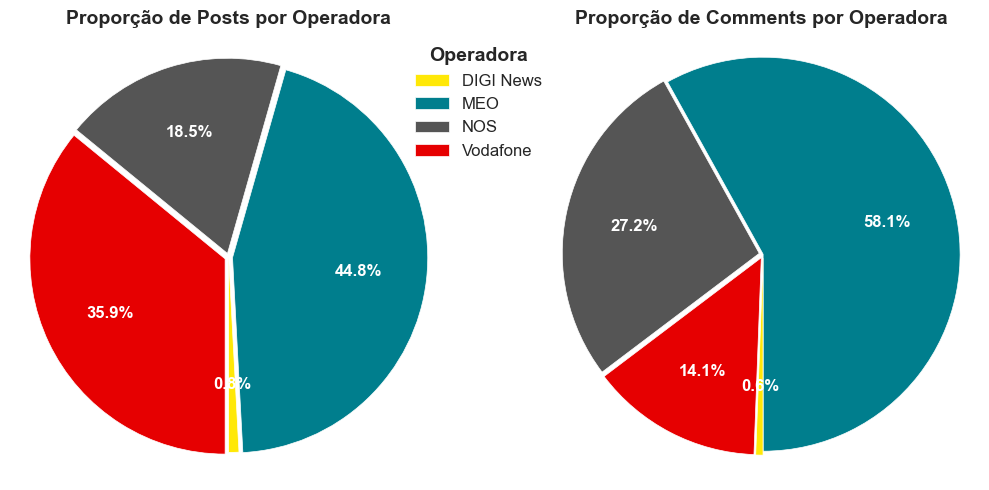

In [9]:
# Criar figura e eixos
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

df_graficos = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]
df_graficos.loc[df_graficos['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Contar a frequência de posts únicos por página
posts_frequencia = df_graficos[df_graficos['post_id'].notna()].groupby('page')['post_id'].nunique()

# Configurações do gráfico de pizza de posts
labels_posts = posts_frequencia.index
valores_posts = posts_frequencia.values
colors_posts = ['#FFE807', '#007E8D','#555555','#E60001'] # Selecionar tons de azul para cada categoria
explode_posts = (0.00,0.02, 0.02, 0.02)

# Criação do gráfico de pizza de posts
axs[0].pie(valores_posts, colors=colors_posts, autopct='%1.1f%%', 
           startangle=270, pctdistance=0.65, labeldistance=1.1, 
           textprops={'color': 'white', 'weight': 'bold', 'size': '12', 'horizontalalignment':'center'},
           explode=explode_posts)
axs[0].axis('equal')
axs[0].set_title('Proporção de Posts por Operadora', fontsize=14, fontweight='bold')

legend_properties = {'weight':'bold', 'size':'14'}
axs[0].legend(labels=labels_posts, title='Operadora',title_fontproperties=legend_properties, 
              fontsize=12, loc='upper right', bbox_to_anchor=(1.25, 1), frameon=False)

# Contar a frequência de comments por página
comments_frequencia = df_graficos[df_graficos['comment_id'].notna()]['page'].value_counts()

# Configurações do gráfico de pizza de comments
labels_comments = comments_frequencia.index
valores_comments = comments_frequencia.values
colors_comments = ['#007E8D','#555555','#E60001','#FFE807'] # Selecionar tons de azul para cada categoria
explode_comments = (0.00, 0.02, 0.02, 0.02)

# Criação do gráfico de pizza de comments
axs[1].pie(valores_comments, colors=colors_comments, autopct='%1.1f%%', 
           startangle=270, pctdistance=0.65, labeldistance=1.5, 
           textprops={'color': 'white', 'weight': 'bold', 'size': '12', 'horizontalalignment':'center'},
           explode=explode_comments)
axs[1].axis('equal')
axs[1].set_title('Proporção de Comments por Operadora', fontsize=14, fontweight='bold')

# Mostrar o gráfico
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/2_Gráficos_Circulares.svg",format='svg',dpi=1200)
plt.show()

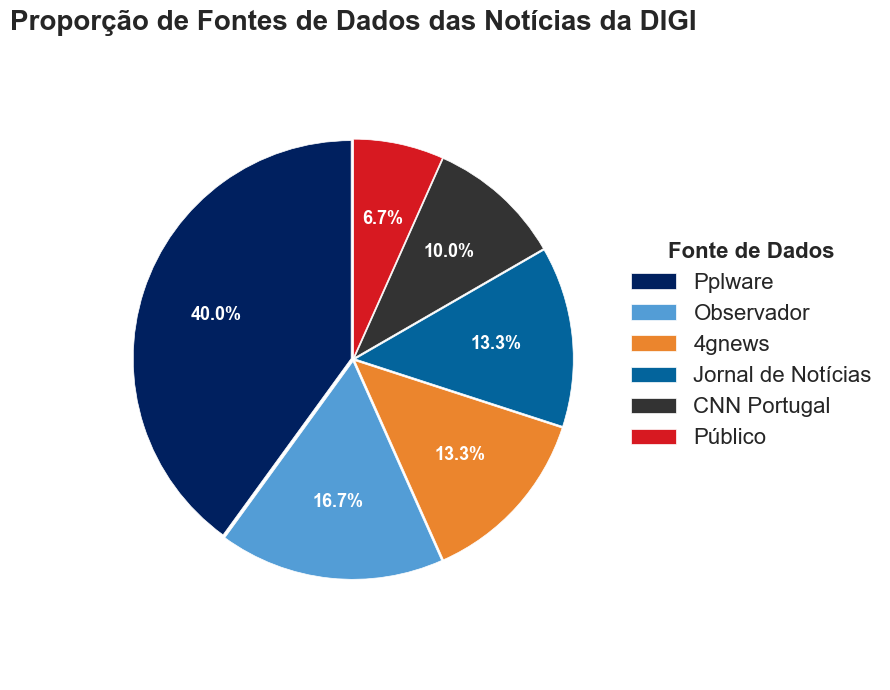

In [48]:
# Definir cores para as fontes de dados
colors_fontes = {'CNN Portugal':'#333333', 'Pplware':'#00205F','Observador':'#539DD6',
                 '4gnews':'#EB852D', 'Jornal de Notícias':'#03649C', 'Público':'#D71921'}

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(7,7))

# Contar a frequência de posts únicos por página
fontes_frequencia = DIGI_News_Fontes.value_counts()

# Configurações do gráfico de pizza de fontes de dados
labels_fontes = fontes_frequencia.index
valores_fontes = fontes_frequencia.values

# Mapear as cores corretas para cada página usando o dicionário colors_fontes
cores = [colors_fontes[fonte] for fonte in labels_fontes]

# Criar gráfico de pizza de fontes de dados
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
ax.pie(fontes_frequencia, labels=fontes_frequencia.index, autopct='%1.1f%%', colors=cores,
       startangle=90, pctdistance=0.65, labeldistance=1.05,
       textprops={'color': 'white', 'weight': 'bold', 'size': '13'}, 
       wedgeprops=dict(edgecolor='w'), explode = explode)
ax.axis('equal')
ax.set_title('Proporção de Fontes de Dados das Notícias da DIGI', fontsize=20, fontweight='bold')

legend_properties = {'weight': 'bold', 'size': '16'}
fig.legend(labels=labels_fontes, title='Fonte de Dados', title_fontproperties=legend_properties,
              fontsize=16, loc='right', bbox_to_anchor=(1.2, 0.5), frameon=False)

# Mostrar o gráfico
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/2.2_Gráficos_Circulares_PPT.svg",format='svg',dpi=1200)
plt.show()

---

### Série Temporal

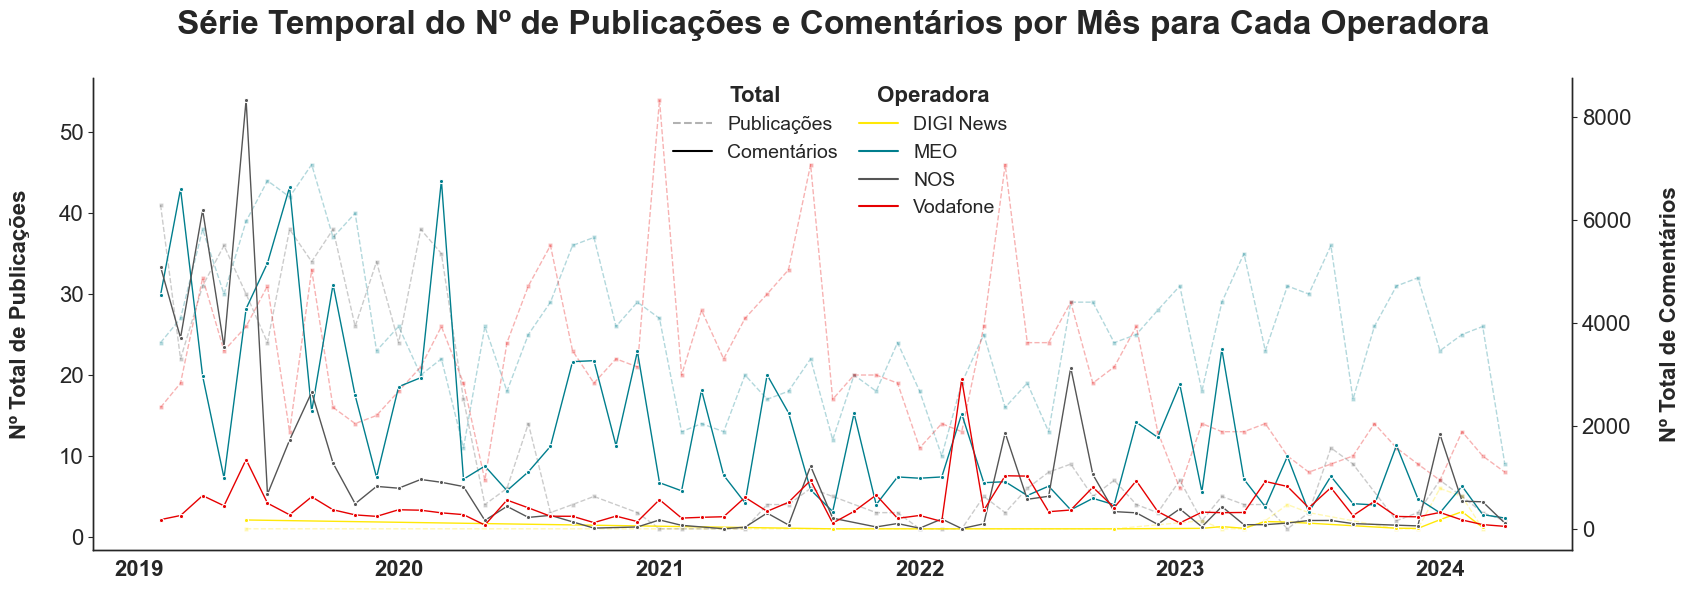

In [58]:
import matplotlib.lines as mlines

# Plotar a série temporal
palette = sns.color_palette('colorblind', 4)
fig, ax1 = plt.subplots(figsize=(17,6))
ax2 = ax1.twinx()

# Converter a coluna 'post_date' para o tipo datetime, caso ainda não esteja no formato correto
df_serie_temporal = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]
df_serie_temporal['post_date'] = pd.to_datetime(df_serie_temporal['post_date'])

# Calcular o número total de comentários por mês para cada página
posts_per_month = df_serie_temporal.groupby(['page', pd.Grouper(key='post_date', freq='M')])['post_id'] \
    .nunique().reset_index(name='Total de Publicações')
comments_per_month = df_serie_temporal.groupby(['page', pd.Grouper(key='post_date', freq='M')])['comment_id'] \
    .size().reset_index(name='Total de Comentários')

# Juntar as 'pages' DIGI News
posts_per_month.loc[posts_per_month['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
comments_per_month.loc[comments_per_month['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Definir a paleta de cores
palette = ['#FFE807','#007E8D', '#555555','#E60001'] 

# Plotar a série temporal do Nº de comentários e posts por mês para cada página
sns.lineplot(data=posts_per_month, x='post_date', y='Total de Publicações', hue='page', 
             palette=palette, ax=ax1, linestyle='--', alpha=0.3, linewidth=1, marker='s', markersize=3)
sns.lineplot(data=comments_per_month, x='post_date', y='Total de Comentários', hue='page', 
             palette=palette, ax=ax2, linewidth=1, marker='o', markersize=3)

# Adicionar título e rótulos dos eixos
ax1.set_title('Série Temporal do Nº de Publicações e Comentários por Mês para Cada Operadora\n', 
          fontsize=24, fontweight='bold')
ax1.set_ylabel('Nº Total de Publicações\n', fontweight='bold', fontsize=16)
ax1.set_xlabel('')

# Adicionar título e rótulos dos eixos
ax2.set_xlabel('')
ax2.set_ylabel('\nNº Total de Comentários', fontweight='bold', fontsize=16)

# Aumentar o tamanho das letras dos rótulos dos eixos X e Y
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
for lab in ax1.get_xticklabels():
    # if lab.get_text() == "Critério":
    lab.set_fontweight('bold')

# # Mostrar a legenda
legend_properties = {'weight':'bold', 'size':'16'}
legend_labels = ['Publicações', 'Comentários']
legend_lines = [mlines.Line2D([], [], color='black', linestyle='--', alpha=0.3),
                mlines.Line2D([], [], color='black')]
ax1.legend(legend_lines, legend_labels, title='Total', title_fontproperties=legend_properties, fontsize='14', 
           bbox_to_anchor=(0.38, 1.02), loc='upper left', frameon=False)
ax2.legend(title='Operadora', title_fontproperties=legend_properties, fontsize='14', 
           bbox_to_anchor=(0.63, 1.02), loc='upper right',frameon=False)

# Mostrar o gráfico
sns.despine(top=True, right=False)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/1_Série_Temporal_Posts e Comments_PPT.svg",format='svg',dpi=1200)
plt.show()

### Tabelas de Frequências dos Posts por Mês por Operadora

In [10]:
# Calcular a tabela de frequência dos comments por mês por operadora
df_serie_temporal.loc[df_serie_temporal['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Calcular o dia da semana (0 = segunda-feira, 6 = domingo)
df_serie_temporal['post_weekday'] = df_serie_temporal['post_date'].dt.weekday

# Dicionário para mapear os números de dia da semana para seus equivalentes por extenso
weekday_names = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Aplicar a conversão para extenso
df_serie_temporal['post_weekday'] = df_serie_temporal['post_weekday'].map(weekday_names)

# Calcular a tabela de frequência dos posts por dia da semana
posts_per_weekday = pd.pivot_table(df_serie_temporal, 
                                   index='post_weekday', 
                                   columns='page', 
                                   values='post_id', 
                                   aggfunc='nunique')

# Reordenar as colunas de acordo com a ordem desejada
posts_per_weekday = posts_per_weekday[['Vodafone', 'MEO', 'NOS', 'DIGI News']]


# Lista de dias da semana em ordem cronológica
ordered_weekdays = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Reindexar a tabela de acordo com a lista de dias da semana ordenada
posts_per_weekday = posts_per_weekday.reindex(ordered_weekdays)

# Renomear as colunas para tornar mais claro o conteúdo
posts_per_weekday.columns = [f'{col}' for col in posts_per_weekday.columns]
posts_per_weekday.index.name = 'Dia da Semana'
posts_per_weekday_percent = round(posts_per_weekday.div(posts_per_weekday.sum(axis=0), axis=1) * 100,1)

In [11]:
# Calcular o dia do mês
df_serie_temporal['day_of_month'] = df_serie_temporal['post_date'].dt.day

# Calcular a tabela de frequência dos posts por dia do mês
posts_per_day_of_month = pd.pivot_table(df_serie_temporal, 
                                        index='day_of_month', 
                                        columns='page', 
                                        values='post_id', 
                                        aggfunc='nunique')

# Reordenar as colunas de acordo com a ordem desejada
posts_per_day_of_month = posts_per_day_of_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
posts_per_day_of_month.columns = [f'{col}' for col in posts_per_day_of_month.columns]
posts_per_day_of_month.index.name = 'Dia do Mês'
posts_per_day_of_month_percent = round(posts_per_day_of_month.div(posts_per_day_of_month.sum(axis=0), axis=1) * 100,1)

In [12]:
# Calcular o dia da semana
df_serie_temporal['day_of_week'] = df_serie_temporal['post_date'].dt.day_of_week

# Calcular a semana do mês
df_serie_temporal['week_of_month'] = ((df_serie_temporal['day_of_month'] - 1) // 7) + 1

# Calcular a tabela de frequência dos posts por semana do mês
posts_per_week_of_month = pd.pivot_table(df_serie_temporal, 
                                         index='week_of_month', 
                                         columns='page', 
                                         values='post_id', 
                                         aggfunc='nunique')

# Reordenar as colunas de acordo com a ordem desejada
posts_per_week_of_month = posts_per_week_of_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
posts_per_week_of_month.columns = [f'{col}' for col in posts_per_week_of_month.columns]
posts_per_week_of_month.index.name = 'Semana do Mês'
posts_per_week_of_month_percent = round(posts_per_week_of_month.div(posts_per_week_of_month.sum(axis=0), axis=1) * 100,1)

In [13]:
# Calcular a tabela de frequência dos posts por mês por operadora
df_serie_temporal.loc[df_serie_temporal['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
df_serie_temporal['post_month'] = df_serie_temporal['post_month'].astype(int)

# Dicionário para mapear os números de mês para seus equivalentes por extenso
month_names = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
               7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

# Aplicar a conversão para extenso
df_serie_temporal['post_month'] = df_serie_temporal['post_month'].map(month_names)

posts_per_month = pd.pivot_table(df_serie_temporal, 
                                 index= pd.Grouper(key='post_month'), #, freq='Y'), 
                                 columns='page', 
                                 values='post_id', 
                                 aggfunc='nunique')

# Reordenar as colunas de acordo com a ordem desejada
posts_per_month = posts_per_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Lista de meses em ordem cronológica
ordered_months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 
                  'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Reindexar a tabela de acordo com a lista de meses ordenada
posts_per_month = posts_per_month.reindex(ordered_months)

# Renomear as colunas para tornar mais claro o conteúdo
posts_per_month.columns = [f'{col}' for col in posts_per_month.columns]
posts_per_month.index.name = 'Mês'
posts_per_month_percent = round(posts_per_month.div(posts_per_month.sum(axis=0), axis=1) * 100,1)

In [14]:
# Calcular a tabela de frequência dos posts por ano
df_serie_temporal['post_year'] = df_serie_temporal['post_year'].astype(int)
posts_per_year = pd.pivot_table(df_serie_temporal, 
                                index='post_year', 
                                columns='page', 
                                values='post_id', 
                                aggfunc='nunique')

# Reordenar as colunas de acordo com a ordem desejada
posts_per_year = posts_per_year[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
posts_per_year.columns = [f'{col}' for col in posts_per_year.columns]
posts_per_year.index.name = 'Ano'

# Calcular a %
posts_per_year_percent = round(posts_per_year.div(posts_per_year.sum(axis=0), axis=1) * 100,1)

In [15]:
display_side_by_side(posts_per_weekday_percent[['Vodafone', 'MEO', 'NOS']],
                     # posts_per_day_of_month_percent[['Vodafone', 'MEO', 'NOS']],
                     # posts_per_week_of_month_percent[['Vodafone', 'MEO', 'NOS']],
                     posts_per_month_percent[['Vodafone', 'MEO', 'NOS']],
                     posts_per_year_percent[['Vodafone', 'MEO', 'NOS']],
                     super_title = "Análise dos Posts",
                     titles=['Dia da Semana', 'Mês', 'Ano'])

,Vodafone,MEO,NOS
Dia da Semana,,,
Segunda-feira,9.2,12.4,8.2
Terça-feira,13.9,16.4,13.2
Quarta-feira,11.1,15.2,13.9
Quinta-feira,13.8,16.0,22.5
Sexta-feira,32.2,18.9,28.8
Sábado,14.8,11.6,8.7
Domingo,4.9,9.6,4.7
,Vodafone,MEO,NOS
Mês,,,


## Para os Comentários

In [16]:
# Calcular a tabela de frequência dos comments por dia da semana
comments_per_weekday = pd.pivot_table(df_serie_temporal, 
                                   index='post_weekday', 
                                   columns='page', 
                                   values='post_id', 
                                   aggfunc='count')

# Reordenar as colunas de acordo com a ordem desejada
comments_per_weekday = comments_per_weekday[['Vodafone', 'MEO', 'NOS', 'DIGI News']]


# Lista de dias da semana em ordem cronológica
ordered_weekdays = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Reindexar a tabela de acordo com a lista de dias da semana ordenada
comments_per_weekday = comments_per_weekday.reindex(ordered_weekdays)

# Renomear as colunas para tornar mais claro o conteúdo
comments_per_weekday.columns = [f'{col}' for col in comments_per_weekday.columns]
comments_per_weekday.index.name = 'Dia da Semana'
comments_per_weekday_percent = round(comments_per_weekday.div(comments_per_weekday.sum(axis=0), axis=1) * 100,1)

In [17]:
# Calcular a tabela de frequência dos comments por dia do mês
comments_per_day_of_month = pd.pivot_table(df_serie_temporal, 
                                        index='day_of_month', 
                                        columns='page', 
                                        values='post_id', 
                                        aggfunc='count')

# Reordenar as colunas de acordo com a ordem desejada
comments_per_day_of_month = comments_per_day_of_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
comments_per_day_of_month.columns = [f'{col}' for col in comments_per_day_of_month.columns]
comments_per_day_of_month.index.name = 'Dia do Mês'
comments_per_day_of_month_percent = round(comments_per_day_of_month.div(comments_per_day_of_month.sum(axis=0), axis=1) * 100,1)

In [18]:
# Calcular a tabela de frequência dos comentários por semana do mês
comments_per_week_of_month = pd.pivot_table(df_serie_temporal, 
                                         index='week_of_month', 
                                         columns='page', 
                                         values='post_id', 
                                         aggfunc='count')

# Reordenar as colunas de acordo com a ordem desejada
comments_per_week_of_month = comments_per_week_of_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
comments_per_week_of_month.columns = [f'{col}' for col in comments_per_week_of_month.columns]
comments_per_week_of_month.index.name = 'Semana do Mês'
comments_per_week_of_month_percent = round(comments_per_week_of_month.div(comments_per_week_of_month.sum(axis=0), 
                                                                          axis=1) * 100,1)

In [19]:
# Calcular a tabela de frequência dos comments por mês
comments_per_month = pd.pivot_table(df_serie_temporal, 
                                 index= pd.Grouper(key='post_month'), #, freq='Y'), 
                                 columns='page', 
                                 values='post_id', 
                                 aggfunc='count')

# Reordenar as colunas de acordo com a ordem desejada
comments_per_month = comments_per_month[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Lista de meses em ordem cronológica
ordered_months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Reindexar a tabela de acordo com a lista de meses ordenada
comments_per_month = comments_per_month.reindex(ordered_months)

# Renomear as colunas para tornar mais claro o conteúdo
comments_per_month.columns = [f'{col}' for col in comments_per_month.columns]
comments_per_month.index.name = 'Mês'
comments_per_month_percent = round(comments_per_month.div(comments_per_month.sum(axis=0), axis=1) * 100,1)

In [20]:
# Calcular a tabela de frequência dos comments por ano
comments_per_year = pd.pivot_table(df_serie_temporal, 
                                index='post_year', 
                                columns='page', 
                                values='post_id', 
                                aggfunc='count')

# Reordenar as colunas de acordo com a ordem desejada
comments_per_year = comments_per_year[['Vodafone', 'MEO', 'NOS', 'DIGI News']]

# Renomear as colunas para tornar mais claro o conteúdo
comments_per_year.columns = [f'{col}' for col in posts_per_year.columns]
comments_per_year.index.name = 'Ano'
comments_per_year_percent = round(comments_per_year.div(comments_per_year.sum(axis=0), axis=1) * 100,1)

In [21]:
display_side_by_side(comments_per_weekday_percent[['Vodafone', 'MEO', 'NOS']],
                     # comments_per_day_of_month_percent[['Vodafone', 'MEO', 'NOS']],
                     # comments_per_week_of_month_percent[['Vodafone', 'MEO', 'NOS']],
                     comments_per_month_percent[['Vodafone', 'MEO', 'NOS']],
                     comments_per_year_percent[['Vodafone', 'MEO', 'NOS']],
                     super_title = "Análise dos Comentários",
                     titles=['Dia da Semana', 'Mês', 'Ano'])

,Vodafone,MEO,NOS
Dia da Semana,,,
Segunda-feira,8.6,12.0,7.8
Terça-feira,18.1,15.0,16.6
Quarta-feira,14.8,18.2,10.7
Quinta-feira,8.9,9.4,15.9
Sexta-feira,36.4,12.9,18.9
Sábado,9.3,10.9,22.0
Domingo,3.9,21.6,8.2
,Vodafone,MEO,NOS
Mês,,,


---

### Gráficos `Posts | Nº de Reações, Comentários e Partilhas`

#### Histogramas

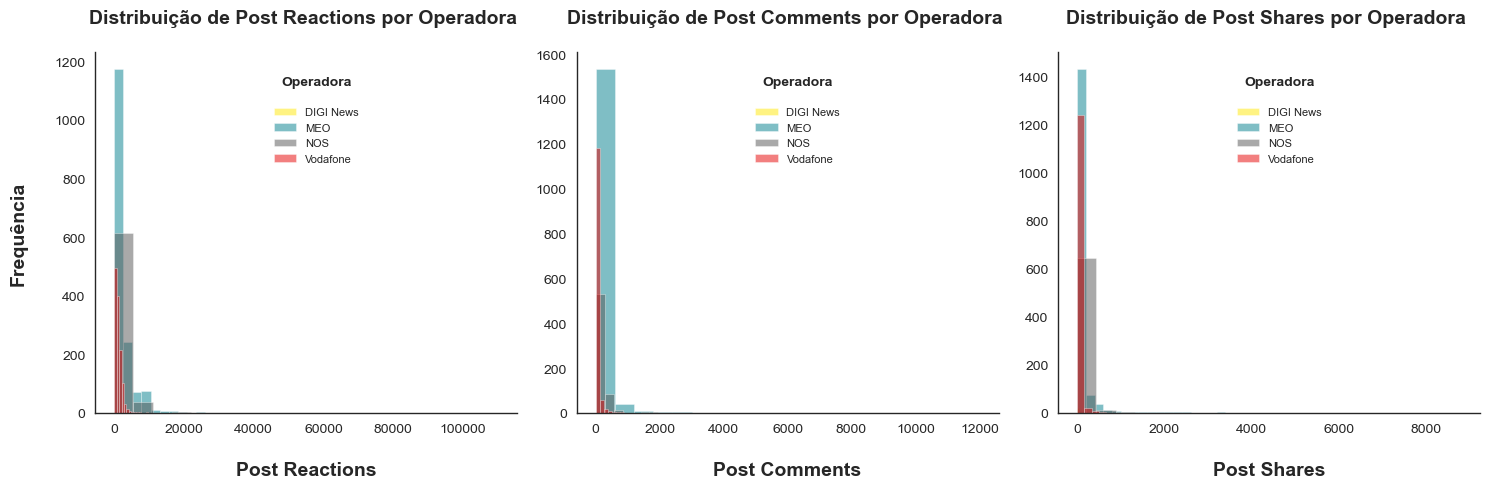

In [22]:
# Definir as cores para cada operadora com transparência
colors = {'Vodafone': '#E60001', 'MEO': '#007E8D', 'NOS': '#555555', 'DIGI News':'#FFE807'}

# Criar figura e eixos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
legend_properties = {'weight':'bold', 'size':'10'}

# Iterar sobre as variáveis e plotar os histogramas
for i, variavel in enumerate(['post_reactions', 'post_comments', 'post_shares']):
    # Agrupar os dados pelo identificador único do post e selecionar o primeiro registro de cada grupo
    posts_data = df_graficos.groupby('post_id').first()

    # Iterar sobre as operadoras e plotar os histogramas
    for operadora, dados in posts_data.groupby('page'):
        axs[i].hist(dados[variavel], bins=20, color=colors[operadora], alpha=0.5, label=operadora)

    # Definir os rótulos dos eixos x e y e o título do gráfico
    axs[i].set_xlabel('\n'+variavel.replace('_', ' ').title(), fontweight='bold', fontsize=14)
    axs[i].set_title(f'Distribuição de {variavel.replace("_", " ").title()} por Operadora \n', fontsize=14, fontweight='bold')

    # Adicionar a legenda
    axs[i].legend(title='\nOperadora\n', title_fontproperties=legend_properties, fontsize='8', 
           bbox_to_anchor=(0.4, 1), loc='upper left', frameon=False)

axs[0].set_ylabel('Frequência\n', fontweight='bold', fontsize=14)

# Mostrar o gráfico
sns.despine(top=True, right=True)
plt.tight_layout()
fig.savefig("Relatório/Gráficos/4.1_Histograma_RCS.svg",format='svg',dpi=1200)
plt.show()

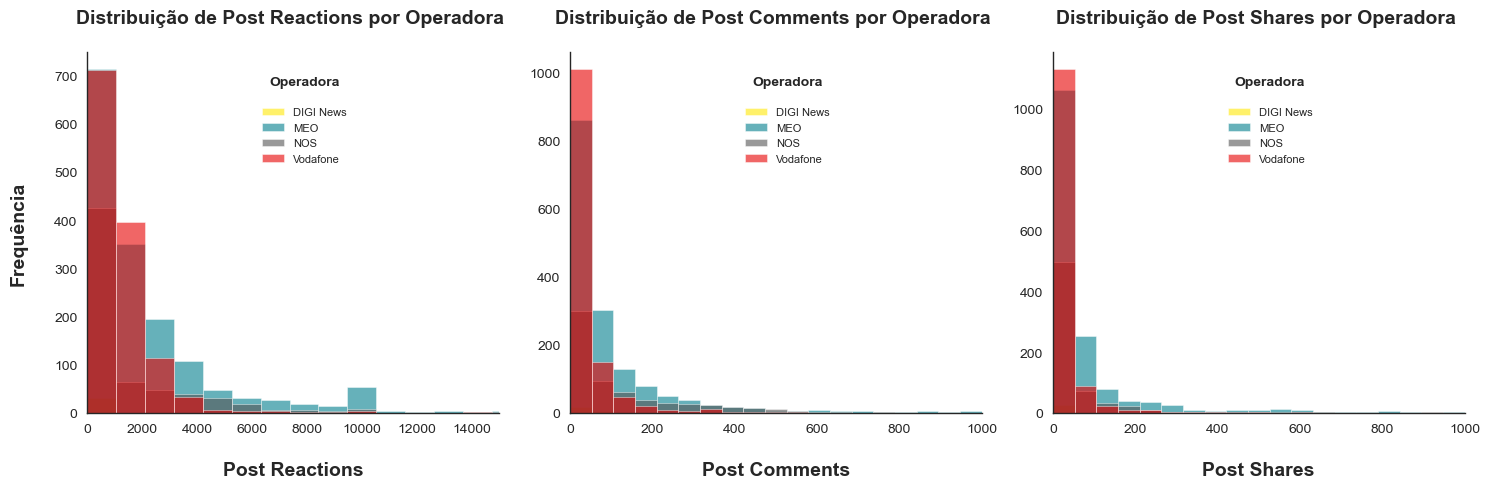

In [23]:
# Definir as cores para cada operadora com transparência
colors = {'Vodafone': '#E60001', 'MEO': '#007E8D', 'NOS': '#555555', 'DIGI News':'#FFE807'}

# Criar figura e eixos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
legend_properties = {'weight':'bold', 'size':'10'}

# Definir os limites dos bins
bins_limits = {
    'post_reactions': (0, 20000),
    'post_comments': (0, 1000),
    'post_shares': (0, 1000)
}

# Iterar sobre as variáveis e plotar os histogramas
for i, variavel in enumerate(['post_reactions', 'post_comments', 'post_shares']):
    # Agrupar os dados pelo identificador único do post e selecionar o primeiro registro de cada grupo
    posts_data = df_graficos.groupby('post_id').first()

    # Definir os bins com base nos limites especificados
    bins = np.linspace(bins_limits[variavel][0], bins_limits[variavel][1], 20)  # 20 bins uniformes

    # Iterar sobre as operadoras e plotar os histogramas
    for operadora, dados in posts_data.groupby('page'):
        axs[i].hist(dados[variavel], bins=bins, color=colors[operadora], alpha=0.6, label=operadora)

    # Definir os rótulos dos eixos x e y e o título do gráfico
    axs[i].set_xlabel('\n'+variavel.replace('_', ' ').title(), fontweight='bold', fontsize=14)
    axs[i].set_title(f'Distribuição de {variavel.replace("_", " ").title()} por Operadora \n', fontsize=14, fontweight='bold')

    # Adicionar a legenda
    axs[i].legend(title='\nOperadora\n', title_fontproperties=legend_properties, fontsize='8', 
           bbox_to_anchor=(0.4, 1), loc='upper left', frameon=False)
    
    # Definir o limite do eixo x para evitar outliers
    if variavel == 'post_reactions':
        axs[i].set_xlim(0, 15000)  # Defina o limite do eixo x para post_reactions
    elif variavel == 'post_comments':
        axs[i].set_xlim(0, 1000)   # Defina o limite do eixo x para post_comments
    elif variavel == 'post_shares':
        axs[i].set_xlim(0, 1000)   # Defina o limite do eixo x para post_shares
    
axs[0].set_ylabel('Frequência\n', fontweight='bold', fontsize=14)

# Mostrar o gráfico
sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/4.2_Histograma_RCS.svg",format='svg',dpi=1200)
plt.show()

---

#### Série Temporal do `Nº de Reações & Nº de Partilhas`

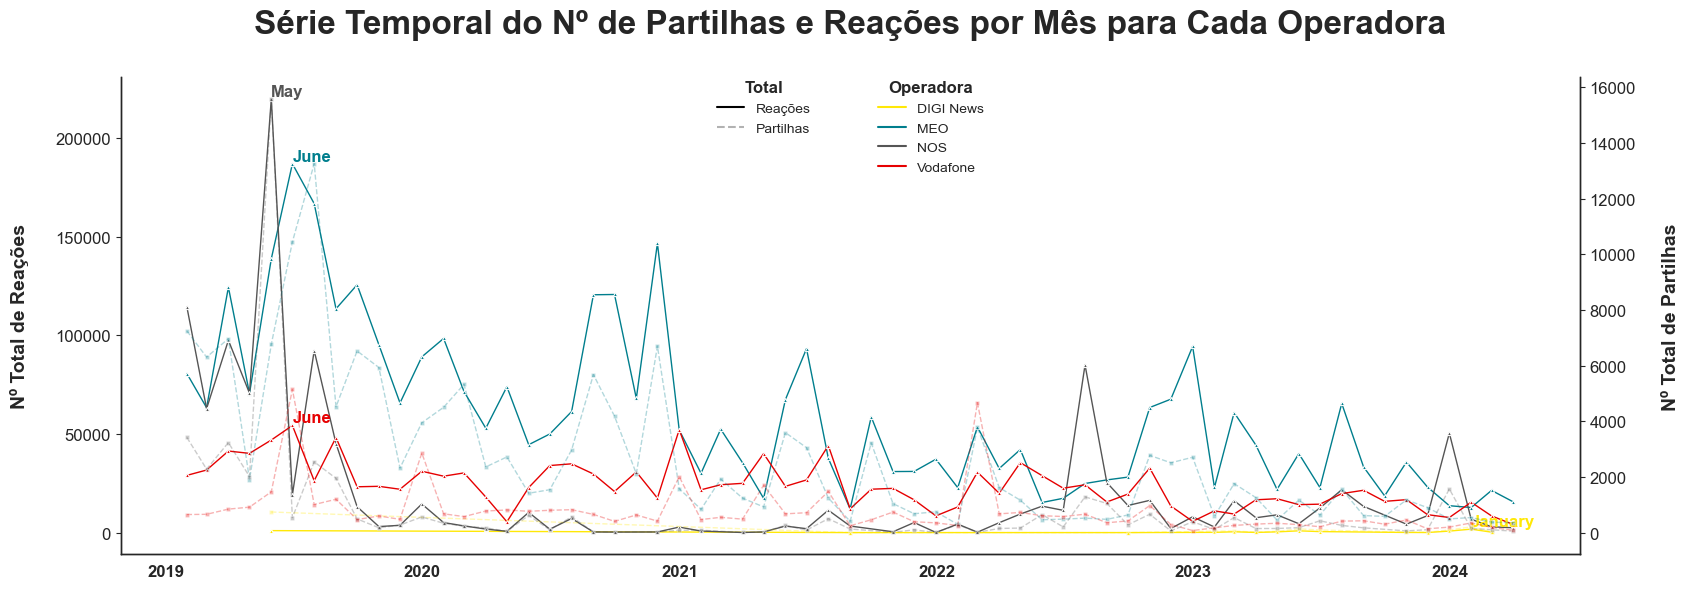

In [24]:
# Plotar a série temporal
fig, ax1 = plt.subplots(figsize=(17,6))
ax2 = ax1.twinx()

# Converter a coluna 'post_date' para o tipo datetime, caso ainda não esteja no formato correto
df_serie_temporal_posts = Facebook_Posts[Facebook_Posts['post_year'] >= 2019]
df_serie_temporal_posts['post_date'] = pd.to_datetime(df_serie_temporal_posts['post_date'])

# Calcular o número total de comentários por mês para cada página
reactions_per_month = df_serie_temporal_posts.groupby(['page', pd.Grouper(key='post_date', freq='M')])['post_reactions'] \
    .sum().reset_index(name='Total de Reações')
shares_per_month = df_serie_temporal_posts.groupby(['page', pd.Grouper(key='post_date', freq='M')])['post_shares'] \
    .sum().reset_index(name='Total de Partilhas')

# Juntar as 'pages' DIGI News
reactions_per_month.loc[reactions_per_month['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
shares_per_month.loc[shares_per_month['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Definir a paleta de cores
palette = ['#FFE807','#007E8D', '#555555','#E60001'] 

# Plotar a série temporal do Nº de reações e posts por mês para cada página
sns.lineplot(data=reactions_per_month, x='post_date', y='Total de Reações', hue='page', 
             palette=palette, ax=ax1, linewidth=1, marker='^', markersize=3)
sns.lineplot(data=shares_per_month, x='post_date', y='Total de Partilhas', hue='page', 
             palette=palette, ax=ax2, linestyle='--', alpha=0.3, linewidth=1, marker='s', markersize=3)


# Adicionar título e rótulos dos eixos
ax1.set_title('Série Temporal do Nº de Partilhas e Reações por Mês para Cada Operadora\n', 
          fontsize=24, fontweight='bold')
ax1.set_ylabel('Nº Total de Reações\n', fontweight='bold', fontsize=14)
ax1.set_xlabel('')

# Adicionar título e rótulos dos eixos
ax2.set_xlabel('')
ax2.set_ylabel('\nNº Total de Partilhas', fontweight='bold', fontsize=14)

# Aumentar o tamanho das letras dos rótulos dos eixos X e Y
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
for lab in ax1.get_xticklabels():
    # if lab.get_text() == "Critério":
    lab.set_fontweight('bold')

# Mostrar a legenda
legend_properties = {'weight':'bold', 'size':'12'}
legend_labels = ['Reações', 'Partilhas']
legend_lines = [mlines.Line2D([], [], color='black'),
                mlines.Line2D([], [], color='black', linestyle='--', alpha=0.3)]
ax1.legend(legend_lines, legend_labels, title='Total', title_fontproperties=legend_properties, fontsize='10', 
           bbox_to_anchor=(0.4, 1.02), loc='upper left', frameon=False)
ax2.legend(title='Operadora', title_fontproperties=legend_properties, fontsize='10', 
           bbox_to_anchor=(0.6, 1.02), loc='upper right',frameon=False)


# Criar um mapeamento entre o nome da página e a cor correspondente
color_mapping = {'Vodafone': '#E60001', 'MEO': '#007E8D', 'NOS': '#555555', 'DIGI News': '#FFE807'}

# Encontrar os valores máximos de cada série temporal
max_reactions = reactions_per_month.groupby('page')['Total de Reações'].max()
# max_shares = shares_per_month.groupby('page')['Total de Partilhas'].max()

# Obter os índices dos valores máximos
idx_max_reactions = reactions_per_month.loc[reactions_per_month.groupby('page')['Total de Reações'].idxmax()]
# idx_max_shares = shares_per_month.loc[shares_per_month.groupby('page')['Total de Partilhas'].idxmax()]

# Adicionar texto nos pontos máximos indicando o mês associado
for ax, data, max_data, idx_max_data in zip([ax1], [reactions_per_month],[max_reactions], [idx_max_reactions]):
    for page, max_value, idx_max in zip(max_data.index, max_data.values, idx_max_data.iterrows()):
        ax.text(idx_max[1]['post_date'], max_value, idx_max[1]['post_date'].strftime('%B'),
                color=color_mapping[page], fontsize=12, fontweight='bold', ha='left', va='bottom')


# Mostrar o gráfico
sns.despine(top=True, right=False)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/5_Série_Temporal_RP.svg",format='svg',dpi=1200)
plt.show()

In [25]:
# reactions_per_month.sort_values(by='Total de Reações', ascending= False)

---

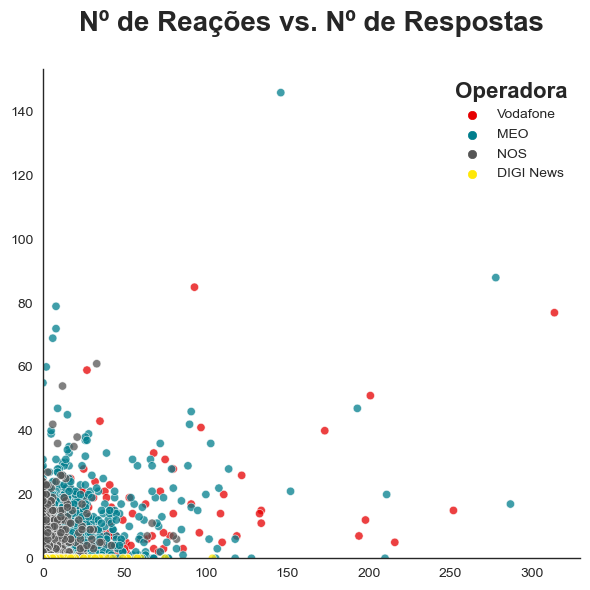

In [60]:
# ============================== comment_reactions VS comment_num_responses ================================
# Definir as cores para cada operadora
colors = {'Vodafone': '#E60001', 'MEO': '#007E8D', 'NOS': '#555555', 'DIGI News': '#FFE807'}

# Filtrar os dados para remover valores nulos em ambas as colunas
filtered_data = df_graficos.dropna(subset=['comment_reactions', 'comment_num_responses'])

# Criar o gráfico de dispersão com cores diferenciadas por operadora
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data=filtered_data, 
                x='comment_reactions', 
                y='comment_num_responses', 
                hue='page', 
                palette=colors, 
                alpha=0.75
               )
plt.title('Nº de Reações vs. Nº de Respostas\n', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
# plt.xlabel('\nNº de Reações', fontweight='bold', fontsize=16)
# plt.ylabel('Nº de Respostas\n', fontweight='bold', fontsize=16)
plt.legend(title='Operadora', title_fontproperties=legend_properties, fontsize='10', 
           loc='upper right',frameon=False)

plt.xlim(0,None)
plt.ylim(0,None)


sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/7_Dispersão_RR.png",format='png',dpi=1200)
plt.show()

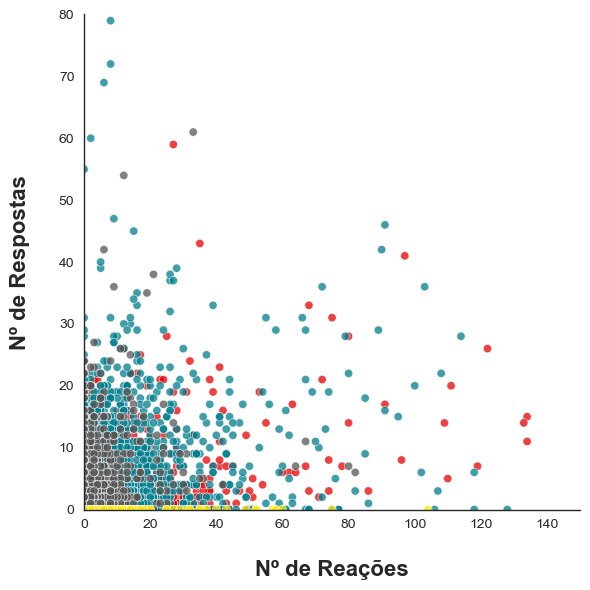

In [61]:
# ============================== comment_reactions VS comment_num_responses ================================
# Definir as cores para cada operadora
colors = {'Vodafone': '#E60001', 'MEO': '#007E8D', 'NOS': '#555555', 'DIGI News': '#FFE807'}

# Filtrar os dados para remover valores nulos em ambas as colunas
filtered_data = df_graficos.dropna(subset=['comment_reactions', 'comment_num_responses'])

# Criar o gráfico de dispersão com cores diferenciadas por operadora
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data=filtered_data, 
                x='comment_reactions', 
                y='comment_num_responses', hue='page', 
                palette=colors, 
                alpha=0.75,
                legend=None)

# plt.title('Gráfico de Dispersão: Reações vs. Respostas\n', fontsize=20, fontweight='bold')
plt.xlabel('\nNº de Reações', fontweight='bold', fontsize=16)
plt.ylabel('Nº de Respostas\n', fontweight='bold', fontsize=16)
# plt.legend(title='Operadora', title_fontproperties=legend_properties, fontsize='10', 
#            loc='upper right',frameon=False)

plt.xlim(0,150)
plt.ylim(0,80)

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/7.2_Dispersão_RR.png",format='png',dpi=1200)
plt.show()

---

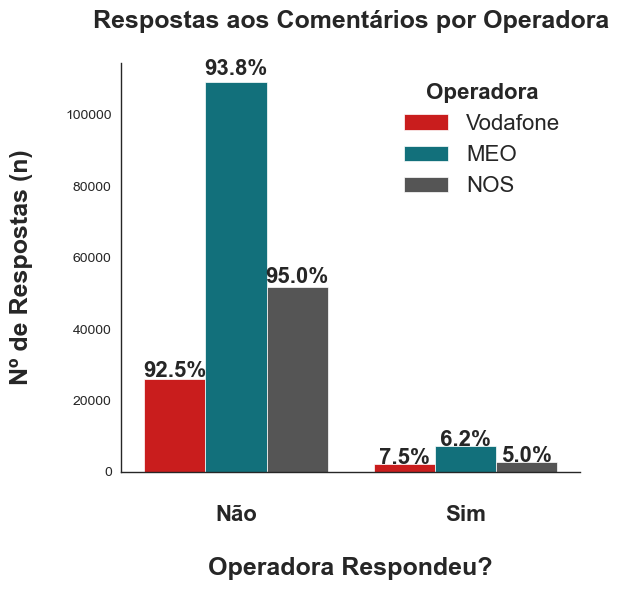

In [66]:
################################### comment_operator_responded ###################################
import matplotlib.ticker as mtick

# Filtrar os dados para remover valores nulos em 'comment_operator_responded' e 'page'
filtered_data_2 = df_graficos.dropna(subset=['comment_operator_responded', 'page'])
filtered_data_2 = filtered_data_2[filtered_data_2['page'] != 'DIGI News']

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(data=filtered_data_2, 
              x='comment_operator_responded', 
              hue='page', 
              palette=colors,
              ax=ax
             )

# Adicionar título e rótulos dos eixos
ax.set_title('Respostas aos Comentários por Operadora\n', 
          fontsize=18, fontweight='bold')
ax.set_ylabel('Nº de Respostas (n)\n', fontweight='bold', fontsize=18)
ax.set_xlabel('\nOperadora Respondeu?', fontweight='bold', fontsize=18)
ax.set_xticklabels(['\nNão', '\nSim'], fontweight='bold', fontsize=16)
ax.legend(title='Operadora', title_fontproperties=legend_properties, fontsize='16',
          loc='upper right',frameon=False)

# Definir uma função para formatar os valores como porcentagens
def percentage(x, pos):
    return '{:.1f}%'.format(x)
  
page_label = ['Vodafone','Vodafone','MEO','MEO','NOS','NOS']

# Adicionar os valores em percentagem acima das barras
for i, p in enumerate(ax.patches):
    height = p.get_height()
    total_page_responses = len(filtered_data_2[filtered_data_2['page'] == page_label[i]])
    percentage_value = (height / total_page_responses) * 100
    ax.text(p.get_x() + p.get_width()/2., 
            (height * 1.02), 
            '{:.1f}%'.format(percentage_value), 
            ha="center",
            fontsize=16, 
            fontweight='bold')
    
sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig("Relatório/Gráficos/8_Barras Resposta da Operadora_PPT.svg",format='svg',dpi=1200)
plt.show()

In [29]:
# Calcular o número de respostas por operadora
responses_by_operator = filtered_data_2.groupby('page')['comment_operator_responded'].value_counts().unstack()

# Calcular a porcentagem de respostas "Sim" por operadora
responses_by_operator['% Não'] = (responses_by_operator[0] / responses_by_operator.sum(axis=1)) * 100
responses_by_operator['% Sim'] = (responses_by_operator[1] / responses_by_operator.sum(axis=1)) * 100

# Renomear as colunas para "Não" e "Sim"
responses_by_operator = responses_by_operator.rename(columns={0: 'Não', 1: 'Sim'})
responses_by_operator

comment_operator_responded,Não,Sim,% Não,% Sim
page,,,,
MEO,109071,7187,93.818060,6.176955
NOS,51838,2706,95.038868,4.952503
Vodafone,26128,2128,92.468856,7.506578


---

## 🧖Análise dos Users

In [30]:
df_users_2019 = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]
df_users_2019.loc[df_users_2019['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Nº de link únicos
print('\033[1mNº de Users Únicos a Comentar a partir de 2019:\033[0m',len(df_users_2019['user_link'].unique()))

Nº de Users Únicos a Comentar a partir de 2019: 114198


In [31]:
# ============================ Nº de Comentários por User ==================================

# Número máximo de comentários de um user único:
max_comments_per_user = df_users_2019.groupby(['user_link'])['comment_id'].count().reset_index()
max_comments_per_user = max_comments_per_user.groupby('user_link').max()

# Contagem do número de comentários por users
comment_counts = max_comments_per_user['comment_id'].value_counts()

# Calcular a % de users para cada número de comentários
stratified_comments = pd.DataFrame({'Nº de Comentários': comment_counts.index, 
                                    'n Users': comment_counts.values,
                                    '% Users': round(comment_counts / len(max_comments_per_user) * 100,1)})

# Calcular a % acumulada de usuários para cada número de comentários
stratified_comments['% Users >= X'] = (100 - stratified_comments['% Users'].cumsum()).shift(-1).fillna(0)

# Ordenar o DataFrame pelo número de comentários
stratified_comments.sort_values(by='Nº de Comentários', inplace=True)
stratified_comments.set_index('Nº de Comentários', inplace=True)
stratified_comments

,n Users,% Users,% Users >= X
Nº de Comentários,,,
1,82603,72.3,13.2
2,16545,14.5,7.8
3,6184,5.4,5.2
4,2997,2.6,3.7
5,1709,1.5,2.8
...,...,...,...
147,1,0.0,0.5
151,1,0.0,0.5
154,1,0.0,0.0


In [32]:
# Estudar os casos com +150 comentários
stratified_comments.loc[stratified_comments.index >= 150]

,n Users,% Users,% Users >= X
Nº de Comentários,,,
151,1,0.0,0.5
154,1,0.0,0.0
195,1,0.0,0.5
265,1,0.0,0.5


In [33]:
# Identificar o user_link que fez mais de 150 comentários
user_with_over_150_comments = df_users_2019['user_link'].value_counts() \
    [df_users_2019['user_link'].value_counts() >= 150]

# Filtrar os comentários dos usuários com mais de 150 comentários
comments_of_users_over_150 = df_users_2019[df_users_2019['user_link'].isin(user_with_over_150_comments.index)]

print('\033[1mNº de Users com + 150 Comentários\033[0m',len(comments_of_users_over_150.groupby(['user_link'])))
comments_per_user_per_post = comments_of_users_over_150.groupby(['post_link', 'user_name']) \
                                                       .size() \
                                                       .reset_index(name='comment_count')

# comments_per_user_per_post[(comments_per_user_per_post['user_name'] != 'Carlos Pereira') & 
#                            (comments_per_user_per_post['user_name'] != 'Lopes Bastos')]

# Verifica-se que são users ativos em vários posts diferentes! [CGPT]

Nº de Users com + 150 Comentários 4


In [34]:
# comments_of_users_over_150_comments.groupby(['user_link']).sum()

In [35]:
# ============================ Nº de Comentários por User [Agrupado de '> 10'] ==================================
# Identificar os índices onde o número de comentários é maior ou igual a 10
indices_over_10 = stratified_comments.index >= 10

# Calcular a soma do número de usuários e a porcentagem acumulada para esses índices
total_users_over_10 = stratified_comments.loc[indices_over_10, 'n Users'].sum()
percent_users_over_10 = stratified_comments.loc[indices_over_10, '% Users'].sum()


# Criar uma nova linha para '> 10' com os valores calculados, remover  as linhas abaixo do índice 10 e renomear para '> 10'
stratified_comments.loc[10] = [total_users_over_10, percent_users_over_10, percent_users_over_10]
stratified_comments = stratified_comments.loc[stratified_comments.index <= 10]
stratified_comments.rename(index={10: '> 10'}, inplace=True)
display_side_by_side(stratified_comments,
                     super_title = "Análise dos Utilizadores",
                     titles=['Nº de Comentários por User <br></br>'])

,n Users,% Users,% Users >= X
Nº de Comentários,,,
1,82603,72.3,13.2
2,16545,14.5,7.8
3,6184,5.4,5.2
4,2997,2.6,3.7
5,1709,1.5,2.8
6,1080,0.9,2.1
7,766,0.7,1.7
8,507,0.4,1.4
9,325,0.3,1.2


---

In [36]:
# Agrupar os dados pelo ano, pelo link do usuário e pela operadora, contando o número de links de usuários únicos
df_users_2019['post_year'] = df_users_2019['post_year'].astype(int)
unique_users_per_year = df_users_2019.groupby(['post_year', 'user_link', 'page']).size().reset_index(name='unique_user_count')
unique_users_per_year = unique_users_per_year.drop_duplicates()
unique_users_per_year.fillna(0, inplace=True)
unique_users_per_year_pivot = unique_users_per_year.pivot_table(index='post_year', columns='page', values='unique_user_count', aggfunc='sum').fillna(0)
unique_users_per_year_pivot.columns.name = ''
unique_users_per_year_pivot.index.name = 'Ano'
display_side_by_side(unique_users_per_year_pivot,
                     super_title = " ",
                     titles=['Nº de Users Únicos por Ano e Operadora <br></br>'])

,DIGI News,MEO,NOS,Vodafone
Ano,,,,
2019,173.0,44618.0,35319.0,5526.0
2020,0.0,27845.0,4136.0,3534.0
2021,0.0,16046.0,2074.0,4627.0
2022,0.0,14617.0,8687.0,8763.0
2023,652.0,11820.0,3150.0,5503.0
2024,361.0,1312.0,1178.0,303.0


In [37]:
# ============================ Users que comentam em diferentes operadoras ==================================
# Contagem do número de operadoras em que cada user comentou
user_operators_count = df_users_2019.groupby(['user_link', 'user_name'])['page'].nunique().reset_index()

# Calcular a contagem de users por número de operadoras
users_per_operator_count = user_operators_count.groupby('page').size().reset_index(name='count')

# Calcular a percentagem de users para cada número de operadoras
users_per_operator_count['%'] = round((users_per_operator_count['count'] / len(user_operators_count)) * 100,1)

# Calcular a percentagem de users que comentaram em mais de 1, 2, 3 operadoras
percentages = {}
for i in range(0, users_per_operator_count['page'].max()):
    percentage = users_per_operator_count[users_per_operator_count['page'] > i]['%'].sum()
    percentages[f'> {i}'] = percentage

users_per_operator_count_1 = pd.DataFrame.from_dict(percentages, orient='index', columns=['%'])
users_per_operator_count_1.index.name = 'Nº de Operadoras'

users_per_operator_count.rename(columns={'page': 'Nº de Operadoras', 'count':'n'}, inplace=True)
display_side_by_side(users_per_operator_count.set_index('Nº de Operadoras'),
                     users_per_operator_count_1,
                     super_title = "",
                     titles=['Nº de Users por Operadora <br></br>', '<br></br>'])

Nº de Users por Operadora 
 
 
 
 n 
 % 
 
 
 Nº de Operadoras 
 
 
 
 
 
 
 1 
 101253 
 88.7 
 
 
 2 
 10939 
 9.6 
 
 
 3 
 1993 
 1.7 
 
 
 4 
 13 
 0.0 
 
 
 
 
 
 
 % 
 
 
 Nº de Operadoras 
 
 
 
 
 
 > 0 
 100.0 
 
 
 > 1 
 11.3 
 
 
 > 2 
 1.7 
 
 
 > 3 
 0.0

In [40]:
# Etapa 1: Agrupe os dados pelo usuário e obtenha uma lista de operadoras em que cada usuário comentou
user_comments_by_operator = df_users_2019.groupby('user_link')['page'].apply(set).reset_index()

# Etapa 2: Calcular a porcentagem de usuários que comentam entre operadoras
# Criar um DataFrame vazio para armazenar os resultados
operator_matrix = pd.DataFrame(index=df_users_2019['page'].unique(), columns=df_users_2019['page'].unique())

# Preencher o DataFrame com a porcentagem de usuários que comentam entre operadoras
for operator1 in operator_matrix.index:
    for operator2 in operator_matrix.columns:
        if operator1 == operator2:
            # Se for a mesma operadora, definir como NaN
            operator_matrix.loc[operator1, operator2] = 100
        else:
            # Calcular a % de usuários que comentaram em ambas as operadoras
            users_in_both_operators = user_comments_by_operator[user_comments_by_operator['page'].apply(lambda x: operator1 in x and operator2 in x)]
            users_in_operator1 = user_comments_by_operator[user_comments_by_operator['page'].apply(lambda x: operator1 in x)]
            if not users_in_operator1.empty:
                percentage = len(users_in_both_operators) / len(users_in_operator1)
                operator_matrix.loc[operator1, operator2] = round(percentage * 100,1)
            else:
                # Se não houver usuários que comentaram na operadora 1, definir como 0
                operator_matrix.loc[operator1, operator2] = 0

display_side_by_side(operator_matrix,
                     super_title = "",
                     titles=['Matriz de % Horizontais de Users que comentam entre Operadoras <br></br>'])

,Vodafone,MEO,NOS,DIGI News
Vodafone,100,26.5,16.4,0.4
MEO,7.9,100,11.0,0.2
NOS,9.2,20.9,100,0.2
DIGI News,7.3,14.7,7.3,100


---

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#A30000, #F91701); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>3 | Data Preparation</b></h1></center>
</div>

In [7]:
Facebook_Posts = pd.read_csv('Datasets_Vodafone/Facebook_Posts.txt', sep='\t', encoding='utf-8')
Facebook_Comments = pd.read_csv('Datasets_Vodafone/Facebook_Comments.txt', sep='\t', encoding='utf-8')

# Garantir que as colunas 'post_id' e 'page' são do tipo str
Facebook_Comments['post_id'] = Facebook_Comments['post_id'].astype(str)
Facebook_Comments['page'] = Facebook_Comments['page'].astype(str)

Facebook_Posts['post_id'] = Facebook_Posts['post_id'].astype(str)
Facebook_Posts['page'] = Facebook_Posts['page'].astype(str)

# Copiar os valores da coluna 'page' antes da substituição
DIGI_News_Fontes = Facebook_Posts.loc[Facebook_Posts['page'].str.contains('DIGI'), 'page'].copy()

# Limpar os nomes das fontes de dados
DIGI_News_Fontes = DIGI_News_Fontes.str.extract(r'\[([^\]]+)\]', expand=False)

Facebook_Posts.loc[Facebook_Posts['page'].str.contains('DIGI'), 'page'] = 'DIGI News'
Facebook_Comments.loc[Facebook_Comments['page'].str.contains('DIGI'), 'page'] = 'DIGI News'

# Juntar as tabelas
Facebook_Posts_Comments = pd.merge(Facebook_Comments, Facebook_Posts, how='outer', on=['post_id', 'page'])
# Facebook_Posts_Comments.info()

In [8]:
Facebook_Posts_Comments_2019_24 = Facebook_Posts_Comments[Facebook_Posts_Comments['post_year'] >= 2019]
print("\033[1mNº de Publicações entre 2019-2024:\033[0m {:>12}".format(
    len(Facebook_Posts_Comments_2019_24[~Facebook_Posts_Comments_2019_24.duplicated(subset=['post_id'])])))
print("\033[1mNº de Comentários entre 2019-2024:\033[0m {:>14}".format(
    len(Facebook_Posts_Comments_2019_24)))
print("\033[1mNº de Utilizadores Únicos entre 2019-2024:\033[0m {:>3}".format(
    len(Facebook_Posts_Comments_2019_24[~Facebook_Posts_Comments_2019_24.duplicated(subset=['user_link'])])))

Nº de Publicações entre 2019-2024:         3553
Nº de Comentários entre 2019-2024:         200448
Nº de Utilizadores Únicos entre 2019-2024: 114198


# <a class='anchor' id='4.2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent; 
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #A30000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #A30000;
                       font-size: 34px; font-family: 'Avenir Next LT Pro', sans-serif;"><b>Users | Local de Residência + Género</b></h2></center>
</div>

## 🙎‍♂️🙎‍♀️ Utilizadores

In [4]:
# Importar os users.json
Facebook_Users = pd.read_json('Datasets_Vodafone/Facebook_Users.json', encoding='utf-8')
Facebook_Users.sample(1)

,user_link,user_name,user_current_city,user_hometown
61753,https://www.facebook.com/ed.lobo1986,Edgar Lobo,"Bencatel, Evora, PortugalCidade atual",Vila ViçosaNaturalidade


In [16]:
print("\033[1mNº de Utilizadores Únicos Obtidos:\033[0m {:>3}".format(len(Facebook_Users)))

Nº de Utilizadores Únicos Obtidos: 129096


In [17]:
# Verificar a Base de Dados da DIGI_News_users
DIGI_News_Users = pd.read_json('Datasets_Vodafone/Facebook_DIGI_News_users_2024-03-21.json', encoding='utf-8')
DIGI_News_Users.sample(1)

,user_link,user_name,cidade_atual,naturalidade,genero
874,https://www.facebook.com/luismendes.santos.7,Luis Santos,São Domingos de Rana,Viseu,Masculino


---

In [18]:
# Verificar todos os DataFrames quanto à presença do caractere '�'
for df_name, df in zip(['Facebook_Users'], [Facebook_Users]):
    print(f"\033[1mVerificando o DataFrame {df_name}...\033[0m")
    for column in df.columns:
        contains_character = df[column].astype(str).str.contains('�', na=False).any()
        if contains_character:
            print(f"Caractere '�' encontrado na coluna '{column}' do DataFrame {df_name}")

Verificando o DataFrame Facebook_Users...
Caractere '�' encontrado na coluna 'user_current_city' do DataFrame Facebook_Users
Caractere '�' encontrado na coluna 'user_hometown' do DataFrame Facebook_Users


In [19]:
# Verificar as linhas da variável 'user_current_city'  com caracter especial '�'
CE_Users_Current_City = Facebook_Users.dropna(subset=['user_current_city']) \
    [Facebook_Users.dropna(subset=['user_current_city'])['user_current_city'].str.contains('�')]
print('\033[1mTotal Observações com Caracter Especial = \033[0m', len(CE_Users_Current_City))
CE_Users_Current_City.drop_duplicates(subset='user_current_city').reset_index()

Total Observações com Caracter Especial =  59


,index,user_link,user_name,user_current_city,user_hometown
0,1684,https://www.facebook.com/bernardete.jorge.10,Bernardete Jorge,"�Lhavo, Aveiro, PortugalCidade atual","Gafanha Da Encarnação, Aveiro, PortugalNaturalidade"
1,21724,https://www.facebook.com/vera.garrido.3958,Vera Garrido,"�Rvore, Porto, PortugalCidade atual",Vila do CondeNaturalidade
2,21845,https://www.facebook.com/profile.php?id=100022937430163,Ivone Santos,"�Guas Santas, Porto, PortugalCidade atual",PortoNaturalidade
3,29536,https://www.facebook.com/fatima.madeira.758,Fatima Madeira,"�Gua De Pau, Azores, PortugalCidade atual",
4,43816,https://www.facebook.com/graca.magalhaes.9081,Graca Magalhaes,"�Gua Longa, Porto, PortugalCidade atual",GondomarNaturalidade
5,52364,https://www.facebook.com/elisabete.raimundo.90,Elisabete Raimundo,"Olhos De �Gua, Faro, PortugalCidade atual","Santana Da Serra, Beja, PortugalNaturalidade"
6,95222,https://www.facebook.com/profile.php?id=100025896813196,Conceicao Sousa,"Entre �Guas, Madeira, PortugalCidade atual",
7,121128,https://www.facebook.com/profile.php?id=100008257869353,Olinda Dias,"Pinheiro De �Zere, Viseu, PortugalCidade atual",MaputoNaturalidade


In [20]:
# Verificar as linhas da variável 'user_hometown'  com caracter especial '�'
CE_Users_Hometown = Facebook_Users.dropna(subset=['user_hometown']) \
    [Facebook_Users.dropna(subset=['user_hometown'])['user_hometown'].str.contains('�')]
print('\033[1mTotal Observações com Caracter Especial = \033[0m', len(CE_Users_Hometown))
CE_Users_Hometown.drop_duplicates(subset='user_hometown').reset_index()

Total Observações com Caracter Especial =  30


,index,user_link,user_name,user_current_city,user_hometown
0,11639,https://www.facebook.com/guiomar.rocha.129,Guiomar Rocha,"�Lhavo, Aveiro, PortugalCidade atual","�Lhavo, Aveiro, PortugalNaturalidade"
1,19572,https://www.facebook.com/andre.figueiredo.46,André Figueiredo,Santa Comba DãoCidade atual,"Pinheiro De �Zere, Viseu, PortugalNaturalidade"
2,48064,https://www.facebook.com/beatriz.azevedo.50999405,Beatriz Azevedo,PortoCidade atual,"�Guas Santas, Porto, PortugalNaturalidade"
3,55600,https://www.facebook.com/mariajose.matos.5817,Maria José Matos,AveiroCidade atual,"Vale De �Lhavo, Aveiro, PortugalNaturalidade"
4,85195,https://www.facebook.com/lurdes.dossantospestana,Lurdes Dos Santos Pestana,,"Serra De �Gua, Madeira, PortugalNaturalidade"
5,114701,https://www.facebook.com/humberto.muniz.7,Humberto Muniz,"Parede, Lisboa, PortugalCidade atual","�Gua Preta, Pernambuco, BrazilNaturalidade"


> Estes valores **serão limpos** mais adiante!

---

#### **`Local de Residência`**

In [21]:
# Ler o CSV com os Distritos, Concelhos e Freguesias de Portugal [Total: 18 Distritos | 308 Concelhos | 3 091 Freguesias]
# Fonte: https://dados.gov.pt/pt/datasets/freguesias-de-portugal/#resources
dcf_portugal = pd.read_csv('Datasets_Vodafone/Auxiliares/Distritos_Conselhos_Freguesias_Portugal_GOV.csv',sep=";")
dcf_portugal.head(5)

,distrito,concelho,freguesia
0,Aveiro,Águeda,Aguada de Cima
1,Aveiro,Águeda,Fermentelos
2,Aveiro,Águeda,Macinhata do Vouga
3,Aveiro,Águeda,Valongo do Vouga
4,Aveiro,Águeda,União das freguesias de Águeda e Borralha


In [22]:
# Fonte de Dados: https://public.opendatasoft.com/explore/dataset/georef-portugal-freguesia/table
# Optou-se por usar esta para ser possível criar as visualizações gráficas, uma vez que faz match com o ficheiro .GeoJSON
dcf_portugal_2 = pd.read_excel('Datasets/georef-portugal-freguesia.xlsx')
dcf_portugal_2[['Official Name District', 'Official Name Municipality', 'Official Name Parish']].head(5)

,Official Name District,Official Name Municipality,Official Name Parish
0,Aveiro,Águeda,Aguada de Cima
1,Aveiro,Águeda,Fermentelos
2,Aveiro,Águeda,Macinhata do Vouga
3,Aveiro,Águeda,Valongo do Vouga
4,Aveiro,Águeda,Águeda e Borralha


In [23]:
# Agrupar por 'distrito' e 'concelho' e contar o número de ocorrências em cada grupo
distritos_concelhos = dcf_portugal_2.groupby(['Official Name District', 'Official Name Municipality']).first().reset_index()

print('\033[1mNº de Concelhos Duplicados:\033[0m', distritos_concelhos.duplicated(subset=['Official Name Municipality'], keep=False).sum())
distritos_concelhos[distritos_concelhos.duplicated(subset=['Official Name Municipality'], keep=False)]\
    [['Official Name District', 'Official Name Municipality', 'Official Name Parish']] \
    .sort_values(by='Official Name Municipality')

Nº de Concelhos Duplicados: 2


,Official Name District,Official Name Municipality,Official Name Parish
23,Açores,Lagoa,Água de Pau
111,Faro,Lagoa,Ferragudo


In [24]:
print('\033[1mNº de Freguesias Duplicadas:\033[0m', (dcf_portugal_2.duplicated(subset=['Official Name Parish'], keep=False)).sum())
dcf_portugal_2[dcf_portugal_2.duplicated(subset=['Official Name Parish'], keep=False)] \
        [['Official Name District', 'Official Name Municipality', 'Official Name Parish']] \
        .sort_values(by='Official Name Parish')

Nº de Freguesias Duplicadas: 380


,Official Name District,Official Name Municipality,Official Name Parish
1365,Guarda,Sabugal,Aldeia Velha
1699,Portalegre,Avis,Aldeia Velha
1286,Guarda,Guarda,Aldeia do Bispo
1363,Guarda,Sabugal,Aldeia do Bispo
1536,Leiria,Pombal,Almagreira
...,...,...,...
1456,Leiria,Alcobaça,Vimeiro
279,Braga,Barcelos,Várzea
38,Aveiro,Arouca,Várzea
1362,Guarda,Sabugal,Águas Belas


---

In [25]:
# Valores possíveis da variável 'user_current_city' e 'user_hometown'
print('\033[1mUsers | Current City\033[0m')
Facebook_Users['user_current_city'].unique()

Users | Current City


array(['', 'Sines', 'Porto', ..., 'CampinasCidade atual',
       'Pompano BeachCidade atual', 'São Marcos da AtaboeiraCidade atual'],
      dtype=object)

In [26]:
print('\033[1mUsers | Hometown\033[0m') 
Facebook_Users['user_hometown'].unique()

Users | Hometown


array(['', 'Évora', 'Paris', ..., 'FougèresNaturalidade',
       'LivornoNaturalidade', 'Lusitânia, Sao Paulo, BrazilNaturalidade'],
      dtype=object)

In [27]:
# Limpar 'user_current_city'
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].str.replace('Cidade atual', '')
# Limpar espaços extras resultantes da remoção de 'Cidade atual'
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].str.strip()

# Limpar 'user_hometown'
Facebook_Users['user_hometown'] = Facebook_Users['user_hometown'].str.replace('Naturalidade', '')
# Limpar espaços extras resultantes da remoção de 'Naturalidade'
Facebook_Users['user_hometown'] = Facebook_Users['user_hometown'].str.strip()

In [28]:
print(Facebook_Users['user_current_city'].unique())
print(Facebook_Users['user_hometown'].unique())

['' 'Sines' 'Porto' ... 'Campinas' 'Pompano Beach'
 'São Marcos da Ataboeira']
['' 'Évora' 'Paris' ... 'Fougères' 'Livorno'
 'Lusitânia, Sao Paulo, Brazil']


In [29]:
# Passo 1: Completar os casos que não contêm nada ('') como 'USI' - Facebook_Users Sem Informação
Facebook_Users.loc[Facebook_Users['user_current_city'] == '', 'user_current_city'] = 'USI'
print("\033[1mNº de Facebook_Users com 'user_current_city' como ''\033[0m", 
      len(Facebook_Users.loc[Facebook_Users['user_current_city'] == '', 'user_current_city']))
Facebook_Users[['user_current_city','user_hometown']].head(10)

Nº de Facebook_Users com 'user_current_city' como '' 0


,user_current_city,user_hometown
0,USI,
1,USI,Évora
2,Sines,Évora
3,Porto,Paris
4,USI,
5,"Quarteira, Faro, Portugal",Olhão
6,"Aves, Porto, Portugal","Aves, Porto, Portugal"
7,Valongo,Porto
8,USI,
9,Oyonnax,


In [30]:
print(f"\033[1mTotal de Linhas completas com USI =\033[0m {len(Facebook_Users[Facebook_Users['user_current_city'] == 'USI'])} (\
{round(len(Facebook_Users[Facebook_Users['user_current_city'] == 'USI'])/len(Facebook_Users)*100,2)}%)")

Total de Linhas completas com USI = 50231 (38.91%)


---

In [31]:
# Passo 2: Substituir 'user_hometown' nos casos que não tenha 'user_current_city' se tiverem diferentes de ''
print(f"\033[1mTotal de Linhas Substituidas = \033[0m {len(Facebook_Users[(Facebook_Users['user_current_city'] == Facebook_Users['user_hometown']) & (Facebook_Users['user_current_city'] != 'USI') & (Facebook_Users['user_hometown'] != '')])}\
({round(len(Facebook_Users[(Facebook_Users['user_current_city'] == Facebook_Users['user_hometown']) & (Facebook_Users['user_current_city'] != 'USI') & (Facebook_Users['user_hometown'] != '')])/len(Facebook_Users)*100,2)}%)")

Facebook_Users.loc[Facebook_Users['user_hometown'] != '', 'user_current_city'] = \
Facebook_Users.loc[Facebook_Users['user_hometown'] != '', 'user_current_city'] \
    .apply(lambda x: x if x != 'USI' else Facebook_Users.loc[Facebook_Users['user_hometown'] != '', 'user_hometown'].values[0])

Total de Linhas Substituidas =  24641(19.09%)


In [32]:
Facebook_Users[['user_current_city','user_hometown']].sample(10)

,user_current_city,user_hometown
75330,Vila Nova de Famalicão,"Joane, Braga, Portugal"
116237,USI,
89725,USI,
19684,Lisboa,Lisboa
43286,USI,
97138,USI,
128449,Lisboa,"Sarilhos Pequenos, Setubal, Portugal"
11513,Évora,Viana do Castelo (cidade)
120042,USI,
73356,USI,


In [33]:
# Passo 3: Atribuir às colunas 'freguesia', 'concelho', 'distrito', 'pais' o termo 'USI' quando 'user_current_city' é 'USI'
Facebook_Users.loc[Facebook_Users['user_current_city'] == 'USI', 
                   ['user_freguesia', 'user_concelho', 'user_distrito', 'user_pais']] = 'USI'
Facebook_Users[['user_current_city','user_freguesia', 'user_concelho', 'user_distrito', 'user_pais']].sample(10)

,user_current_city,user_freguesia,user_concelho,user_distrito,user_pais
62409,USI,USI,USI,USI,USI
13101,"Carvalhos, Porto, Portugal",NaN,NaN,NaN,NaN
107354,"Folgosa, Porto, Portugal",NaN,NaN,NaN,NaN
25091,Évora,NaN,NaN,NaN,NaN
51532,USI,USI,USI,USI,USI
120201,Lisboa,NaN,NaN,NaN,NaN
94028,Lisboa,NaN,NaN,NaN,NaN
28791,"São Mamede De Infesta, Porto, Portugal",NaN,NaN,NaN,NaN
21252,Lisboa,NaN,NaN,NaN,NaN
109763,USI,USI,USI,USI,USI


In [34]:
Facebook_Users[['user_current_city']].sample(10)

,user_current_city
2966,USI
126676,Barreiro
69311,Cascais
18961,USI
107469,"São Pedro Do Estoril, Lisboa, Portugal"
59428,Barreiro
60680,Itaquaquecetuba
81815,Setúbal
82814,Azambuja
121285,Porto


In [35]:
# Passo 4: Verificar e Resolver casos com '�' - Caracter Especial
print(f"\033[1mTotal de Observações com � = \033[0m {len(Facebook_Users[Facebook_Users['user_current_city'].str.contains('�', na=False)])}\
 ({round(len(Facebook_Users[Facebook_Users['user_current_city'].str.contains('�', na=False)])/len(Facebook_Users),2)}%)")
Facebook_Users[Facebook_Users['user_current_city'] \
               .str.contains('�', na=False)][['user_current_city']].drop_duplicates(subset=['user_current_city'])

Total de Observações com � =  59 (0.0%)


,user_current_city
1684,"�Lhavo, Aveiro, Portugal"
21724,"�Rvore, Porto, Portugal"
21845,"�Guas Santas, Porto, Portugal"
29536,"�Gua De Pau, Azores, Portugal"
43816,"�Gua Longa, Porto, Portugal"
52364,"Olhos De �Gua, Faro, Portugal"
95222,"Entre �Guas, Madeira, Portugal"
121128,"Pinheiro De �Zere, Viseu, Portugal"


In [36]:
# Corrigir os caso 'Ílhavo, Aveiro' | 'Árvore, Porto' | 'Águas Santas, Porto' | 'Água Longa, Porto' | 
#                  'Olhos De Água, Faro' | .........
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Lhavo, Aveiro, Portugal', 'Ílhavo, Aveiro, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Rvore, Porto, Portugal', 'Árvore, Porto, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Guas Santas, Porto, Portugal', 'Águas Santas, Porto, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Gua Longa, Porto, Portugal', 'Água Longa, Porto, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('Olhos De �Gua, Faro, Portugal', 'Olhos De Água, Faro, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Gua De Pau, Azores, Portugal', 'Água De Pau, Azores, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('Entre �Guas, Madeira, Portugal', 'Entre Águas, Madeira, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('�Gua De Pau, Azores, Portugal', 'Água De Pau, Azores, Portugal')
Facebook_Users['user_current_city'] = Facebook_Users['user_current_city'].replace('Pinheiro De �Zere, Viseu, Portugal', 'Pinheiro De Ázere, Viseu, Portugal')

In [37]:
# Confirmar a limpeza
Facebook_Users[Facebook_Users['user_current_city'].str.contains('�', na=False)][['user_current_city']]

,user_current_city


In [38]:
# Passo 5: Extrair as informações de freguesia, concelho e distrito da variável 'user_current_city'

# Verificar se o valor é uma cidade de Portugal
portugal_freguesias_normalized = [unidecode(freguesia.strip().lower())for freguesia in dcf_portugal_2['Official Name Parish']]
portugal_concelhos_normalized =  [unidecode(concelho.strip().lower()) for concelho  in dcf_portugal_2['Official Name Municipality']]
portugal_distritos_normalized =  [unidecode(distrito.strip().lower()) for distrito  in dcf_portugal_2['Official Name District']]

# Obter uma lista com todos os termos de freguesias duplicadas
freguesias_duplicadas = dcf_portugal_2[dcf_portugal_2.duplicated(subset=['Official Name Parish'], keep=False)]['Official Name Parish'].unique().tolist()
freguesias_duplicadas_normalized = [unidecode(freguesia_duplicada.strip().lower()) for freguesia_duplicada in 
                         dcf_portugal_2[dcf_portugal_2.duplicated(subset=['Official Name Parish'], keep=False)]['Official Name Parish'].unique().tolist()]

# Função para limpar os valores da coluna 'user_current_city' e separá-los nas colunas correspondentes
def limpar_cidades(city):
    # Verificar se o valor é 'USI' ou está vazio
    if pd.isna(city) or city.strip().lower() in ['usi', 'usí']:
        return 'USI', 'USI', 'USI', 'USI', 'N/A'  # Retorna 'USI' em todas as colunas e 'N/A' para o país
    else:
        # Normalizar o texto da cidade atual removendo acentos
        city_normalized = unidecode(city.strip().lower())
        
        # Se tiver 'Azores' como city, substituir para 'Açores'
        if 'Azores' in city:
            city = city.replace('Azores','Açores')
        
        # Verificar se há múltiplas cidades separadas por vírgula
        cities = [unidecode(c.strip().lower()) for c in city.split(',')]

        # Inicializar valores padrão
        freguesia = 'N/A'
        concelho = 'N/A'
        distrito = 'N/A'
                
        # Verificar cada cidade individualmente
        for c in cities:
            
            # Verificar se a cidade contém informações entre parênteses
            match = re.search(r'\((.*?)\)', c)
            
            if match:
                # Extrair a informação entre parênteses como uma nova cidade
                new_city = match.group(1).strip()
                cities.append(new_city)

                # Remover as informações entre parênteses da cidade original
                c = c.replace(match.group(0), '').strip()
                
            if c in portugal_freguesias_normalized:
                
                idx = portugal_freguesias_normalized.index(c)
                freguesia = dcf_portugal_2['Official Name Parish'].iloc[idx]
                pais = 'Portugal'
                
                # Verificar se a freguesia identificada está no grupo de freguesias duplicadas
                if c in freguesias_duplicadas_normalized:
                    # Verificar se há mais cidades após a freguesia identificada
                    if len(cities) > 1:
                        
                        # Iterar sobre as cidades após a freguesia identificada
                        for next_city in cities[1:]:
                            
                            # Tentar identificar o concelho e distrito das cidades seguintes
                            if next_city in portugal_concelhos_normalized:
                                idx = portugal_concelhos_normalized.index(next_city)
                                concelho = dcf_portugal_2['Official Name Municipality'].iloc[idx]
                                distrito = dcf_portugal_2['Official Name District'].iloc[idx]
                                break  # Interromper após encontrar o primeiro concelho
                                
                            elif next_city in portugal_distritos_normalized:
                                idx = portugal_distritos_normalized.index(next_city)
                                distrito = dcf_portugal_2['Official Name District'].iloc[idx]
                                
                                # Deduzir o concelho correspondente à freguesia duplicada no distrito encontrado
                                concelhos_distrito = dcf_portugal_2[dcf_portugal_2['Official Name District'] == distrito]['Official Name Municipality'].tolist()
                                concelhos_normalized = [unidecode(concelho.strip().lower()) for concelho in concelhos_distrito]
                                if freguesia.lower() in ' '.join(concelhos_normalized):
                                    concelho = freguesia
                                    
                                break  # Interromper após encontrar o primeiro distrito
                                                
                # Se for uma freguesia de Portugal que não seja duplicada, preencher as colunas correspondentes
                else:
                    concelho = dcf_portugal_2['Official Name Municipality'].iloc[idx]
                    distrito = dcf_portugal_2['Official Name District'].iloc[idx]
                
                return freguesia, concelho, distrito, pais, 'N/A'
            
            elif c in portugal_concelhos_normalized:
                # Se for um concelho de Portugal, preencher as colunas correspondentes
                idx = portugal_concelhos_normalized.index(c)
                concelho = dcf_portugal_2['Official Name Municipality'].iloc[idx]
                distrito = dcf_portugal_2['Official Name District'].iloc[idx]
                
            elif c in portugal_distritos_normalized:
                # Se for um distrito de Portugal, preencher as colunas correspondentes
                idx = portugal_distritos_normalized.index(c)
                distrito = dcf_portugal_2['Official Name District'].iloc[idx]
                
        # Verificar se alguma cidade corresponde a uma freguesia, concelho ou distrito
        if freguesia != 'N/A':
            pais = 'Portugal'
            return freguesia, concelho, distrito, pais, 'N/A'
        
        elif concelho != 'N/A':
            return 'N/A', concelho, distrito, 'Portugal', 'N/A'
        
        elif distrito != 'N/A':
            return 'N/A', 'N/A', distrito, 'Portugal', 'N/A'
        
        else:
            # Se nenhuma corresponder, retornar os valores padrão
            return 'N/A', 'N/A', 'N/A', 'N/A', city.strip()

In [39]:
%%time
# Aplicar a função à coluna 'user_current_city' do DataFrame Users
Facebook_Users[['user_freguesia', 'user_concelho', 'user_distrito', 'user_pais', 'user_city_not_portugal']] = \
    Facebook_Users['user_current_city'].apply(limpar_cidades).apply(pd.Series)
Facebook_Users[['user_current_city', 'user_freguesia', 'user_concelho', 'user_distrito','user_pais', 'user_city_not_portugal']]

CPU times: total: 10.6 s
Wall time: 32.5 s


,user_current_city,user_freguesia,user_concelho,user_distrito,user_pais,user_city_not_portugal
0,USI,USI,USI,USI,USI,N/A
1,Évora,N/A,Évora,Évora,Portugal,N/A
2,Sines,Sines,Sines,Setúbal,Portugal,N/A
3,Porto,N/A,Porto,Porto,Portugal,N/A
4,USI,USI,USI,USI,USI,N/A
...,...,...,...,...,...,...
129091,Cidade da Maia,Cidade da Maia,Maia,Porto,Portugal,N/A
129092,Olhão,Olhão,Olhão,Faro,Portugal,N/A
129093,Vila Nova de Famalicão,N/A,Vila Nova de Famalicão,Braga,Portugal,N/A
129094,USI,USI,USI,USI,USI,N/A


In [40]:
# Verificar os casos que não conseguiu atribuir em nenhuma variável apesar de ter 'user_current_city' !='USI'
Facebook_Users_N_USI = Facebook_Users[(Facebook_Users['user_current_city'] != 'USI') & 
                    (Facebook_Users['user_freguesia'] == 'N/A') & 
                    (Facebook_Users['user_concelho'] == 'N/A') & 
                    (Facebook_Users['user_distrito'] == 'N/A') & 
                    (Facebook_Users['user_pais'] == 'N/A')]
#       & (Facebook_Users['user_city_not_portugal'] == 'N/A')]

print("\033[1mNº de Facebook_Users com 'user_current_city' != 'USI'\033[0m     ", len(Facebook_Users_N_USI), 
      "(", round(len(Facebook_Users_N_USI)/len(Facebook_Users),2),"%)")

print("\033[1mNº de Facebook_Users com 'user_city_not_portugal' == 'N/A'\033[0m", 
      len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A')]), 
      "(", round(len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A')])/len(Facebook_Users),2),"%)")

Facebook_Users_N_USI['user_city_not_portugal'].unique()


# ------------------------------ Comentário do Código a dia 5/4/2024 ----------------------------------
# 'Gavião (Portugal)', 'Constância (Portugal)', 'Mira (Portugal)', 'Alenquer (Portugal)',
# 'Albergaria-a-Velha (freguesia)'
# 'Apúlia (Esposende)',
# 'Santana (Madeira)', 'Ribeira Brava (Madeira)', 'Santa Cruz (Madeira)',
# 'Madalena (Açores)',
# 'Ribeira Grande (Santo Antão)',

# Ainda se verifica valores que não devia

Nº de Facebook_Users com 'user_current_city' != 'USI'      5141 ( 0.04 %)
Nº de Facebook_Users com 'user_city_not_portugal' == 'N/A' 5141 ( 0.04 %)


array(['Oyonnax', 'Madrid', 'Cotonou', ..., 'Delanco, New Jersey',
       'Campinas', 'Pompano Beach'], dtype=object)

In [41]:
# Verificar os casos em que as Freguesia duplicadas aparecem no 'user_current_city' 
Facebook_Users[Facebook_Users['user_freguesia'].isin(freguesias_duplicadas) 
               & (Facebook_Users['user_freguesia'] != 'N/A')] \
    [['user_current_city','user_freguesia','user_concelho','user_distrito']].drop_duplicates()

,user_current_city,user_freguesia,user_concelho,user_distrito
54,Espinho,Espinho,N/A,N/A
282,"Moita, Setubal, Portugal",Moita,Setúbal,Setúbal
389,Castelo Branco,Castelo Branco,N/A,N/A
400,Ponta Delgada,Ponta Delgada,N/A,N/A
764,Odivelas,Odivelas,N/A,N/A
...,...,...,...,...
124741,"Rio De Moinhos, Evora, Portugal",Rio de Moinhos,Évora,Évora
125743,"São Caetano, Coimbra, Portugal",São Caetano,Coimbra,Coimbra
127197,"Casal Da Serra, Castelo Branco, Portugal",Castelo Branco,Castelo Branco,Castelo Branco
127386,"Santa Luzia, Beja, Portugal",Santa Luzia,Beja,Beja


> **Nº de Casos com Freguesias Ambiguas =** $311$

In [42]:
# Verificar os casos que têm 'Freguesia', mas têm 'N\A' no 'Concelho' e Distrito
freguesias_sCD = Facebook_Users[(Facebook_Users['user_freguesia'] != 'N/A') 
                                & (Facebook_Users['user_concelho'] == 'N/A') 
                                & (Facebook_Users['user_distrito'] == 'N/A')] \
    [['user_current_city','user_freguesia','user_concelho','user_distrito']].drop_duplicates()

print("\033[1mNº de Freguesias sem Concelho e sem Distrito\033[0m", len(freguesias_sCD))
freguesias_sCD

Nº de Freguesias sem Concelho e sem Distrito 29


,user_current_city,user_freguesia,user_concelho,user_distrito
54,Espinho,Espinho,N/A,N/A
389,Castelo Branco,Castelo Branco,N/A,N/A
400,Ponta Delgada,Ponta Delgada,N/A,N/A
764,Odivelas,Odivelas,N/A,N/A
1308,Vila Verde,Vila Verde,N/A,N/A
1775,Lousã,Lousa,N/A,N/A
8669,"Louredo, Portugal",Louredo,N/A,N/A
8813,Penacova,Penacova,N/A,N/A
14341,"Arrifana, Portugal",Arrifana,N/A,N/A
21063,Santo André,Santo André,N/A,N/A


In [43]:
# Verificar os casos que têm 'Freguesia' e 'Distrito', mas têm 'N/A' no 'Concelho'
freguesias_dC = Facebook_Users[(Facebook_Users['user_freguesia'] != 'N/A')
                              & (Facebook_Users['user_distrito'] != 'N/A')
                              & (Facebook_Users['user_concelho'] == 'N/A')] \
    [['user_current_city','user_hometown','user_freguesia','user_concelho','user_distrito']].drop_duplicates()

print("\033[1mNº de Freguesias com Distrito, mas sem Concelho\033[0m", len(freguesias_dC))
freguesias_dC

Nº de Freguesias com Distrito, mas sem Concelho 49


,user_current_city,user_hometown,user_freguesia,user_concelho,user_distrito
926,"Santa Bárbara, Azores, Portugal",Ponta Delgada,Santa Bárbara,N/A,Açores
5954,"Santo António, Azores, Portugal",Ponta Delgada,Santo António,N/A,Açores
8830,São Vicente (Madeira),São Vicente (Madeira),São Vicente,N/A,Madeira
10609,"São Roque, Azores, Portugal",Ponta Delgada,São Roque,N/A,Açores
11910,"Santo António, Madeira, Portugal",Funchal,Santo António,N/A,Madeira
11979,"Santa Luzia, Azores, Portugal",São Roque do Pico,Santa Luzia,N/A,Açores
12607,"São Mateus, Azores, Portugal",Madalena (Açores),São Mateus,N/A,Açores
20130,"São Roque, Madeira, Portugal",,São Roque,N/A,Madeira
20506,"São Martinho, Madeira, Portugal",Funchal,São Martinho,N/A,Madeira
24089,"Santa Luzia, Azores, Portugal","Santa Luzia, Azores, Portugal",Santa Luzia,N/A,Açores


In [44]:
# Verificar a 'Naturalidade' dos Casos em que a Cidade Atual =/ de Portugal
Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A') 
               & (Facebook_Users['user_hometown'] != '')] \
    [['user_current_city', 'user_hometown', 'user_city_not_portugal']] #.drop_duplicates()

,user_current_city,user_hometown,user_city_not_portugal
35,Madrid,Lisboa,Madrid
55,Cotonou,Espinho,Cotonou
66,Paris,Évora,Paris
85,Pataias,Leiria,Pataias
86,Pataias,Leiria,Pataias
...,...,...,...
128946,Amesterdão,"Tanahun, Nepal",Amesterdão
128956,Nuevo Mundo,Mundo Novo,Nuevo Mundo
128985,New Bedford,New Bedford,New Bedford
129008,Freixianda,Freixianda,Freixianda


In [45]:
# Filtrar os casos em que a variável 'user_city_not_portugal' é diferente de 'N/A' e a variável 'user_hometown' não está vazia
casos_hometown = Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A') & (Facebook_Users['user_hometown'] != '')]
n_por_limpar = len(casos_hometown)

# Aplicar a função 'limpar_cidades' na variável 'user_hometown' destes casos e armazenar o resultado em uma nova variável
casos_hometown[['user_freguesia', 'user_concelho', 'user_distrito', 'user_pais', 'user_city_not_portugal']] = casos_hometown['user_hometown'] \
     .apply(limpar_cidades).apply(pd.Series)

# Atualizar as variáveis 'user_freguesia', 'user_concelho', 'user_distrito', 'user_pais' e 'user_city_not_portugal'
# com os valores da nova variável criada no passo anterior
Facebook_Users.loc[casos_hometown.index, ['user_freguesia', 'user_concelho', 'user_distrito', 'user_pais', 'user_city_not_portugal']] = \
    casos_hometown[['user_freguesia', 'user_concelho', 'user_distrito', 'user_pais', 'user_city_not_portugal']].values

In [46]:
print("\033[1mNº de Casos Limpos com a 'Naturalidade' =\033[0m", 
      n_por_limpar - len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A') & (Facebook_Users['user_hometown'] != '')]),
      "(", round((n_por_limpar - len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A') & (Facebook_Users['user_hometown'] != '')]))/len(Facebook_Users)*100,2),"%)")

print("\033[1mNº de Casos Fora de Portugal =\033[0m", 
      len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A')][['user_current_city','user_hometown','user_city_not_portugal']].drop_duplicates()),
      "(", round(len(Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A')][['user_current_city','user_hometown','user_city_not_portugal']].drop_duplicates())/len(Facebook_Users)*100,2),"%)")

Nº de Casos Limpos com a 'Naturalidade' = 2443 ( 1.89 %)
Nº de Casos Fora de Portugal = 1723 ( 1.33 %)


In [47]:
# ============================= Correção Manual destes casos =============================
# Guardar os casos a rever num ficheiro .CSV
Facebook_Users[(Facebook_Users['user_city_not_portugal'] != 'N/A')] \
    [['user_current_city','user_hometown','user_city_not_portugal']] \
    .drop_duplicates() \
    .to_csv('cidades_not_Portugal.csv', sep='|', index=False, encoding='utf-8')

In [48]:
############################################ EXTRA ####################################################
# Converter o DataFrame em markdown - Só os locais
markdown_content = Facebook_Users.drop_duplicates(subset=['user_current_city'])
markdown_content = markdown_content[['user_current_city', 'user_freguesia','user_concelho', 'user_distrito',
                                     'user_pais', 'user_city_not_portugal']].to_markdown()

# Abrir um arquivo de texto para escrita
with open('limpar_cidades.txt', 'w', encoding='utf-8') as file:
    # Escrever o conteúdo markdown no arquivo
    file.write(markdown_content)
    
# Converter o DataFrame em markdown
markdown_content = Facebook_Users.to_markdown()

# Abrir um arquivo de texto para escrita
with open('limpar_cidades_users.txt', 'w', encoding='utf-8') as file:
    # Escrever o conteúdo markdown no arquivo
    file.write(markdown_content)
    
########################################################################################################

In [49]:
# Verificar valores omissos - Substituir '' por NaN
Users_NAs = Facebook_Users.replace({'': np.nan, 'N/A': np.nan, 'USI':np.nan})
NAs = pd.DataFrame({
    'n Omissos':Users_NAs[Facebook_Users.columns].isna().sum(),
    '% Omissos': round(((Users_NAs[Facebook_Users.columns].isna().sum() / len(Users_NAs) * 100)),2)})

# Print dos resultados
NAs # .iloc[2:]

,n Omissos,% Omissos
user_link,0,0.00
user_name,0,0.00
user_current_city,43089,33.38
user_hometown,56894,44.07
user_freguesia,107042,82.92
user_concelho,47984,37.17
user_distrito,47795,37.02
user_pais,45787,35.47
user_city_not_portugal,126398,97.91


---

#### 🟪🟦`Género`

In [50]:
# Carregar os arquivos CSV dos nomes possíveis com o género associado em Portugal
# Fonte: https://irn.justica.gov.pt/Servicos/Cidadao/Nascimento/Composicao-do-nome
nomes_masculinos = pd.read_csv('Datasets/Lista-Nomes-Próprios_Masculino.csv',sep=";", encoding='latin1')
nomes_femininos = pd.read_csv('Datasets/Lista-Nomes-Próprios_Feminino.csv',sep=";",encoding='latin1')

print('\033[1mNº de Nomes Próprios Masculinos:\033[0m', len(nomes_masculinos))
print('\033[1mNº de Nomes Próprios Femininos:\033[0m', len(nomes_femininos))

pd.concat([nomes_masculinos,nomes_femininos]).sample(3)

Nº de Nomes Próprios Masculinos: 3529
Nº de Nomes Próprios Femininos: 4018


,GENERO,NOME
3148,Femininos,Rahma
1661,Masculinos,Johnny
3016,Femininos,Orange


In [51]:
# Criar dicionários para mapear nomes para géneros
dict_nomes_masculinos = {unidecode(nome.lower()): 'Masculino' for nome in nomes_masculinos['NOME']}
dict_nomes_femininos = {unidecode(nome.lower()): 'Feminino' for nome in nomes_femininos['NOME']}

In [52]:
# Função para determinar o gênero a partir do primeiro nome
def determinar_genero(nome_completo):
    
    # Extrair o primeiro nome e converter para minúsculas
    primeiro_nome = nome_completo.split()[0].lower()
    
    # Remover acentos do primeiro nome
    primeiro_nome_sem_acentos = unidecode(primeiro_nome)
    
    if primeiro_nome_sem_acentos.strip() in dict_nomes_masculinos:
        return 'Masculino'
    elif primeiro_nome_sem_acentos.strip() in dict_nomes_femininos:
        return 'Feminino'
    else:
        return 'Indeterminado'

##### Teste do Método de Atribuição

In [53]:
# DIGI_News_Users['genero'].unique()

In [54]:
# Substituir valores não aceitáveis por NaN, sendo a lista de valores aceitáveis para gênero ['Feminino', 'Masculino']
DIGI_News_Users.loc[~DIGI_News_Users['genero'].isin(['Feminino', 'Masculino']), 'genero'] = pd.NA
print('\033[1mNº de Observações sem género:\033[0m', len(DIGI_News_Users) - len(DIGI_News_Users.dropna(subset=['genero'])), 
      'de', len(DIGI_News_Users),
      '(',round((len(DIGI_News_Users) - len(DIGI_News_Users.dropna(subset=['genero'])))/len(DIGI_News_Users) *100,2),'%)')

# DIGI_News_Users.dropna(subset=['genero'], inplace=True)
# DIGI_News_Users['genero'].info()

Nº de Observações sem género: 470 de 1711 ( 27.47 %)


In [55]:
# Aplicação da função à variável 'user_name'
DIGI_News_Users['genero_previsto'] = DIGI_News_Users['user_name'].apply(determinar_genero)
DIGI_News_Users[['user_name','genero', 'genero_previsto']]

,user_name,genero,genero_previsto
0,João Gonçalves Ferreira,Masculino,Masculino
1,Adis Sonante,Feminino,Indeterminado
2,Nuno Norberto,Masculino,Masculino
3,Paulo Silva,Masculino,Masculino
4,Alexandre Assunção,<NA>,Masculino
...,...,...,...
1706,Bsousa Casablanca,<NA>,Indeterminado
1707,Joe Card,<NA>,Masculino
1708,Ana Sofia Mateus,Feminino,Feminino
1709,Mário Gaspar Oliveira Gaspar,Masculino,Masculino


In [56]:
# Verificar casos 'Indeterminados'
print("\033[1mNº de Géneros Indermindados:\033[0m", len(DIGI_News_Users[DIGI_News_Users['genero_previsto'] == 'Indeterminado']))
DIGI_News_Users[DIGI_News_Users['genero_previsto'] == 'Indeterminado'][['user_name', 'genero', 'genero_previsto']].head(10) # Usernames não são nomes 

Nº de Géneros Indermindados: 169


,user_name,genero,genero_previsto
1,Adis Sonante,Feminino,Indeterminado
17,Carmosinda Veloso,<NA>,Indeterminado
31,Rike Rosa,Masculino,Indeterminado
36,Costa Lelo,Masculino,Indeterminado
37,Rike Rosa,Masculino,Indeterminado
56,Rosine Sensitiva,<NA>,Indeterminado
59,WolfDog Fenix,<NA>,Indeterminado
62,Ladislau Raminhos,Masculino,Indeterminado
63,Rike Rosa,Masculino,Indeterminado
79,Jota Ticha,Masculino,Indeterminado


In [57]:
# Filtrar os casos onde o gênero real não é NA
df_genero_valido = DIGI_News_Users.dropna(subset=['genero'])

# Contar os casos onde o gênero previsto é igual ao gênero real
casos_corretos = df_genero_valido[df_genero_valido['genero'] == df_genero_valido['genero_previsto']]
print(f'% de classificação correta é: {len(casos_corretos)} em {len(df_genero_valido)} -> \033[1m{(len(casos_corretos) / len(df_genero_valido)) * 100:.2f}%\033[0m')

% de classificação correta é: 1112 em 1241 -> 89.61%


##### Aplicação do Método ao Dataset Completo

In [58]:
%%time
# Aplicar a função aos nomes dos utilizadores
Facebook_Users['user_predicted_genre'] = Facebook_Users['user_name'].apply(determinar_genero)
Facebook_Comments['user_predicted_genre'] = Facebook_Comments['user_name'].apply(determinar_genero)

CPU times: total: 406 ms
Wall time: 1 s


In [59]:
# Contagem dos casos finais de géneros atribuidos
pd.DataFrame({'n':Facebook_Users[['user_predicted_genre']].value_counts(),
              '%':round(((Facebook_Users[['user_predicted_genre']].value_counts()) / len(Facebook_Users) * 100),1)})

,n,%
user_predicted_genre,,
Feminino,67656,52.4
Masculino,46216,35.8
Indeterminado,15224,11.8


---

```Python
# Guardar a Compilação de Users pré-processados em formato .txt
Facebook_Users.to_csv('Datasets_Vodafone/Facebook_Users.txt', sep='\t', index=False, encoding='utf-8')
```

---

In [56]:
print('\033[1m====================== Nº de Valores Omissos [USERS] ======================\033[0m')
# check_missing_values(Facebook_Users, 'Vodafone | MEO | NOS | DIGI [News]')

====================== Nº de Valores Omissos [USERS] ======================


---

# 📊 AED | *Users* - `Local de Residência` & `Género`

In [5]:
# Import do dataset 'Facebook_Users' limpo 
df_users = pd.read_csv('Datasets_Vodafone/Facebook_Users.txt', sep='\t', encoding='utf-8')
df_users.sample(1)

,user_link,user_name,user_current_city,user_hometown,user_freguesia,user_concelho,user_distrito,user_pais,user_city_not_portugal,user_predicted_genre
71261,https://www.facebook.com/rosa.mota.33483,Rosa Mota,USI,NaN,USI,USI,USI,USI,NaN,Feminino


In [10]:
# Selecionar as linhas no df_users que correspondam aos utilizadores que comentaram entre 2019 -2024
# com base na coluna 'user_link'
df_users = df_users[df_users['user_link'].isin(Facebook_Posts_Comments_2019_24['user_link'])]
len(df_users)

114197

## `Género dos Users`

In [6]:
# Tabela de Frequência do 'user_predicted_genre'
pd.DataFrame({'n':Facebook_Users[['user_predicted_genre']].value_counts(),
              '%':round(((Facebook_Users[['user_predicted_genre']].value_counts()) / len(Facebook_Users) * 100),1)})

KeyError: "None of [Index(['user_predicted_genre'], dtype='object')] are in the [columns]"

In [ ]:
# Agrupar os dados por user link e calcular o número total de comentários para cada utilizador
users_comments_count = Facebook_Comments.groupby('user_link').size().reset_index(name='Nº de Comentários')

# Combinar os dados do número de comentários com os dados dos géneros
merged_data = users_comments_count.merge(Facebook_Comments[['user_link', 'user_predicted_genre']], on='user_link', how='inner')

# Calcular a média e mediana para cada género
mean_female = merged_data.loc[merged_data['user_predicted_genre'] == 'Feminino', 'Nº de Comentários'].mean()
mean_male = merged_data.loc[merged_data['user_predicted_genre'] == 'Masculino', 'Nº de Comentários'].mean()

median_female = merged_data.loc[merged_data['user_predicted_genre'] == 'Feminino', 'Nº de Comentários'].median()
median_male = merged_data.loc[merged_data['user_predicted_genre'] == 'Masculino', 'Nº de Comentários'].median()

# Para visualizar, resgringir até 'Nº de Comentários' não superiores a 16
merged_data = merged_data[(merged_data['user_predicted_genre'] != 'Indeterminado') &
                          (merged_data['Nº de Comentários'] <= 15)]

# Criar o violino
plt.figure(figsize=(8, 6))
sns.violinplot(x='user_predicted_genre', y='Nº de Comentários', data=merged_data, palette=["#ca1f7b", "#0038a8"])

# Adicionar as linhas horizontais para representar a mediana de cada género
plt.axhline(y=median_female, xmax=0.25,
            color='#ca1f7b', linestyle='--', linewidth=1,
            label=f'$\\mathbf {{\overline{{X}}}} = {round(mean_female,1)}$ |  $\\mathbf {{Me =}} {round(median_female)}$')
plt.axhline(y=median_male, xmax=0.75,
            color='#0038a8', linestyle='--', linewidth=1,
            label=f'$\\mathbf {{\overline{{X}}}} = {round(mean_male,1)}$ |  $\\mathbf {{Me =}} {round(median_male)}$')

plt.xlabel('Género', fontweight='bold', fontsize=14)
plt.ylabel('Número de Comentários\n', fontweight='bold', fontsize=14)
plt.title('Distribuição do Número de Comentários por Género\n', fontsize=18, fontweight='bold')
# plt.ylim(0, 18)
legend_properties = {'weight':'bold', 'size':'14'}
plt.legend(title='Mediana', title_fontproperties=legend_properties, fontsize='10',
           loc='upper center',frameon=True)

sns.despine(top=True, right=True)
plt.tight_layout()
# plt.savefig("Relatório/Gráficos/9_GéneroUsers.svg",format='svg',dpi=1200)
plt.show()

In [ ]:
sd_female = merged_data.loc[merged_data['user_predicted_genre'] == 'Feminino', 'Nº de Comentários'].std()
sd_male = merged_data.loc[merged_data['user_predicted_genre'] == 'Masculino', 'Nº de Comentários'].std()

print("\033[1mDesvio padrão dos comentários feitos por usuários do género feminino:\033[0m ",  round(sd_female,2), 
      "\n\033[1mDesvio padrão dos comentários feitos por usuários do gênero masculino:\033[0m", round(sd_male,2))

## `Local de Residência`

In [10]:
# pip install geopandas
import geopandas as gpd

# Carregar as coordenadas de Portugal no Geopandas - https://public.opendatasoft.com/explore/dataset/georef-portugal-freguesia
map_dataframe = gpd.read_file('Datasets_Vodafone/Auxiliares/georef-portugal-freguesia.geojson')
# map_dataframe

### 🗾 Mapas | Relatório

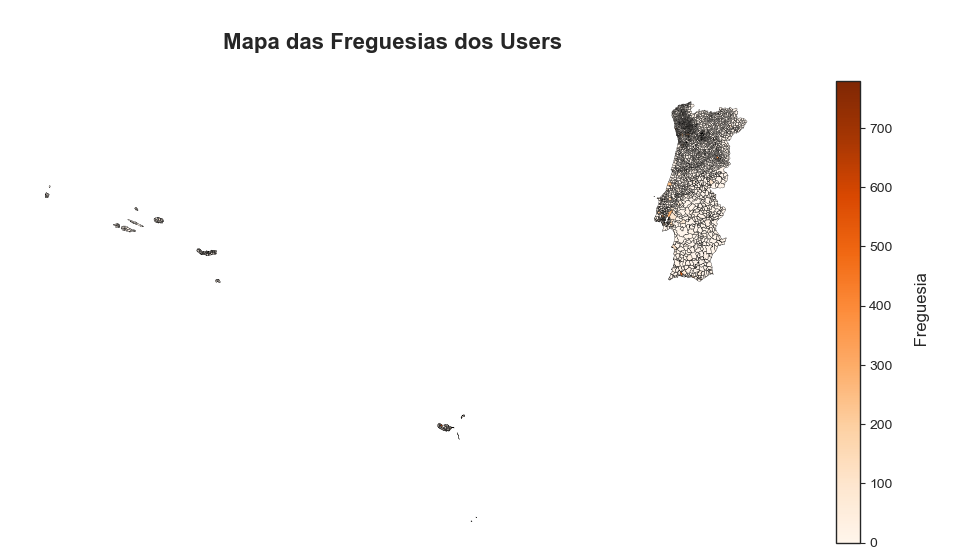

In [11]:
############################################ FREGUESIAS ############################################
# Agrupar os dados por freguesia, concelho e distrito e contar o número de usuários em cada grupo
users_freguesia_concelho_distrito = df_users.groupby(['user_freguesia', 'user_concelho', 'user_distrito']).size().reset_index(name='Freguesia')

# Renomear as colunas para corresponderem às colunas do map_dataframe
users_freguesia_concelho_distrito = users_freguesia_concelho_distrito.rename(columns={'user_freguesia': 'fre_name', 'user_concelho': 'con_name', 'user_distrito': 'dis_name'})

# Fazer o merge com base nas três colunas (freguesia, concelho e distrito)
merged_dataframe_F = map_dataframe.merge(users_freguesia_concelho_distrito, on=['fre_name', 'con_name', 'dis_name'], how='outer')

# Preencher os valores NaN com 0
merged_dataframe_F['Freguesia'].fillna(0, inplace=True)
merged_dataframe_F.dropna(inplace=True)

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(14, 6))  
merged_dataframe_F.plot(column="Freguesia",cmap="Oranges", linewidth=0.2, ax=ax, edgecolor="black", legend=True, 
                   legend_kwds={'label': "\n Freguesia\n", 'orientation': "vertical"})
ax.set_title("\nMapa das Freguesias dos Users \n", fontweight='bold', fontsize=16)
# # Limite Continente
# ax.set_xlim([-10, -5])
# ax.set_ylim([37,42.5])

# Limite Madeira
# ax.set_xlim([-17.50, -16])
# ax.set_ylim([32.25,33.25])

# Limite Açores
# ax.set_xlim([-32, -25])
# ax.set_ylim([36.8,39.8])

ax.set_axis_off()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

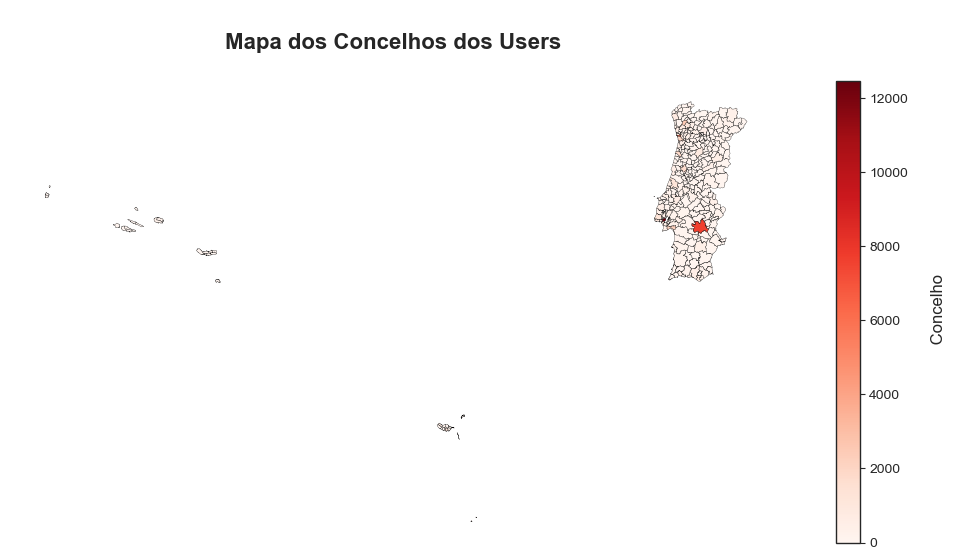

In [12]:
############################################ CONCELHOS ############################################
# Agrupar os usuários por concelho e distrito
users_concelho_distrito = df_users.groupby(['user_concelho', 'user_distrito']).size().reset_index(name='Concelho')

# Fazer o merge com o dataframe map_dataframe usando as colunas 'con_name' e 'dis_name'
merged_dataframe_C = map_dataframe.merge(users_concelho_distrito, left_on=['con_name', 'dis_name'], 
                                         right_on=['user_concelho', 'user_distrito'], how='outer')

# Preencher os valores NaN com 0
merged_dataframe_C['Concelho'].fillna(0, inplace=True)
merged_dataframe_C.dropna(inplace=True, subset=['con_name'])

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(14, 6))  
merged_dataframe_C.dissolve(by = ['dis_name','con_name'])\
                  .plot(column="Concelho",cmap="Reds", linewidth=0.2, ax=ax, edgecolor="black", legend=True, 
                   legend_kwds={'label': "\n Concelho\n", 'orientation': "vertical"})
ax.set_title("\nMapa dos Concelhos dos Users \n", fontweight='bold', fontsize=16)
# Limite Continente
# ax.set_xlim([-10, -5])
# ax.set_ylim([37,42.5])

# Limite Madeira
# ax.set_xlim([-17.50, -16])
# ax.set_ylim([32.25,33.25])

# Limite Açores
# ax.set_xlim([-32, -25])
# ax.set_ylim([36.8,39.8])

ax.set_axis_off()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

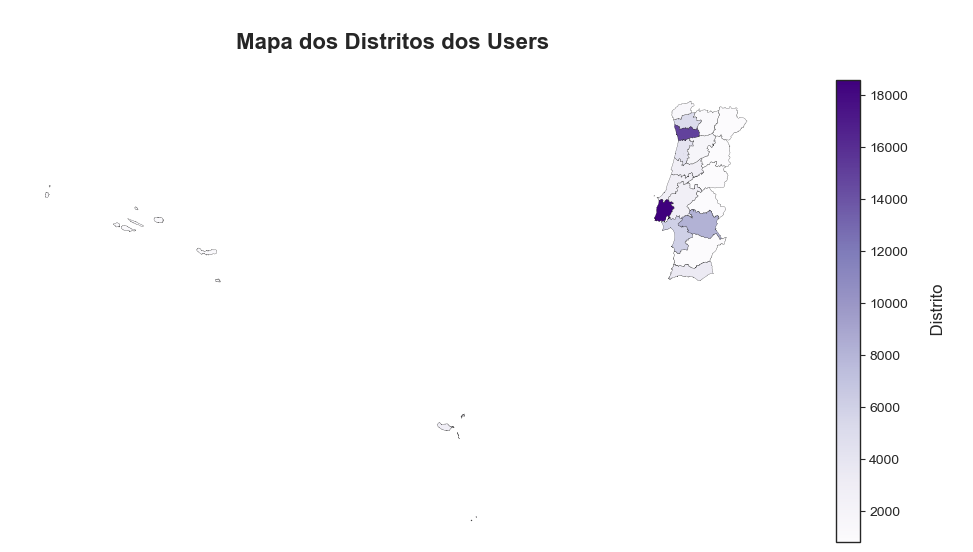

In [13]:
############################################ DISTRITOS ############################################
# Agrupar os users por distritos
users_distrito = df_users.groupby('user_distrito').size().reset_index(name='Distrito')
merged_dataframe_D = map_dataframe.merge(users_distrito, left_on="dis_name", right_on="user_distrito", how='outer')
# Preencher os valores NaN com 0
merged_dataframe_D['Distrito'].fillna(0, inplace=True)
merged_dataframe_D.dropna(inplace=True, subset=['dis_name'])

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(14, 6))  
merged_dataframe_D.dissolve(by = 'dis_name')\
                  .plot(column="Distrito",cmap="Purples", linewidth=0.15, ax=ax, edgecolor="black", legend=True, 
                   legend_kwds={'label': "\n Distrito\n", 'orientation': "vertical"})
ax.set_title("\nMapa dos Distritos dos Users \n", fontweight='bold', fontsize=16)
# Limite Continente
# ax.set_xlim([-10, -5])
# ax.set_ylim([37,42.5])

# Limite Madeira
# ax.set_xlim([-17.50, -16])
# ax.set_ylim([32.25,33.25])

# Limite Açores
# ax.set_xlim([-32, -25])
# ax.set_ylim([36.8,39.8])

ax.set_axis_off()
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

---

### 🗺️ Mapa Interativo

#### 🗺️ Funções Auxiliares na Representação dos Mapas **`Folium`**

In [26]:
import folium
from folium import plugins
from folium.plugins import HeatMapWithTime, HeatMap
from folium.map import Layer
from folium import FeatureGroup
import jinja2
from jinja2 import Template
import branca
import branca.colormap as cm
from branca.colormap import linear
from branca.element import Element, Figure, JavascriptLink, MacroElement

# Classe para ver o Google Street View | Fonte: https://astro-geo-gis.com/open-street-view-with-python-folium-map/
class ClickForOneMarker(folium.ClickForMarker):
    """
    Description of the tool
    """
    _template = Template(u"""
        {% macro script(this, kwargs) %}
        const fontAwesomeIcon= L.divIcon({
            html: '<i class="fa-solid fa-3x fa-street-view" style="color:#F69423"></i>',
            iconSize: [0,0],
            iconAnchor: [15,0]
            });
        var new_mark = L.marker();
        function newMarker(e){
        new_mark.setLatLng(e.latlng).addTo({{this._parent.get_name()}});
        new_mark.setIcon(fontAwesomeIcon);
        new_mark.dragging.enable();
        new_mark.on('dblclick', function(e){ {{this._parent.get_name()}}.removeLayer(e.target)})
        var lat = e.latlng.lat.toFixed(4),
            lng = e.latlng.lng.toFixed(4);
        new_mark.bindPopup("<b>Latitude : </b>" + lat + "<br><b>Longitude : </b> " + lng +"<br> <a href=https://www.google.com/maps?layer=c&cbll=" + lat + "," + lng + " target=blank> <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Google_Street_View_icon.svg/768px-Google_Street_View_icon.svg.png' style='width:40px;margin:0 auto;display: block;margin-left: auto; margin-right: auto; margin-top:5px'></img></a>").openPopup();
        };
        {{this._parent.get_name()}}.on('click', newMarker);
        {% endmacro %}
    """)  # noqa

    def __init__(self, popup=None):
        super(ClickForOneMarker, self).__init__(popup)
        self._name = 'ClickForOneMarker'

In [27]:
# # Função Auxiliar - Gerar conteúdo do pop-up
# def generate_freguesia_popup(row):
#     popup = f'<b>Freguesia:</b> {row["fre_name"]} <br>\
#               <b>Concelho:</b> {row["con_name"]} <br> \
#               <b>Distrito:</b> {row["dis_name"]} <br> \
#               <b>Nº de Utilizadores:</b> {row["Freguesia"]} <br> \
#               <b>% de Utilizadores:</b> {row["Freguesia"]/int(row["Freguesia"].sum())} [exclui <b>USI</b>]<br> \
#               <a href=https://www.google.com/maps/place/{row["fre_name"]},{row["con_name"]}target=blank><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Google_Street_View_icon.svg/768px-Google_Street_View_icon.svg.png" style="width:40px;margin:0 auto;display: block;margin-left: auto; margin-right: auto; margin-top:5px"></img></a>'
#     return popup_freguesia

In [28]:
# Google Earth Engine Python API and Folium Interactive Mapping
# Fonte: https://colab.research.google.com/github/giswqs/qgis-earthengine-examples/blob/master/Folium/ee-api-folium-setup.ipynb#scrollTo=802tXDddaTC5
basemaps = {'Google Maps': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Maps',
        overlay = False,
        control = True
    ),
    'Google Satellite': folium.TileLayer(
        tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr = 'Google',
        name = 'Google Satellite',
        overlay = False,
        control = True
    )}

---

In [29]:
latitude_central = map_dataframe.geometry.centroid.y.mean()
longitude_central = map_dataframe.geometry.centroid.x.mean() - 8
print(latitude_central, longitude_central)

40.287560453344895 -17.182394016943775


In [ ]:
# Centrar o mapa na média das coordenadas
latitude_central = map_dataframe.geometry.centroid.y.mean()
longitude_central = map_dataframe.geometry.centroid.x.mean() - 8

# Criar um mapa com folium
mapa = folium.Map(location=[latitude_central, longitude_central], zoom_start=5, control_scale=True)
basemaps['Google Maps'].add_to(mapa)                  #                                      -------------------------------
basemaps['Google Satellite'].add_to(mapa)             #                                      -------------------------------
plugins.Fullscreen(position='topleft').add_to(mapa)   # Opção de Fullscreen                  -------------------------------
mapa.add_child(plugins.MiniMap(toggle_display=True))  # Minimapa do lado direito             -------------------------------
# plugins.Draw().add_to(mapa)                         # Opções de Desenhar
plugins.FloatImage(image = 'https://upload.wikimedia.org/wikipedia/en/archive/c/cc/20180621135549%21Vodafone_2017_logo.svg', 
                   bottom=8, left=2, width='40px').add_to(mapa)        # Logo Vodafone
# mapa.add_child(ClickForOneMarker())

# --------------------------------------------------------------------------------------------------------------------------
#================================================= FREGUESIAS ==============================================================

# Adicionar as freguesias ao mapa como polígonos
colormap1 = linear.OrRd_09.scale(merged_dataframe_F.Freguesia.min(), merged_dataframe_F.Freguesia.max())
colormap1.caption = "Users por Freguesias"
colormap1.width = 300

merged_dataframe_F["Users_%"] = round((merged_dataframe_F["Freguesia"] / merged_dataframe_F["Freguesia"].sum()) * 100,2)
popup = folium.GeoJsonPopup(
    fields=["fre_name", "con_name", "dis_name", "Freguesia", "Users_%"],
    aliases=["Freguesia", "Concelho", "Distrito", "Nº de Users (n)", "% de Users (%)"],
    localize=True,
    labels=True,
    style="color:black; font-family: arial; font-size: 12px;",
)

folium.GeoJson(
    merged_dataframe_F,
    name='Por Freguesias',
    style_function= lambda feature: {
        'fillColor': colormap1(int(feature['properties']['Freguesia'])),
        'color': 'black',
        'weight': 0.8,
        "dashArray": "5, 5",
        'fillOpacity': 0.9
    },
    popup=popup
).add_to(mapa)

# Adicione o colormap à layer 'Por Freguesias'
# colormap.add_to(mapa, name="Por Freguesias")
mapa.add_child(colormap1, name="Por Freguesias")


# --------------------------------------------------------------------------------------------------------------------------
#================================================= CONCELHOS ==============================================================
colormap2 = linear.Purples_09.scale(merged_dataframe_C.Concelho.min(), merged_dataframe_C.Concelho.max())
colormap2.caption = "Users por Concelho"
colormap2.width = 300

merged_dataframe_C["Users_%"] = round((merged_dataframe_C["Concelho"] / 
                                       merged_dataframe_C.groupby('user_concelho').agg({'Concelho': 'first'})['Concelho'].sum())* 100,2)

# Preencher os valores NaN nas colunas 'user_concelho' e 'user_distrito' com os valores correspondentes nas colunas 'con_name' e 'dis_name', respectivamente
merged_dataframe_C['user_concelho'] = merged_dataframe_C['user_concelho'].fillna(merged_dataframe_C['con_name'])
merged_dataframe_C['user_distrito'] = merged_dataframe_C['user_distrito'].fillna(merged_dataframe_C['dis_name'])

popup = folium.GeoJsonPopup(
    fields=["user_concelho", "user_distrito", "Concelho", "Users_%"],
    aliases=["Concelho", "Distrito", "Nº de Users (n)", "% de Users (%)"],
    localize=True,
    labels=True,
    style="color:black; font-family: arial; font-size: 12px;",
)

folium.GeoJson(
    merged_dataframe_C.dissolve(by = ['dis_name','con_name']),
    name='Por Concelho',
    style_function= lambda feature: {
        'fillColor': colormap2(feature['properties']['Concelho']),
        'color': 'black',
        'weight': 0.8,
        "dashArray": "5, 5",
        'fillOpacity': 0.9
    },
    popup=popup
).add_to(mapa)

mapa.add_child(colormap2, name="Por Concelho")

# --------------------------------------------------------------------------------------------------------------------------
#================================================= DISTRITOS ==============================================================
colormap3 = linear.Blues_09.scale(merged_dataframe_D.Distrito.min(), merged_dataframe_D.Distrito.max())
colormap3.caption = "Users por Distrito"
colormap3.width = 300

merged_dataframe_D["Users_%"] = round((merged_dataframe_D["Distrito"] /
                                       merged_dataframe_D.groupby('user_distrito').agg({'Distrito': 'first'})['Distrito'].sum()) * 100,2)
popup = folium.GeoJsonPopup(
    fields=["dis_name", "Distrito", "Users_%"],
    aliases=["Distrito", "Nº de Users (n)", "% de Users (%)"],
    localize=True,
    labels=True,
    style="color:black; font-family: arial; font-size: 12px;",
)

folium.GeoJson(
    merged_dataframe_D.dissolve(by = 'user_distrito'),
    name='Por Distrito',
    style_function= lambda feature: {
        'fillColor': colormap3(feature['properties']['Distrito']),
        'color': 'black',
        'weight': 0.8,
        "dashArray": "5, 5",
        'fillOpacity': 0.9
    },
    popup=popup
).add_to(mapa)

mapa.add_child(colormap3, name="Por Distrito")

# --------------------------------------------------------------------------------------------------------------------------
# Mostrar o mapa
mapa.add_child(folium.LayerControl(collapsed=False)) # Camadas de Diferentes Mapas
mapa

---

### Análise de `Outliers`

In [86]:
Facebook_Posts_Comments.columns

Index(['page', 'post_id', 'comment_id', 'user_name', 'user_link',
       'comment_text', 'comment_date', 'comment_link', 'comment_day_ago',
       'comment_reactions', 'comment_num_responses',
       'comment_operator_responded', 'post_text', 'post_date',
       'post_reactions', 'post_comments', 'post_shares', 'post_day',
       'post_month', 'post_year', 'post_hour', 'post_link'],
      dtype='object')

In [85]:
# Fonte: Notebooks de PACDI
from collections import Counter

### Define function for outlier detection, based on IQR method
def detect_outliers(df,feature):
    outlier_indices = []
    # 1st quartile
    Q1 = np.percentile(df[feature],25)
    # 3rd quartile
    Q3 = np.percentile(df[feature],75)
    # IQR 
    IQR = max(Q3 - Q1, 1)
    # Outlier step
    outlier_step = IQR * 1.5
    # detect outlier and their indeces
    outlier_list_col = df[((df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step))].index
    # store indeces
    outlier_indices.extend(outlier_list_col)
    return outlier_indices

In [ ]:
# Verificar os valores 'outliers'
outlier_indices_post_reactions = detect_outliers(Facebook_Posts_Comments_2019_24, 'post_reactions')
outlier_indices_post_comments = detect_outliers(Facebook_Posts_Comments_2019_24, 'post_comments')
outlier_indices_post_shares = detect_outliers(Facebook_Posts_Comments_2019_24, 'post_shares')

outlier_indices_comment_reactions = detect_outliers(Facebook_Posts_Comments_2019_24, 'comment_reactions')
outlier_indices_comment_responses = detect_outliers(Facebook_Posts_Comments_2019_24, 'comment_num_responses')

# print("Outliers em post_reactions:", outlier_indices_post_reactions)

In [90]:
print("Outliers em post_comments:", outlier_indices_post_comments)

Outliers em post_comments: []


In [2]:
# print("Outliers em post_shares:", outlier_indices_post_shares)

In [92]:
print("Outliers em comment_reactions:", outlier_indices_comment_reactions)

Outliers em comment_reactions: []


In [93]:
print("Outliers em comment_num_responses:", outlier_indices_comment_responses)

Outliers em comment_num_responses: []


---